In [9]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle

from plotter import *

import warnings
warnings.filterwarnings('ignore')

In [10]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagWeightUp','btagWeightDown','btagEffStatUp','btagEffStatDown',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
              ]

In [11]:
year = '2017'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

In [12]:
templates = pickle.load(open('pickles/'+str(year)+'_templates.pkl','rb')).integrate('region','signal')

In [13]:
templates.sum('pt1','msd1','ddb1','deta','mjj').integrate('systematic', 'nominal').values()

{('ZH',): array(14.30482859),
 ('WH',): array(11.41398191),
 ('ttH',): array(21.68612532),
 ('VBF',): array(32.28007896),
 ('ggF',): array(75.87214395),
 ('ggF-powheg',): array(154.90639948),
 ('QCD',): array(3956029.49910738),
 ('VV',): array(1273.53049952),
 ('Wjets',): array(87111.29949286),
 ('Zjets',): array(37622.62585502),
 ('ttbar',): array(19498.99464288),
 ('singlet',): array(3073.46512155),
 ('data',): array(3695289.),
 ('muondata',): array(69342.)}

In [14]:
mc = ['QCD','Wjets','Zjets','ttbar','singlet','VV','ggF','VBF','WH','ZH','ttH']

In [15]:
h = templates.sum('pt1','ddb1').integrate('deta',int_range=slice(3.5,7)).integrate('mjj',int_range=slice(1000,4000))
g = templates.sum('pt1').integrate('deta',int_range=slice(3.5,7)).integrate('mjj',int_range=slice(1000,4000)).integrate('ddb1',int_range=slice(0.7,1))

/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered 

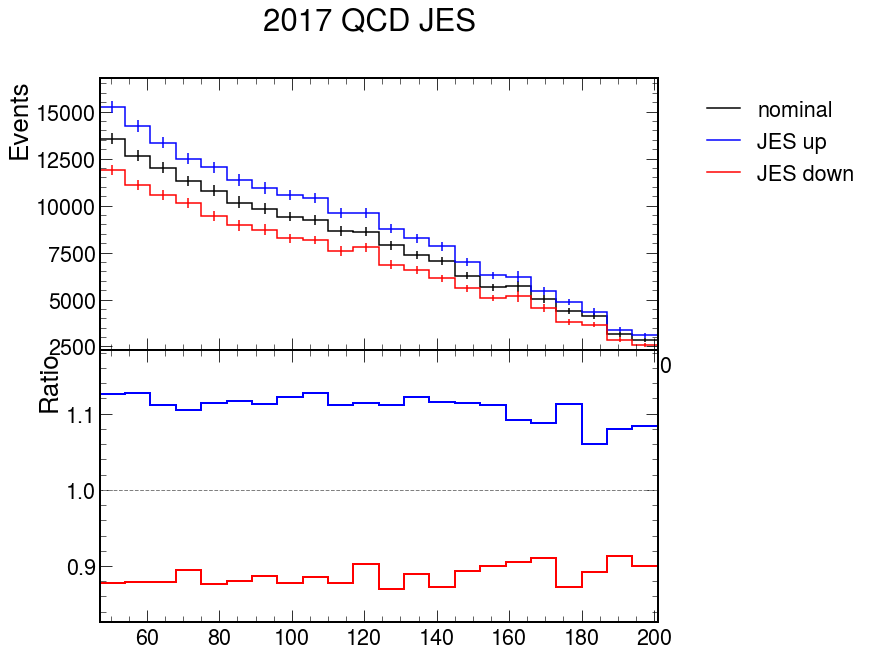

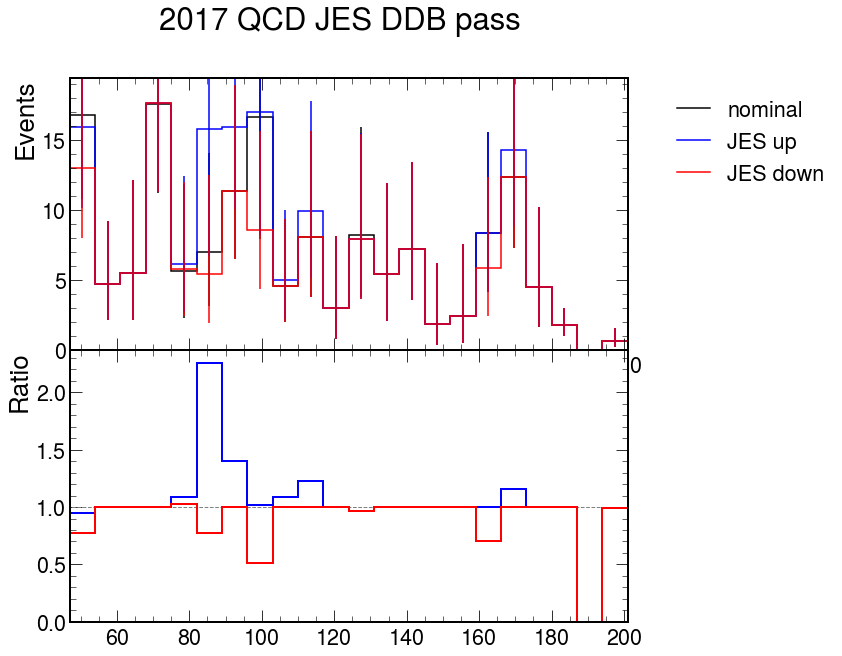

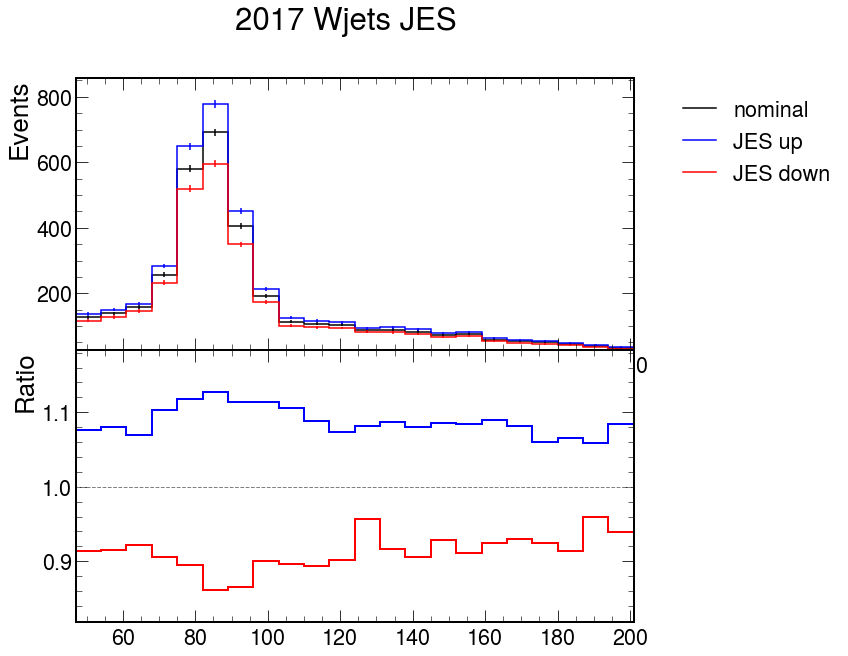

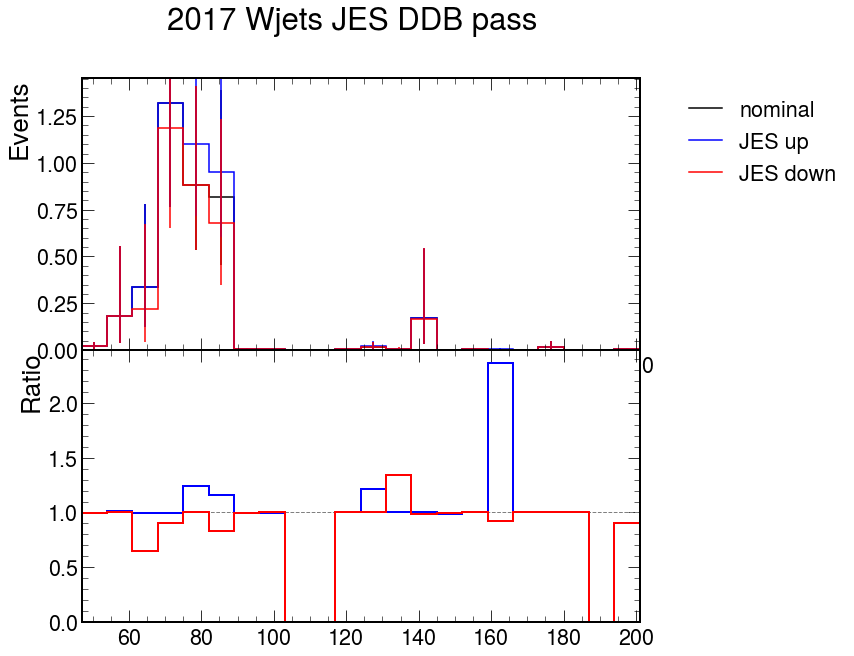

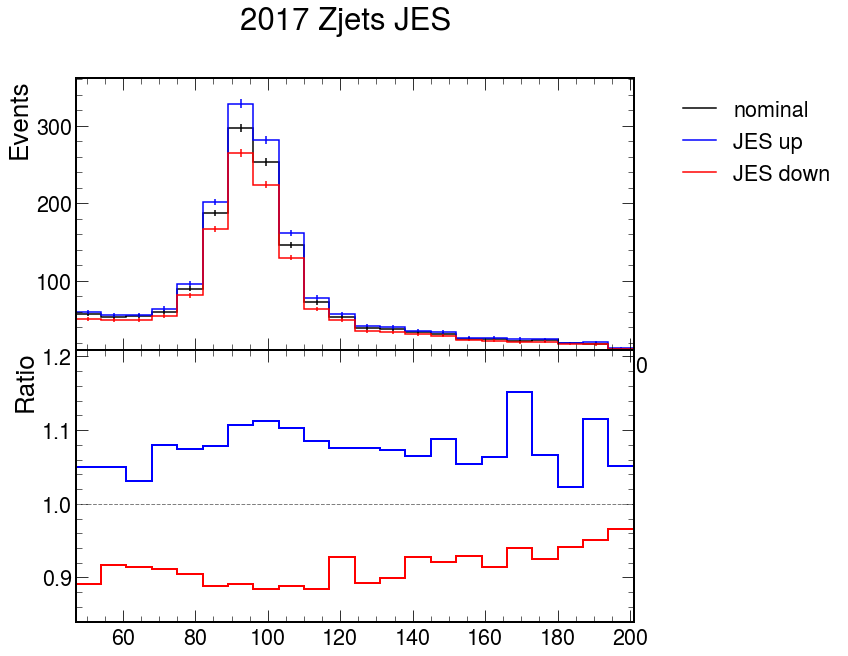

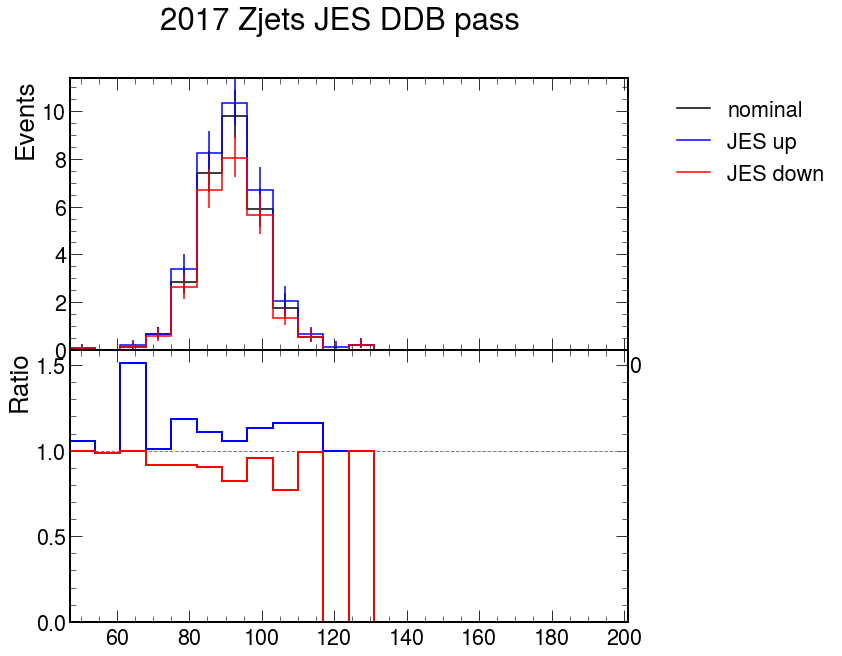

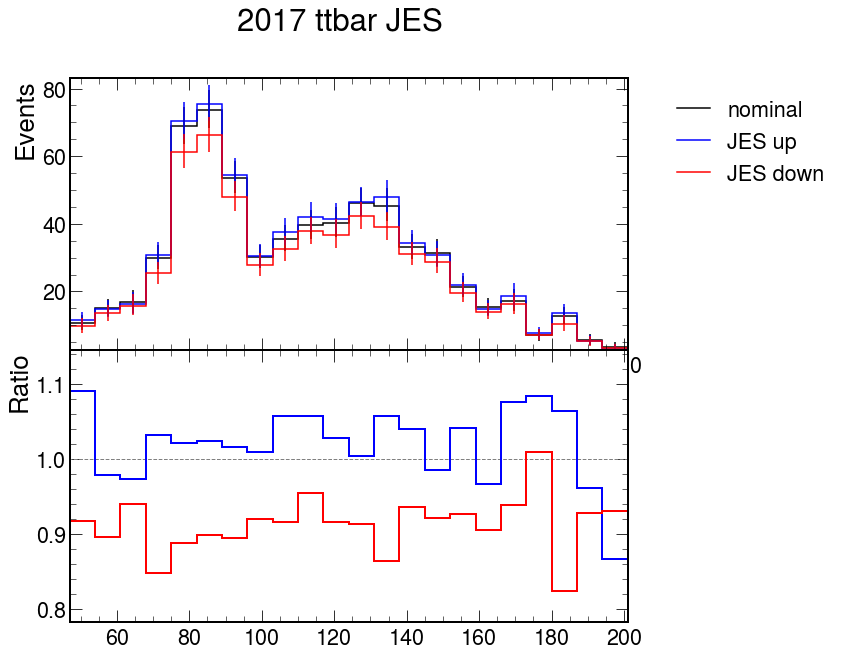

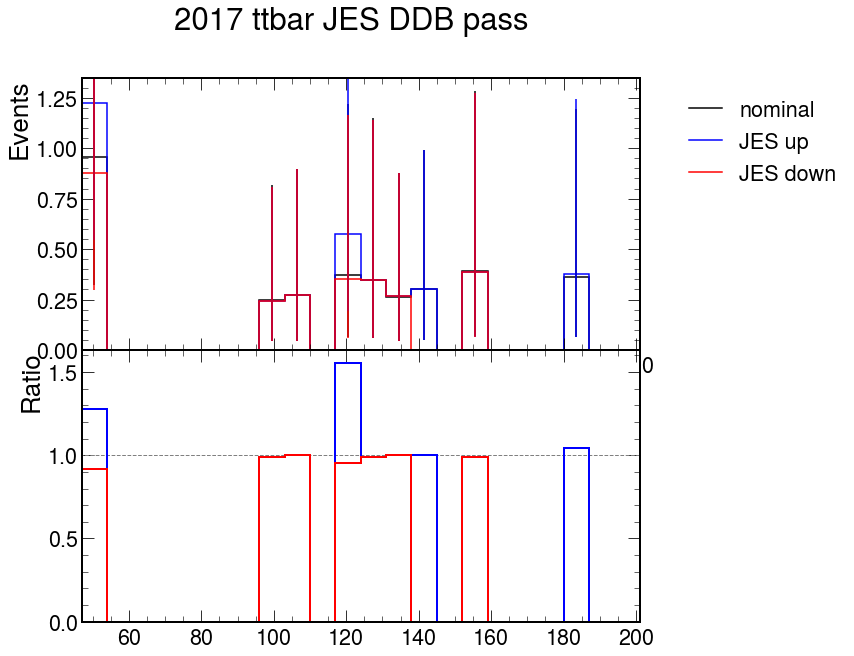

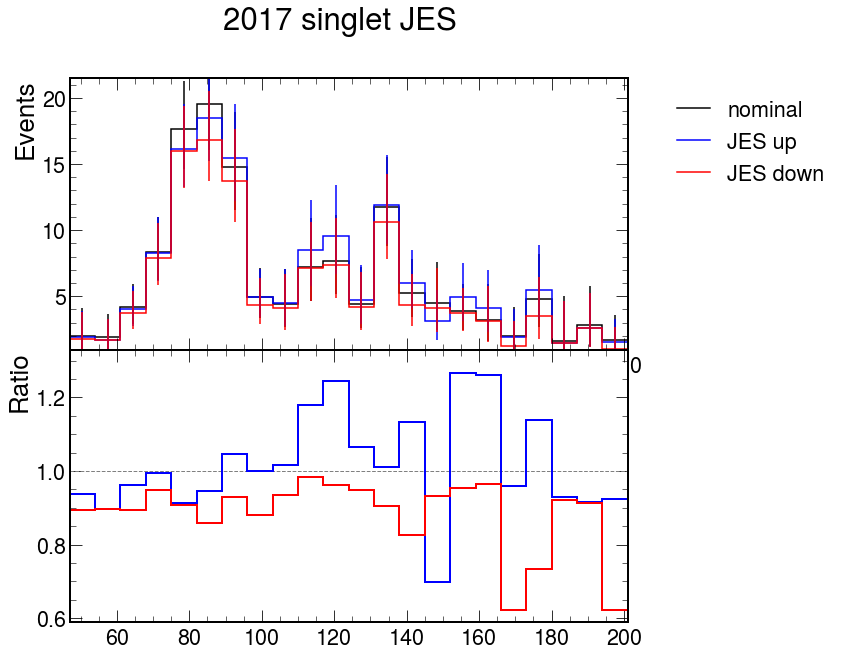

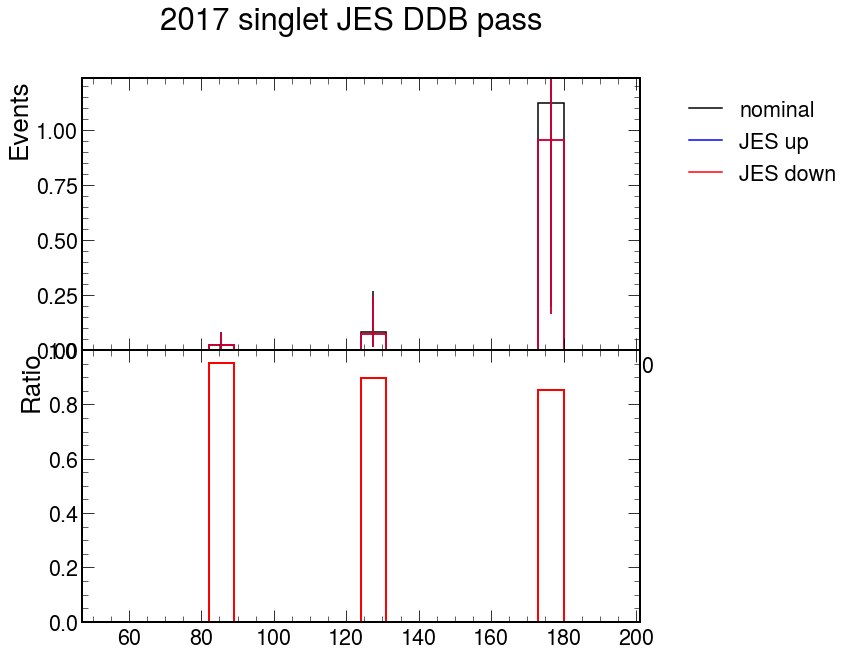

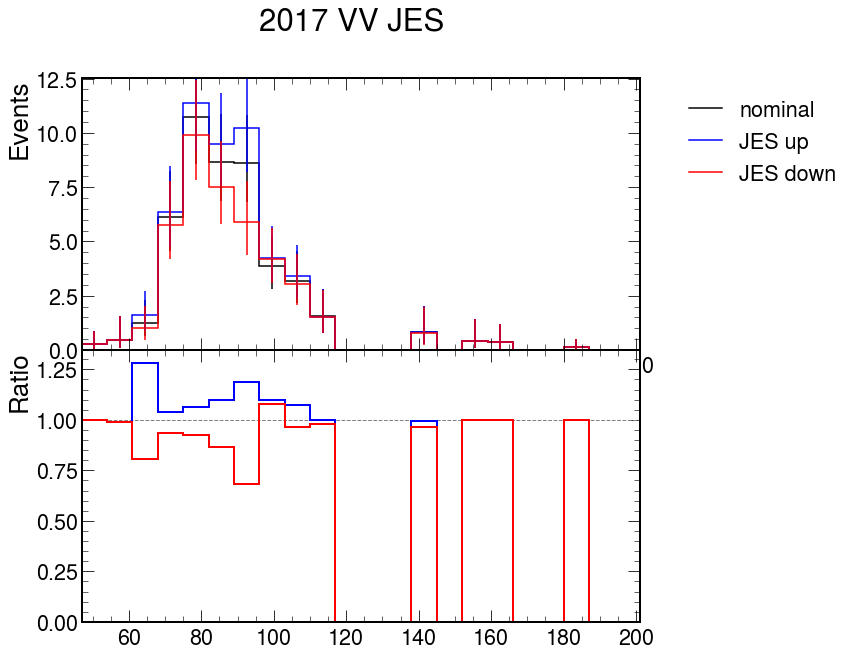

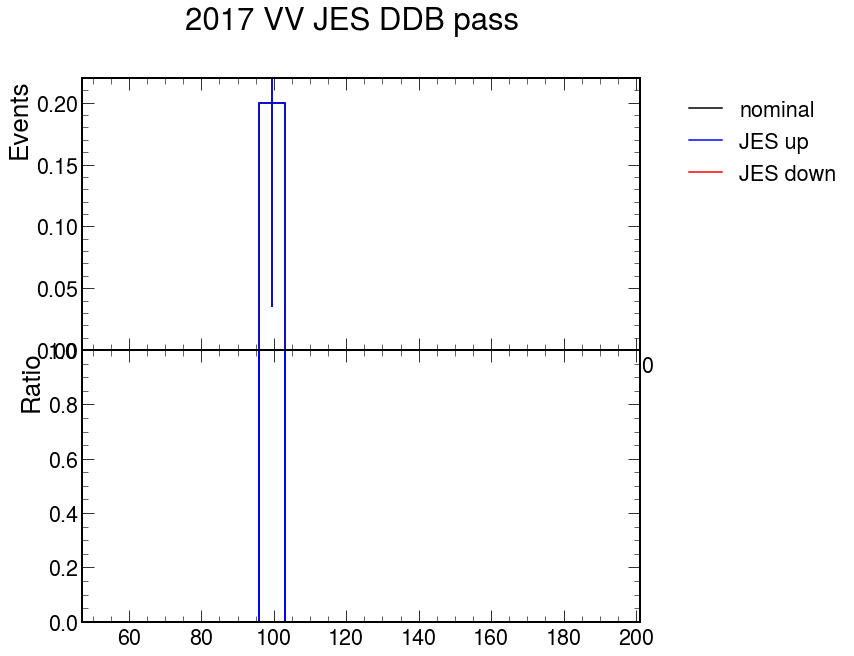

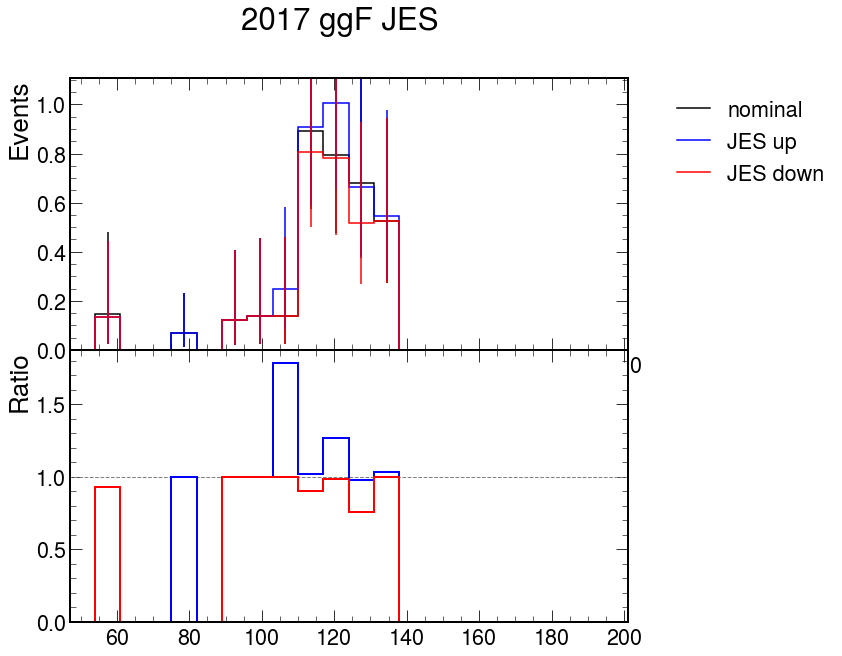

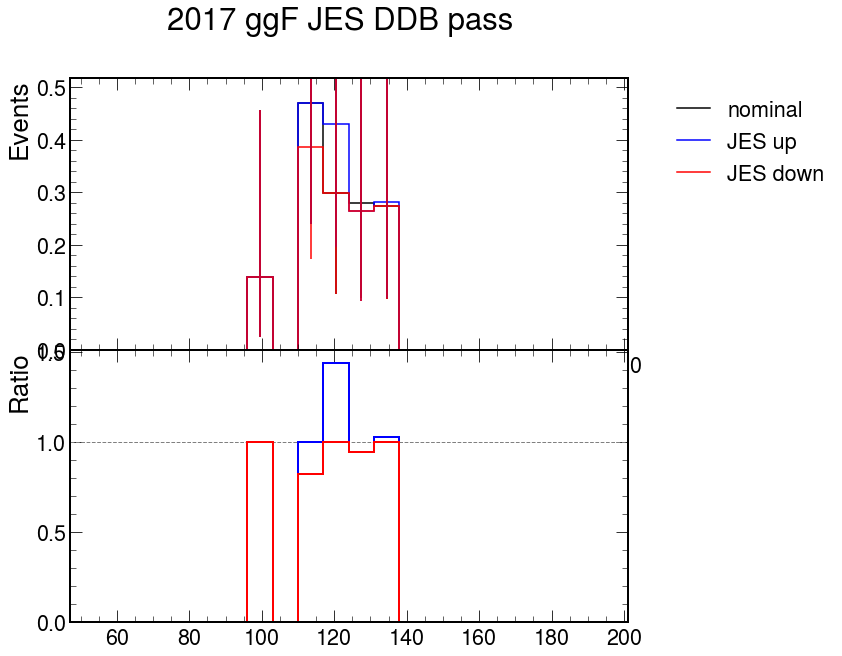

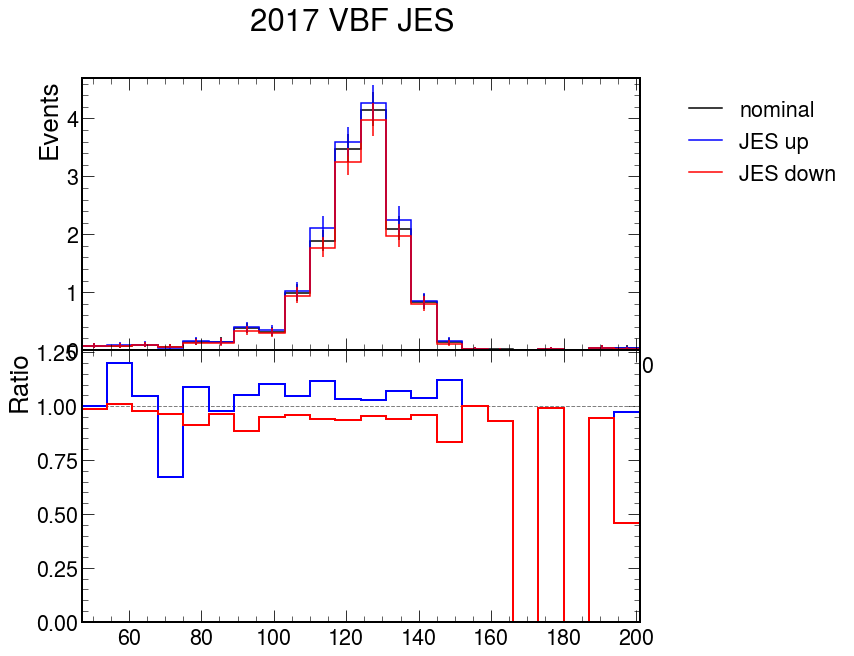

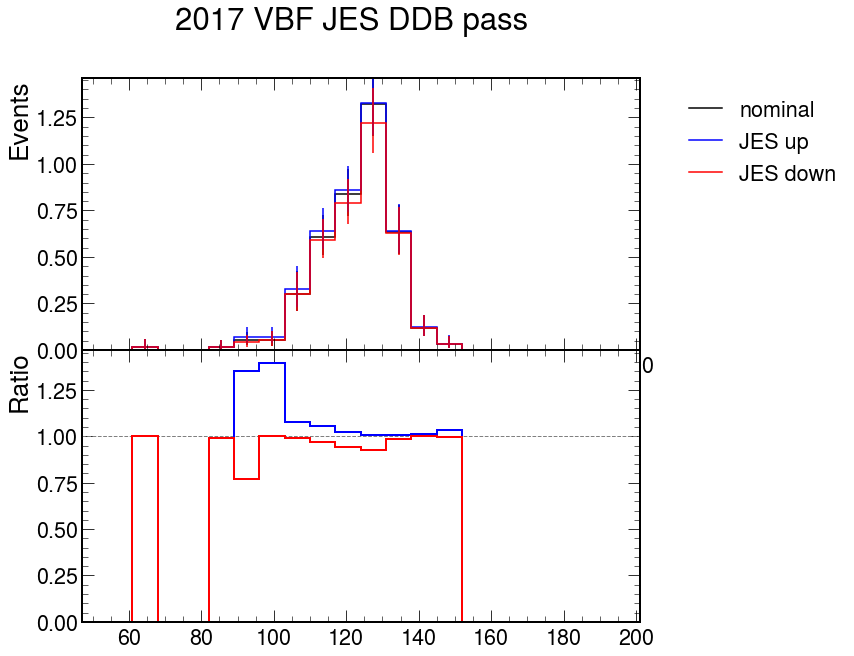

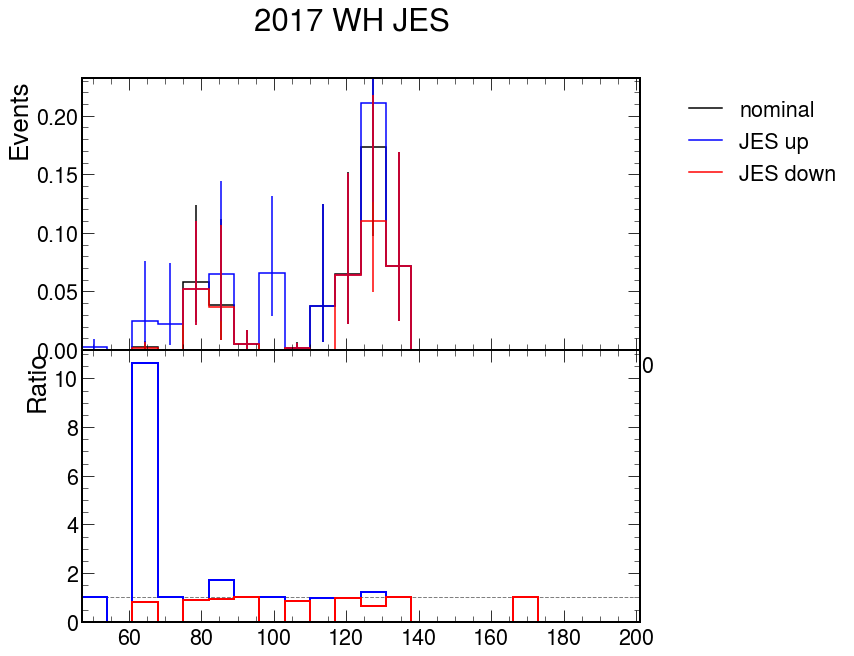

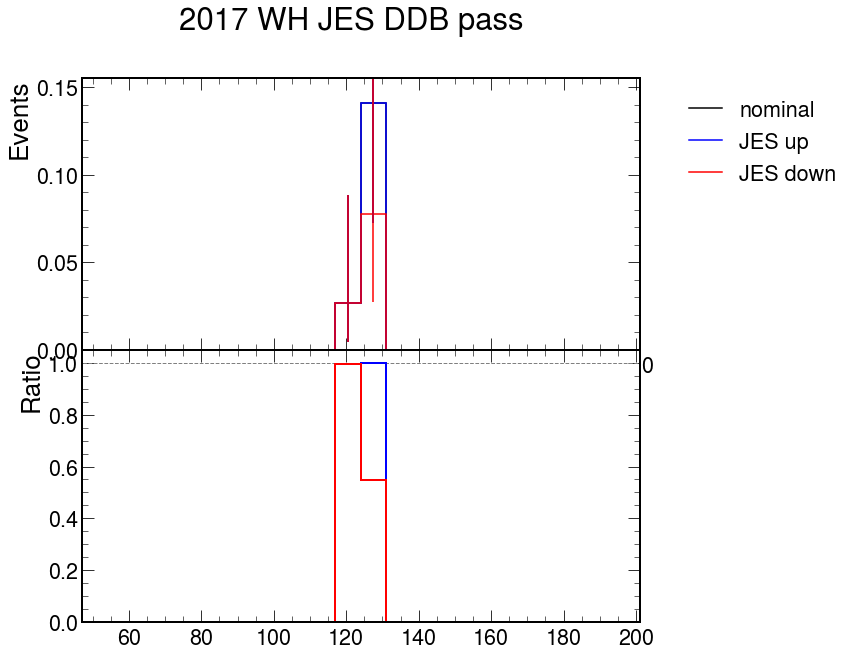

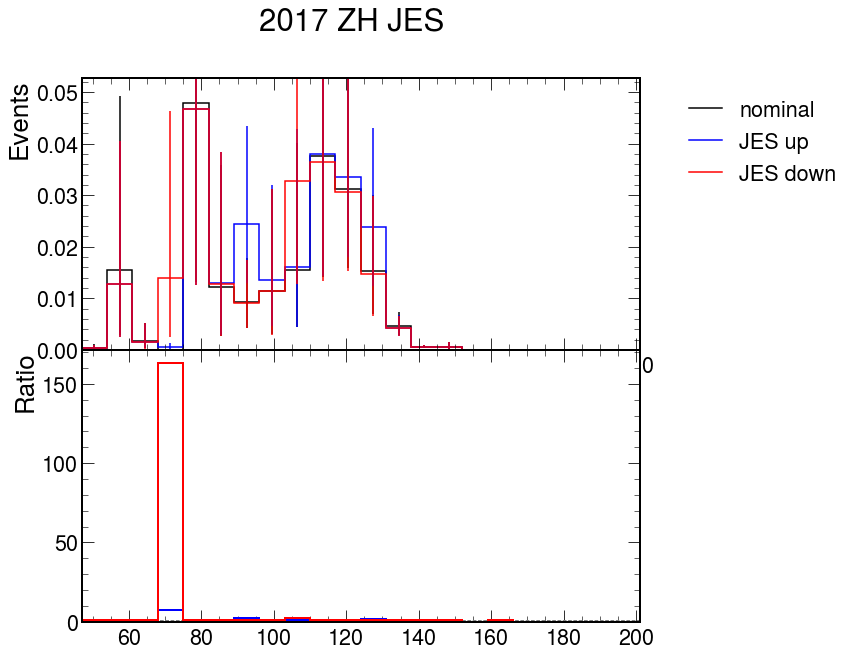

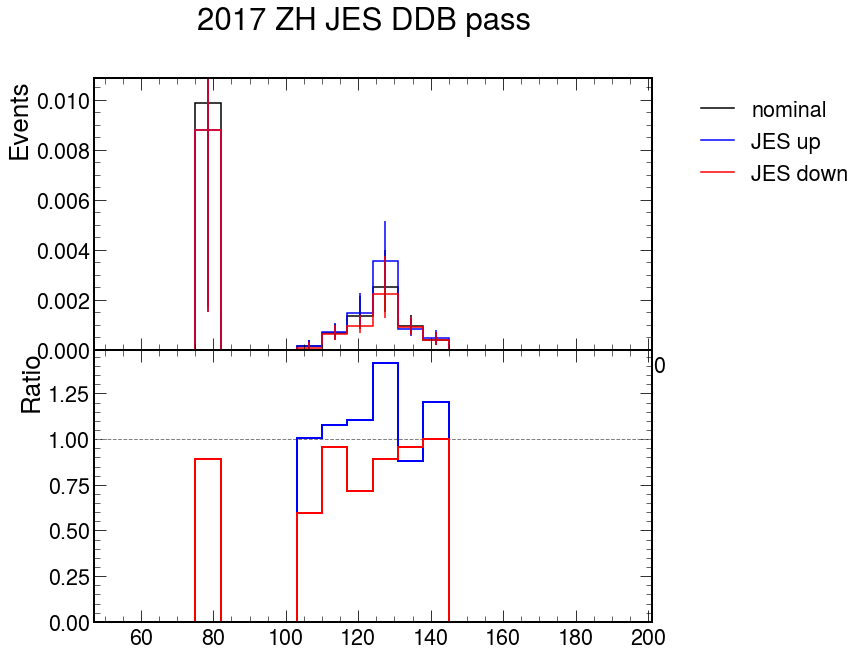

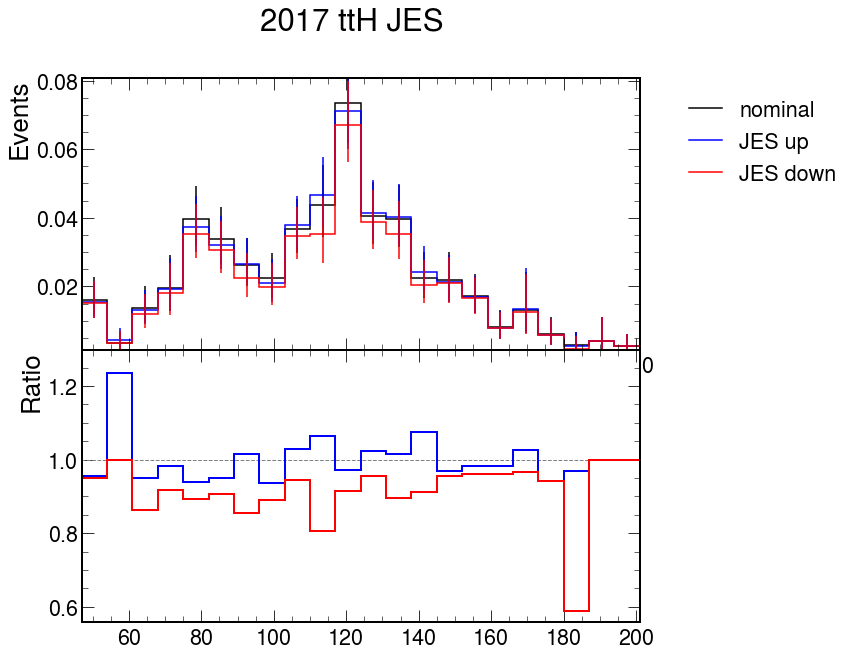

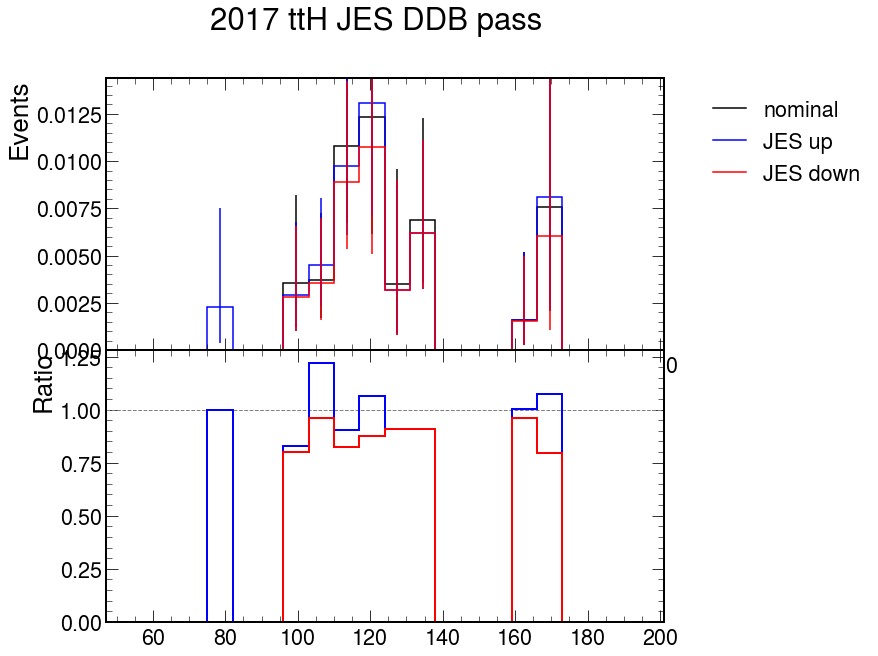

In [16]:
for p in mc:
    plot_syst(h.integrate('process',p),'JES',year + ' ' + p + ' JES', year+'/syst_JES/'+p)
    plot_syst(g.integrate('process',p),'JES',year + ' ' + p + ' JES DDB pass', year+'/syst_JES/'+p+"_pass")

/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered

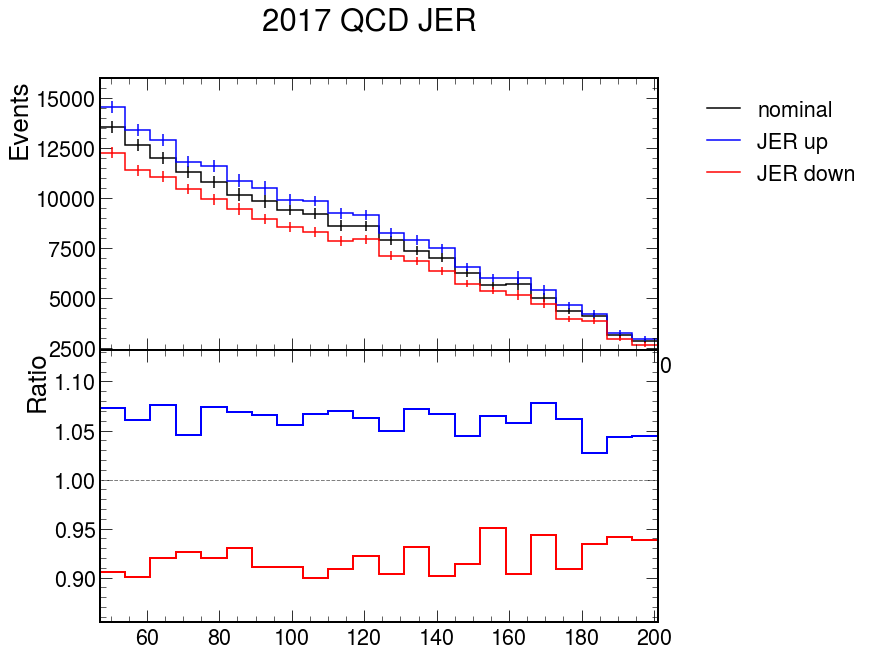

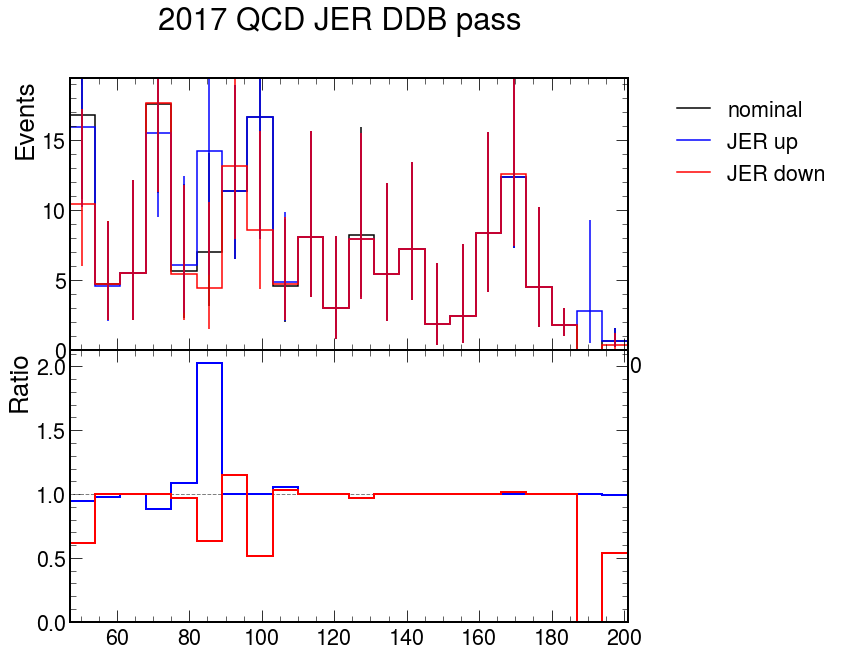

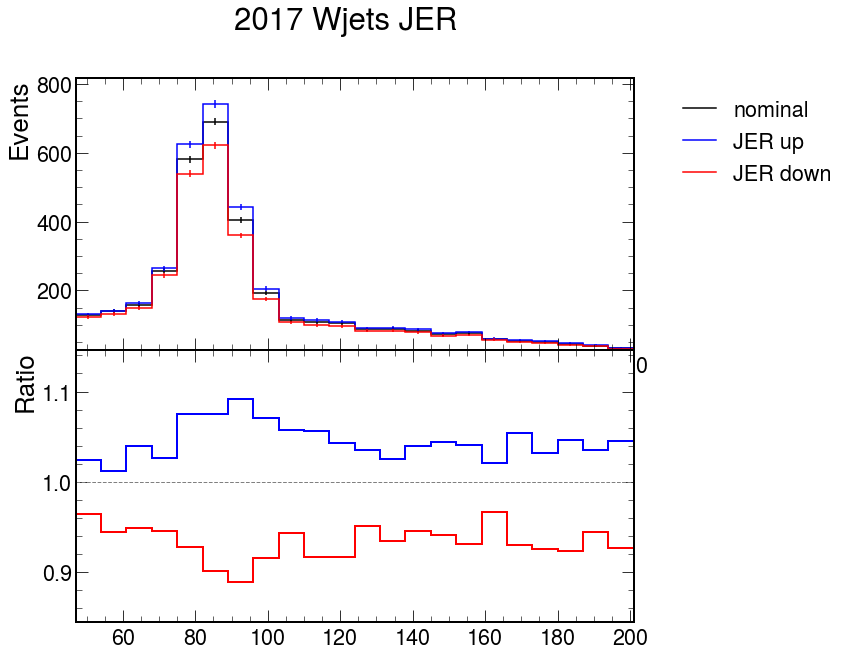

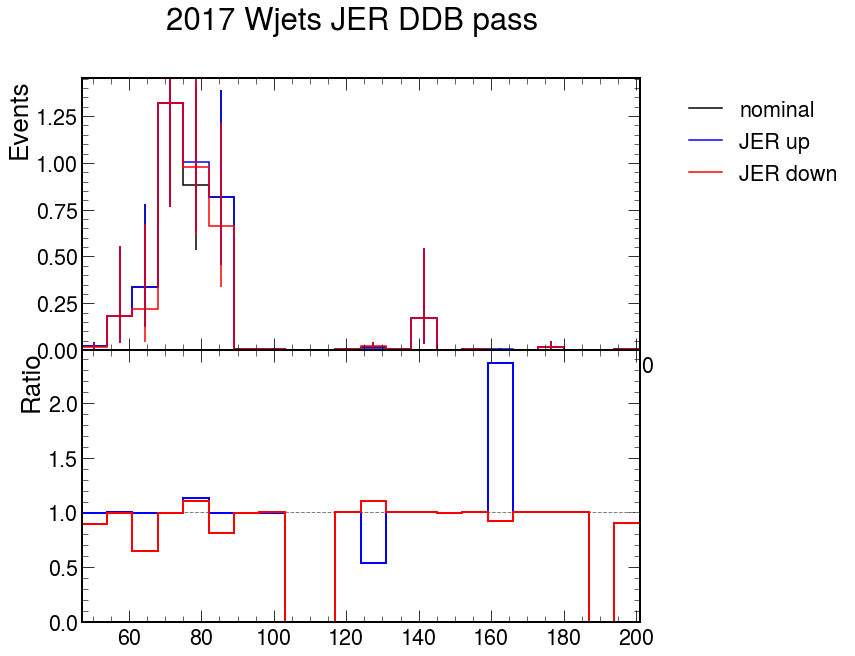

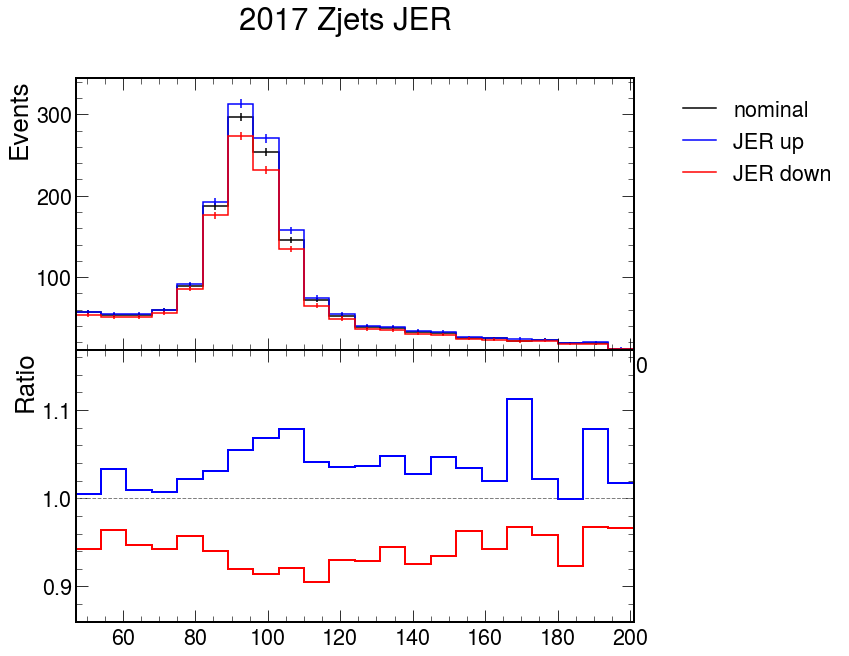

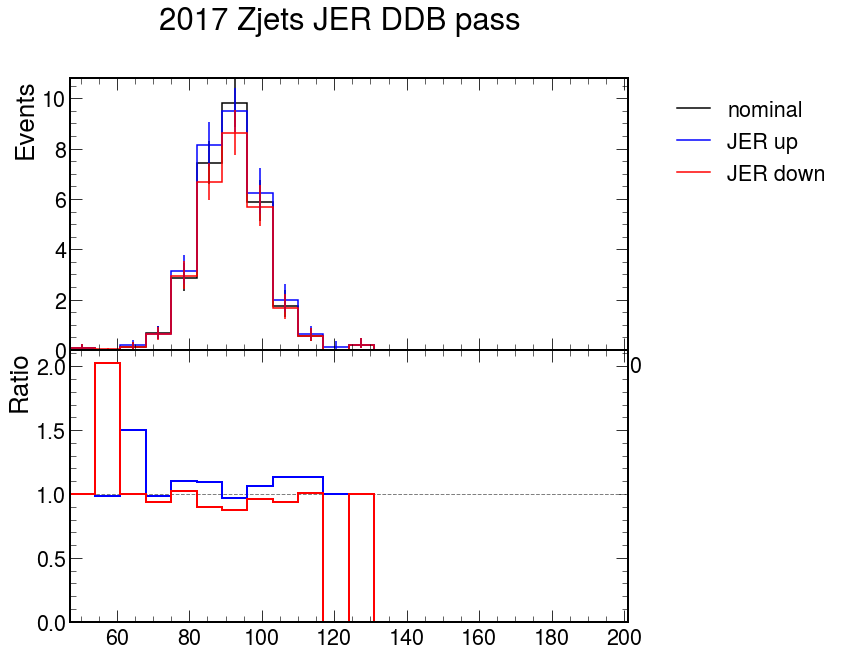

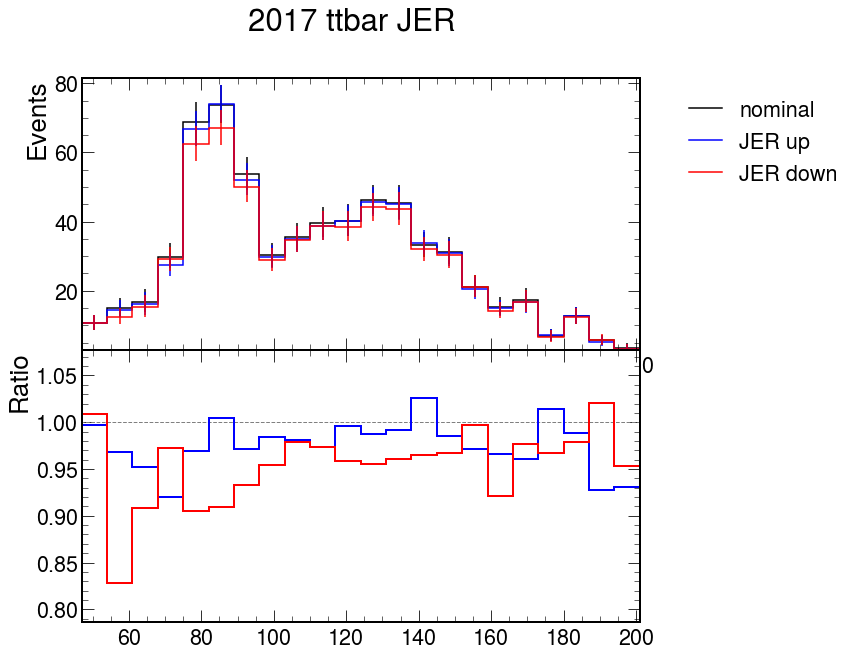

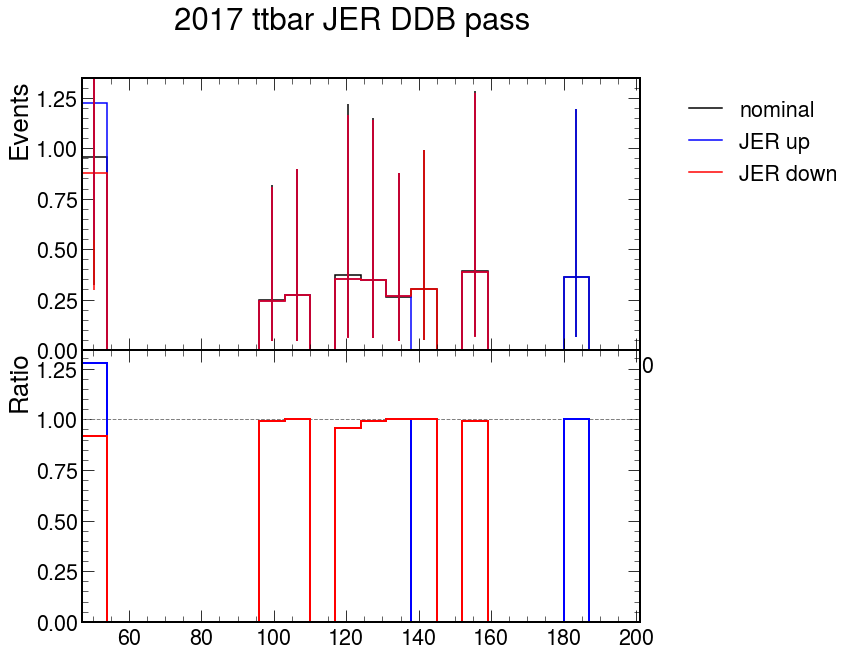

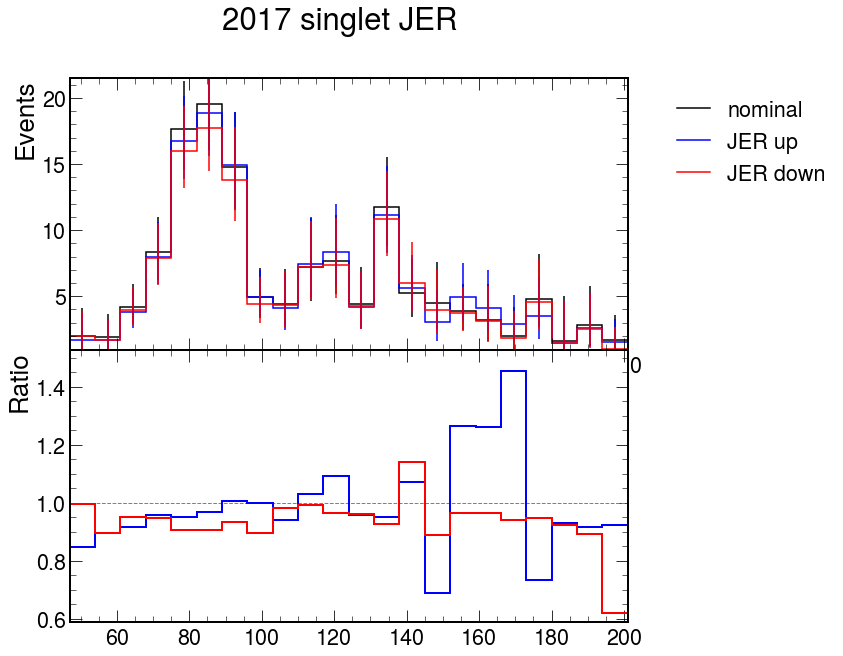

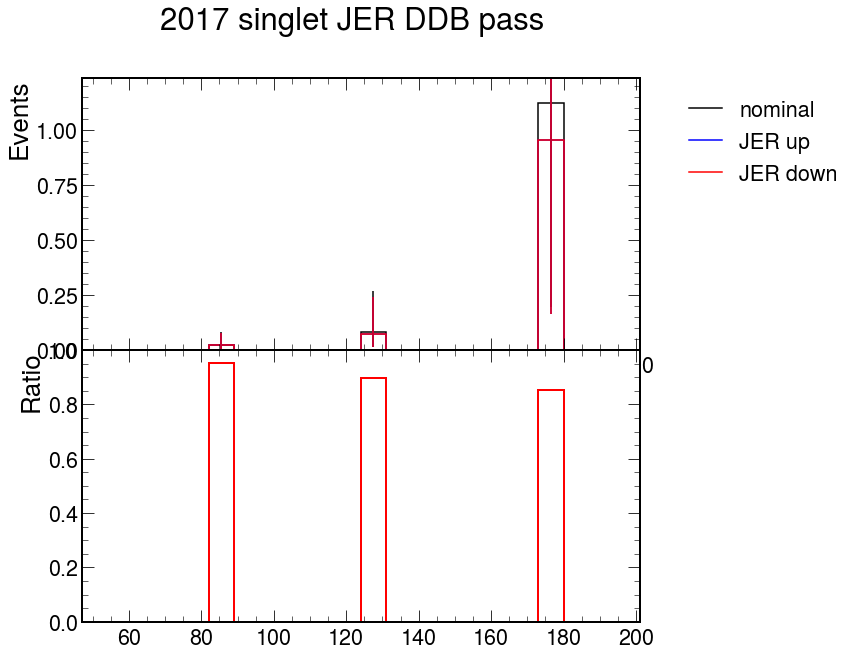

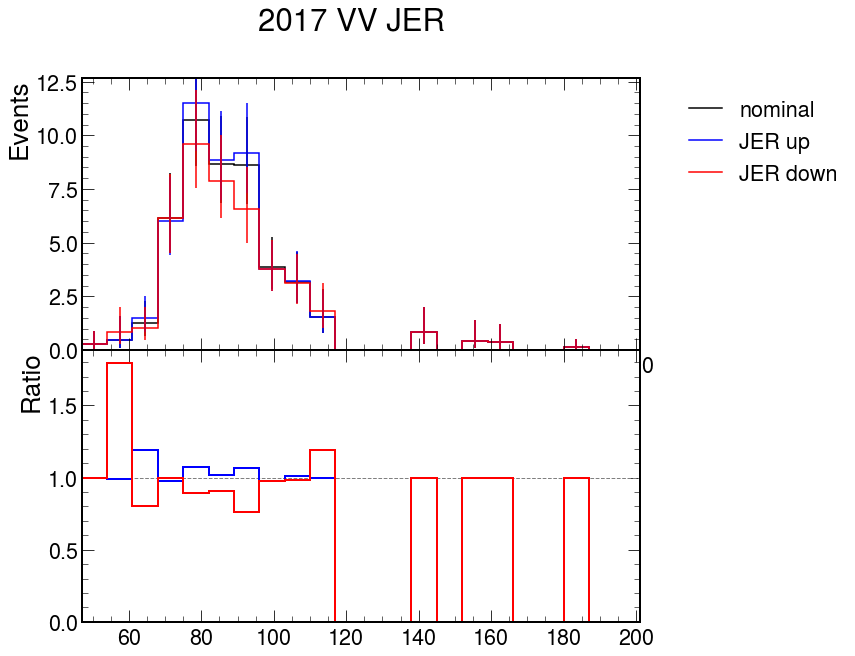

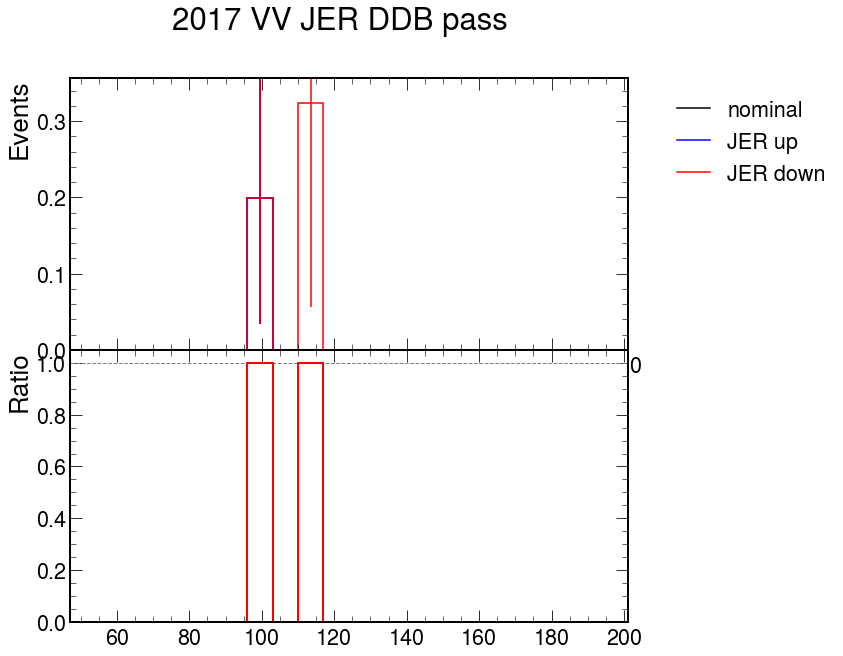

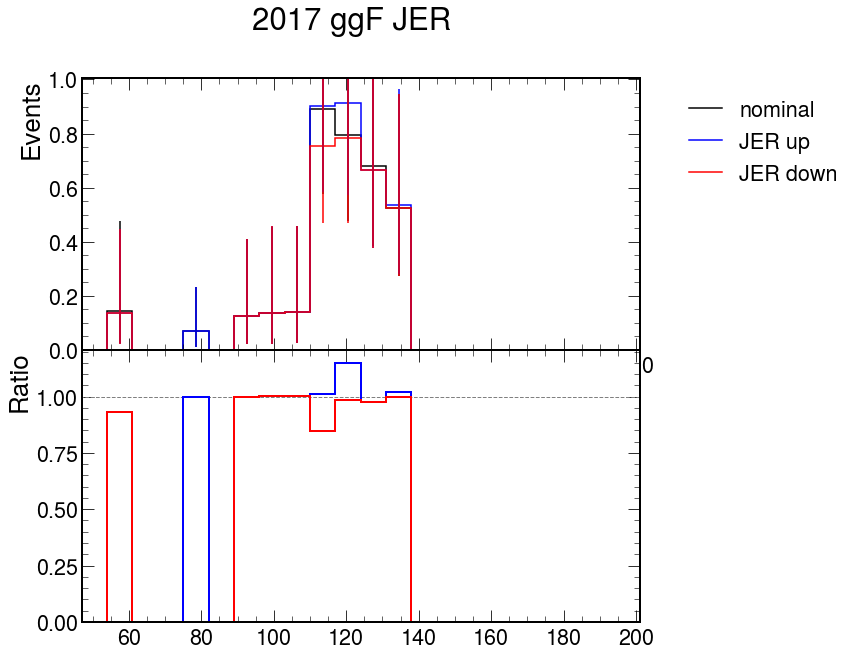

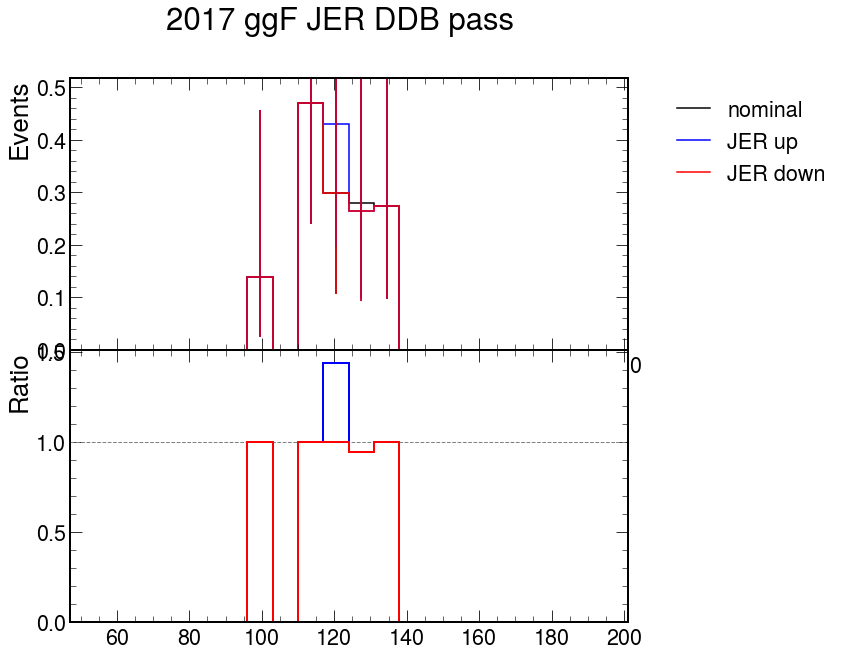

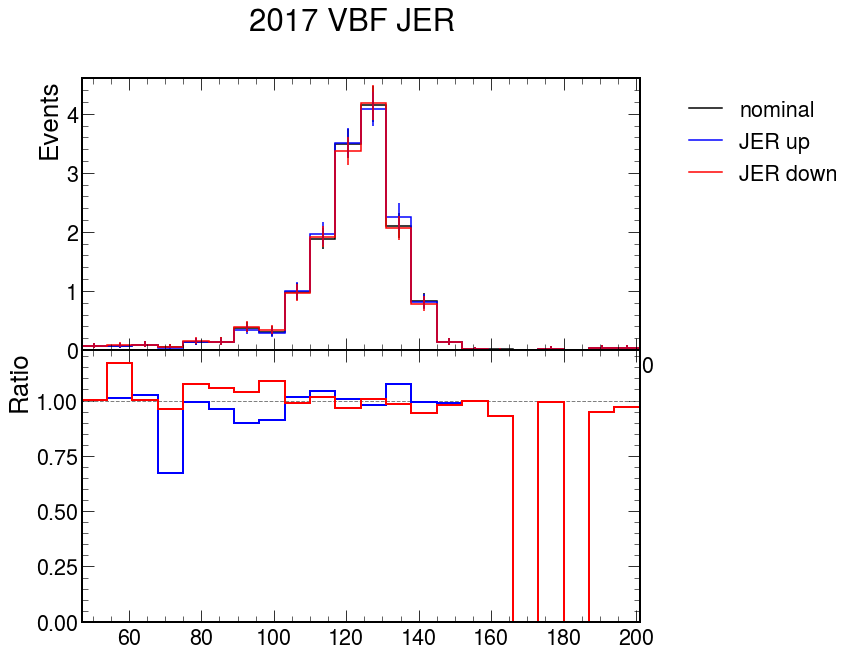

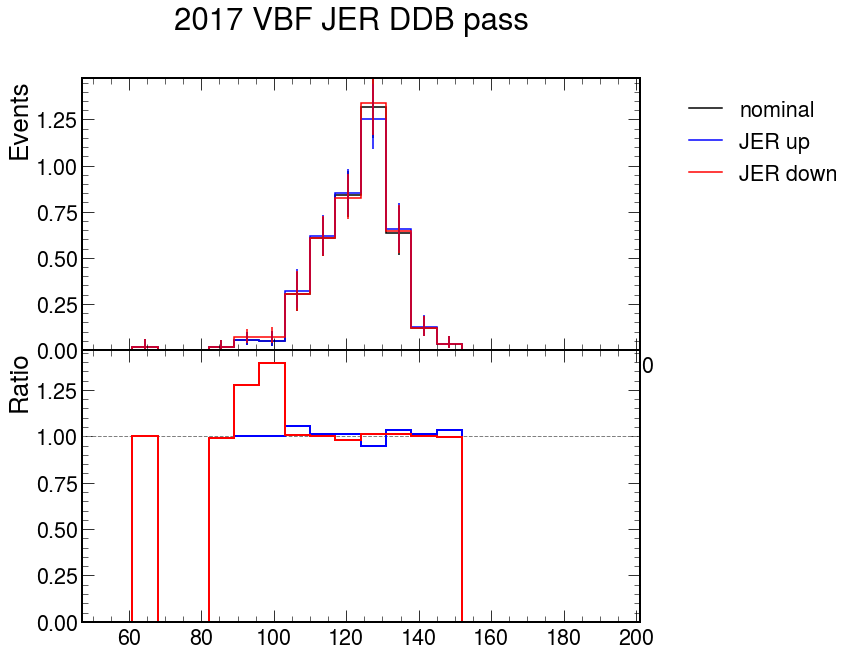

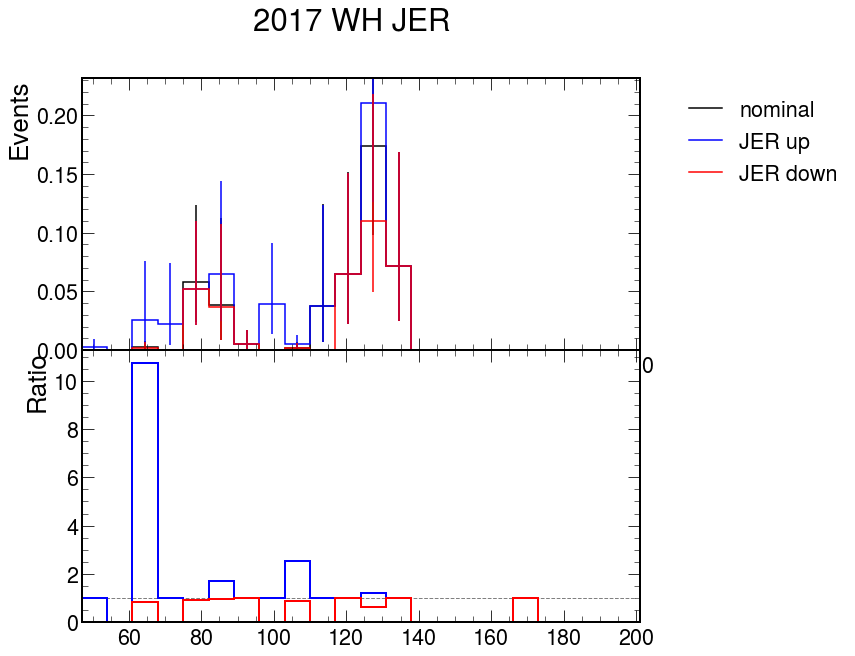

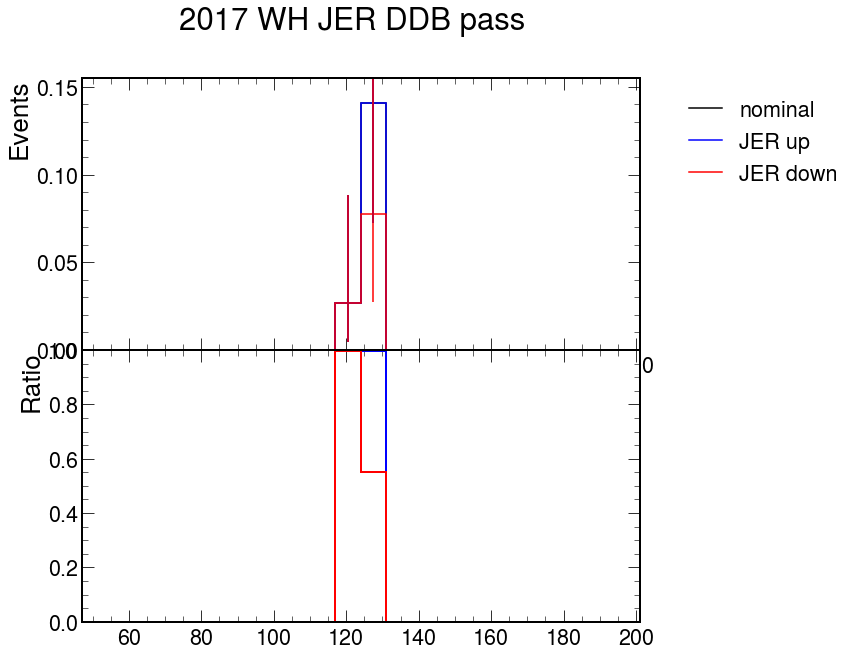

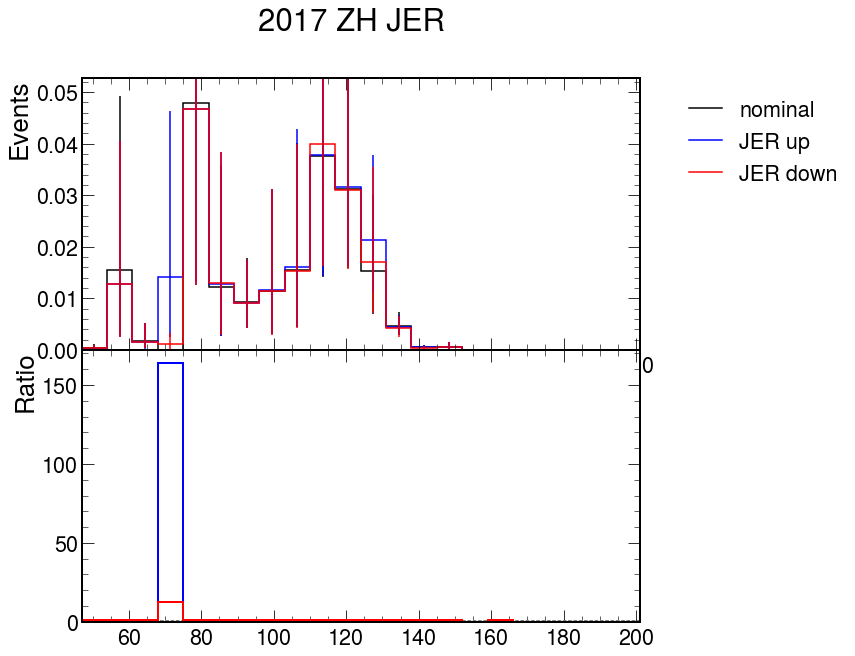

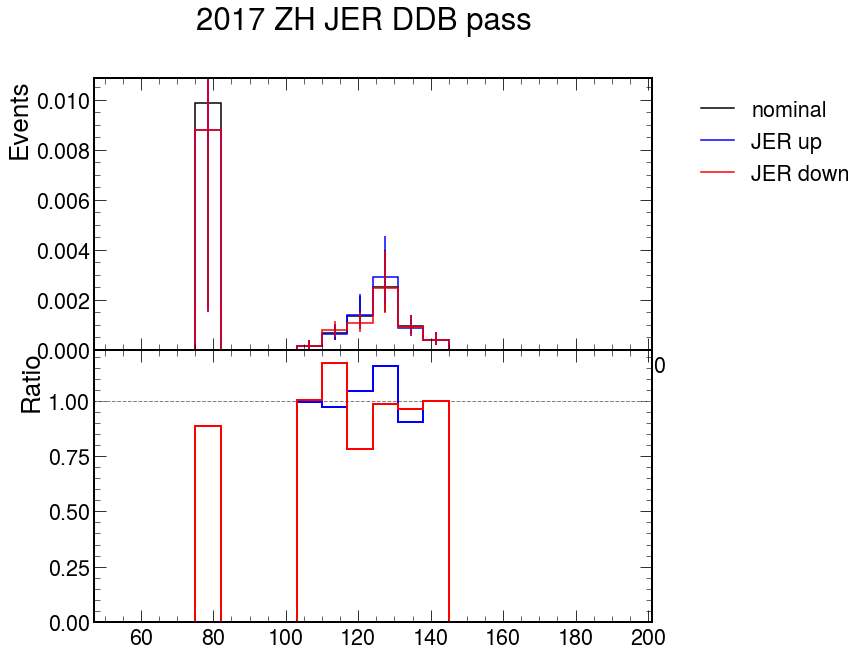

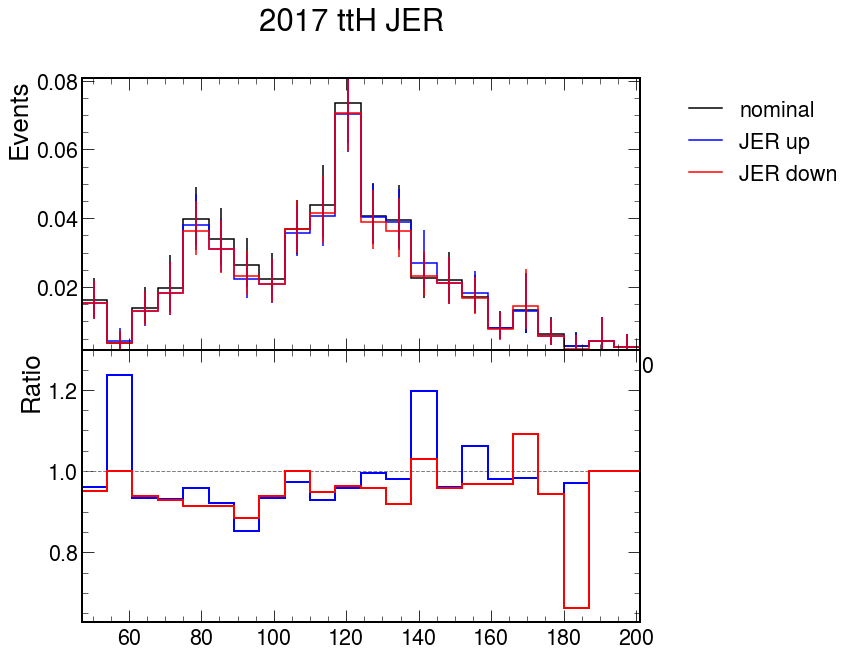

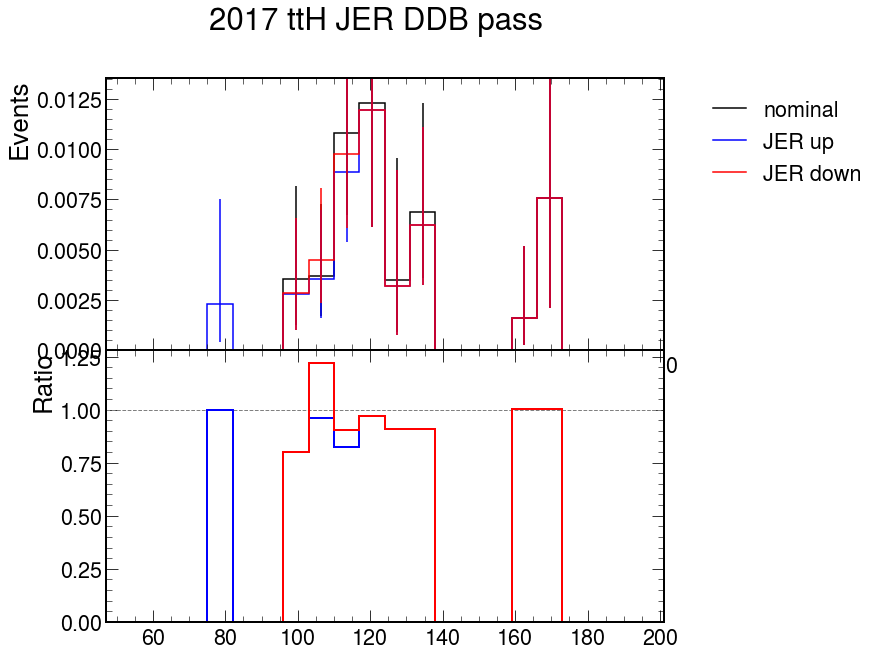

In [17]:
for p in mc:
    plot_syst(h.integrate('process',p),'JER',year+' '+p + ' JER',year+'/syst_JER/'+p)
    plot_syst(g.integrate('process',p),'JER',year + ' ' + p + ' JER DDB pass', year+'/syst_JER/'+p+"_pass")

/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered i

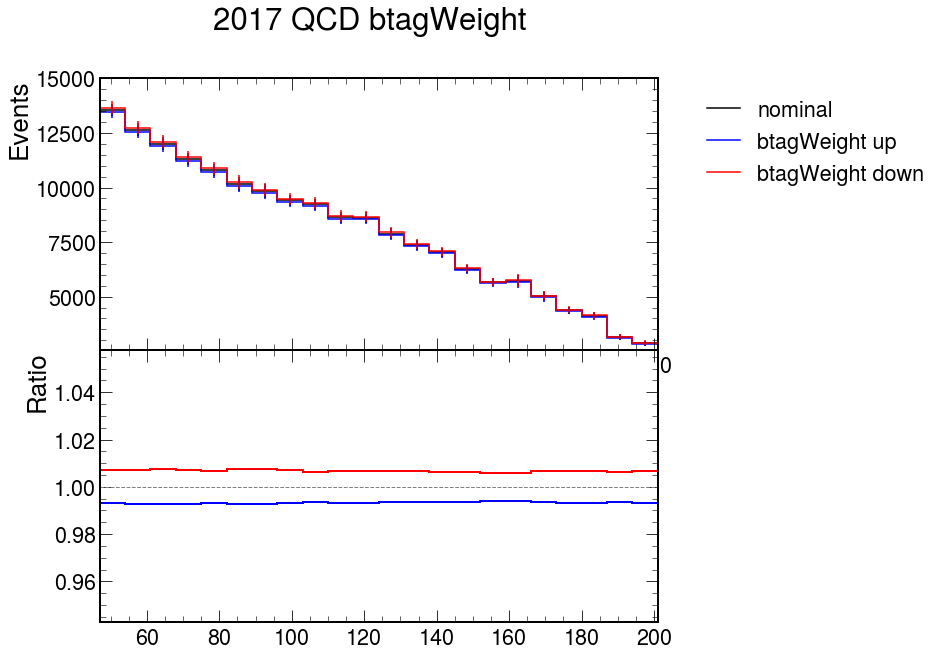

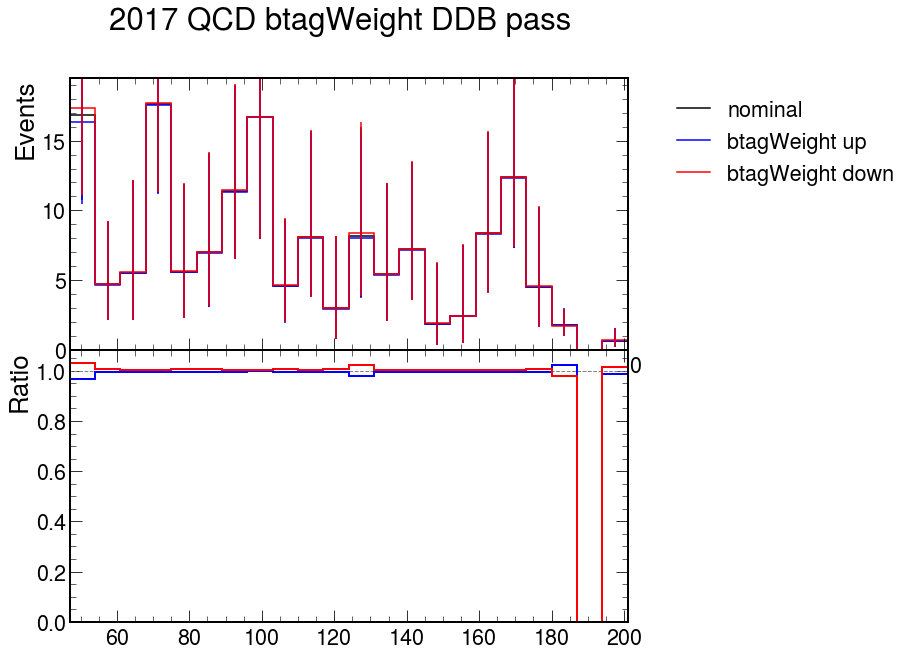

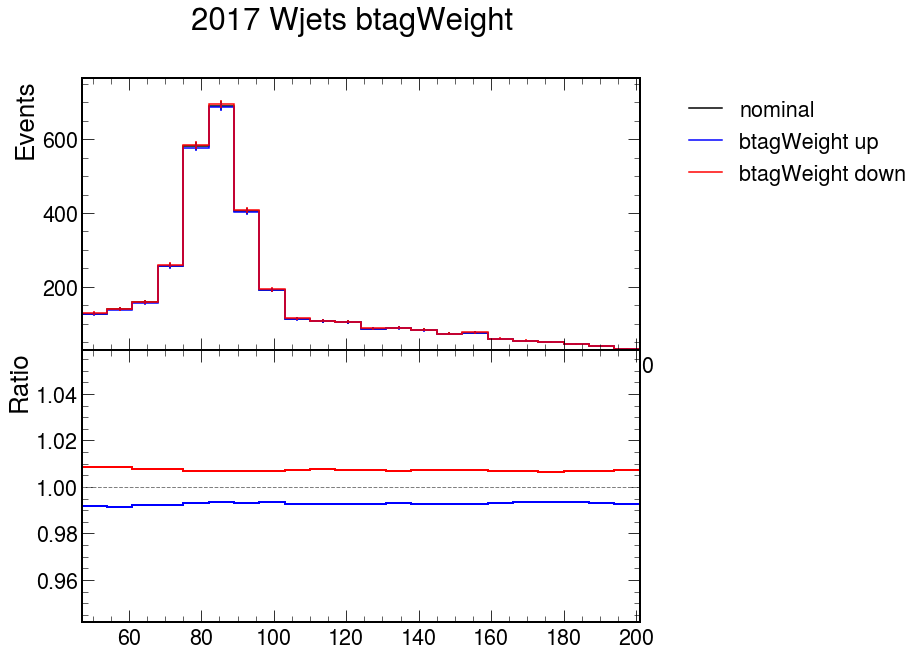

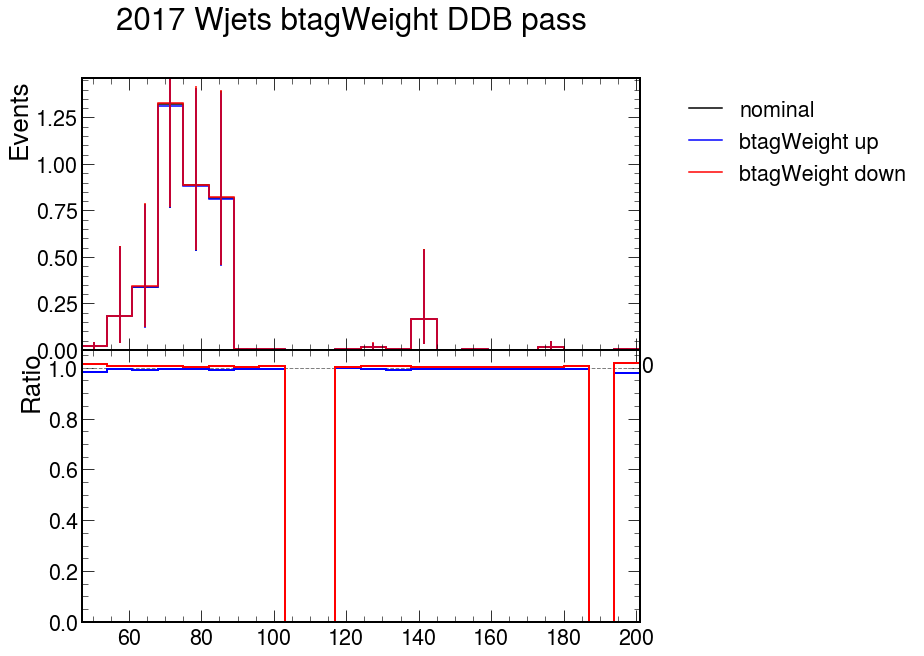

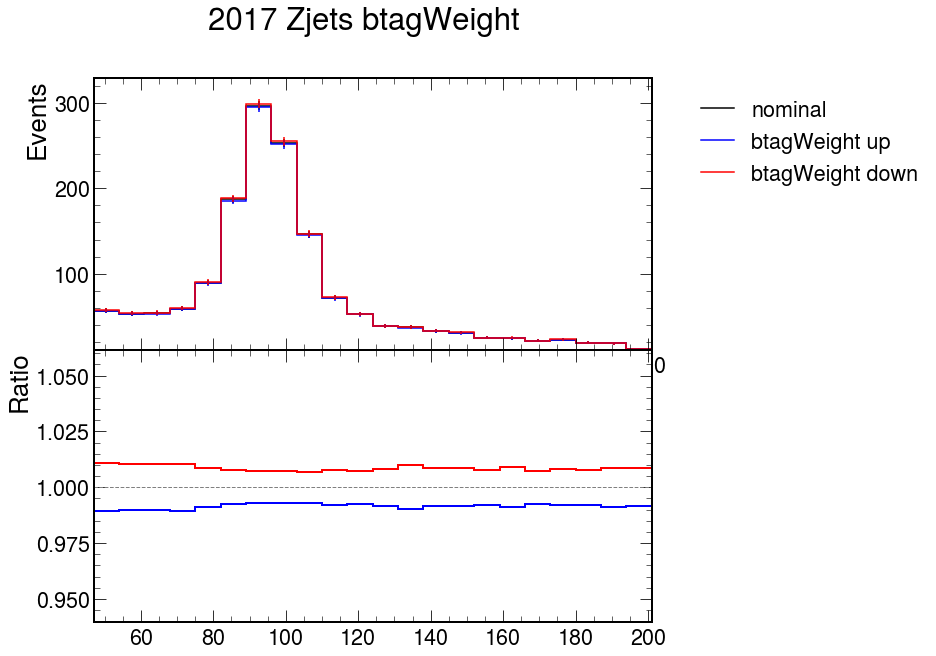

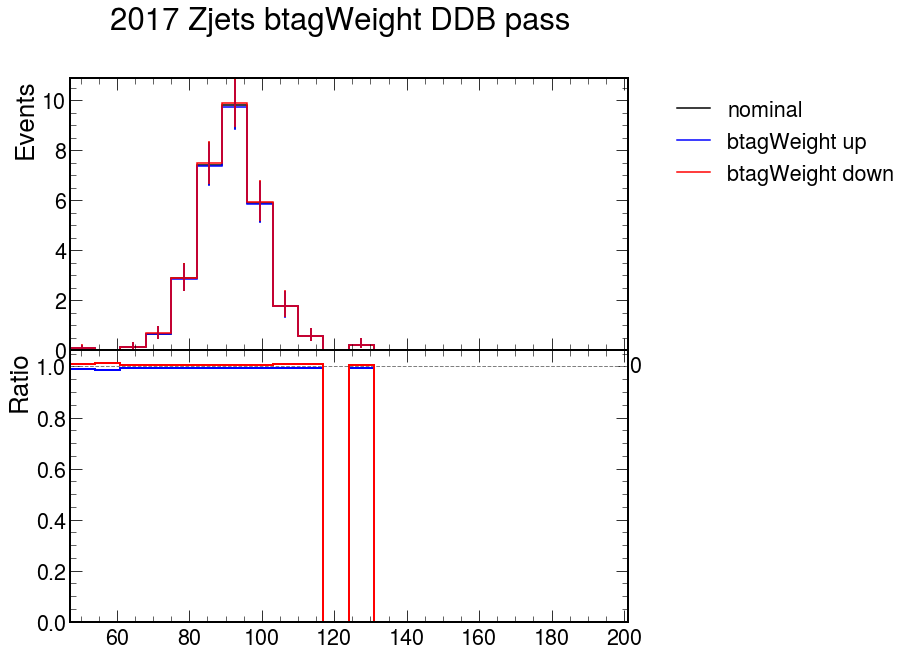

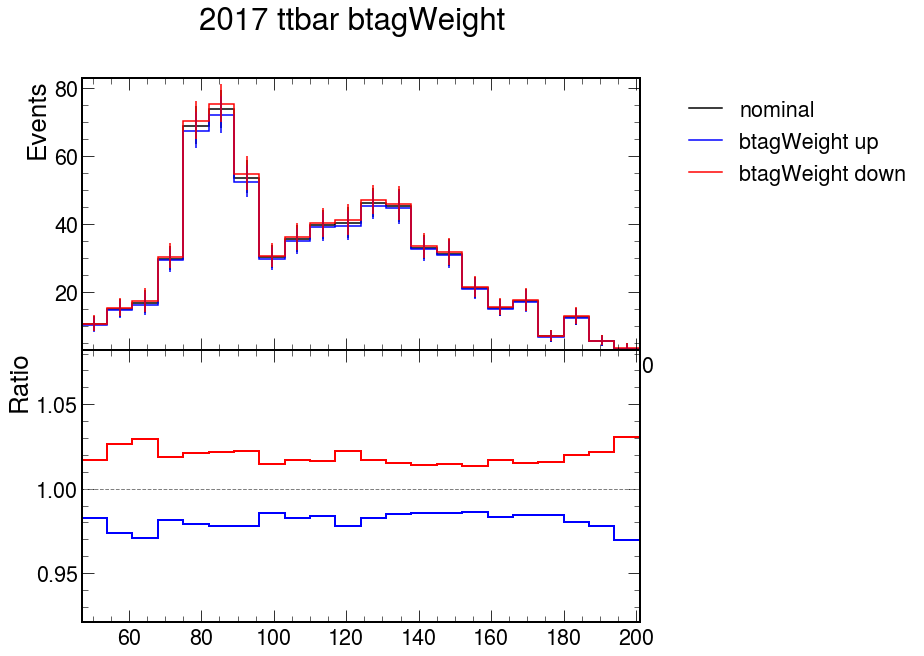

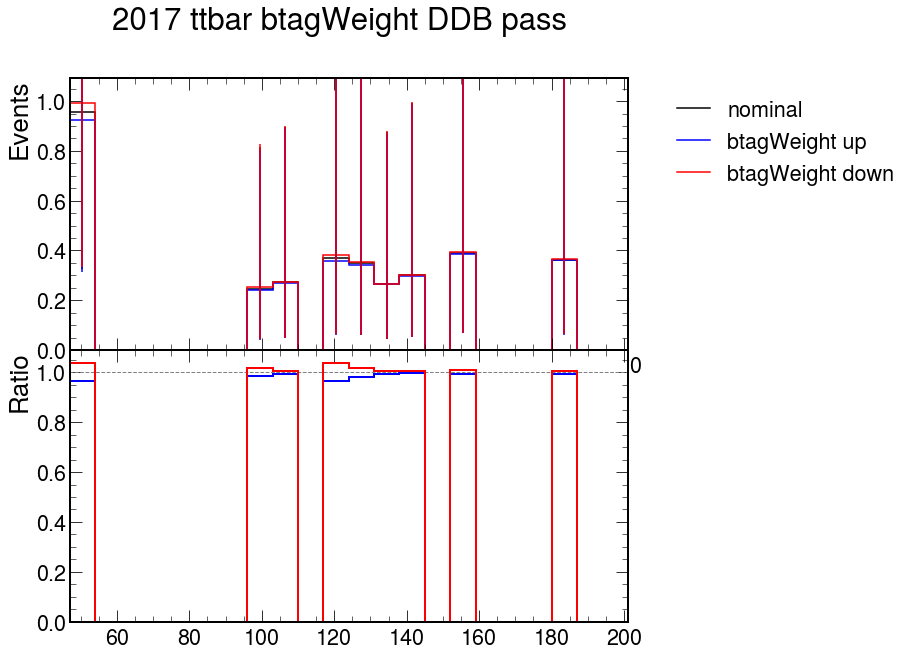

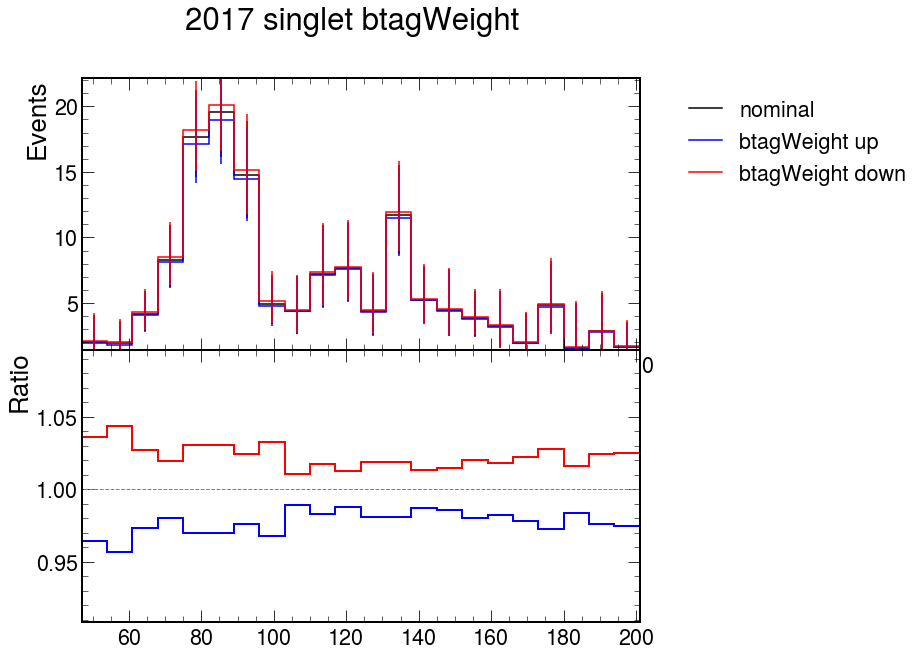

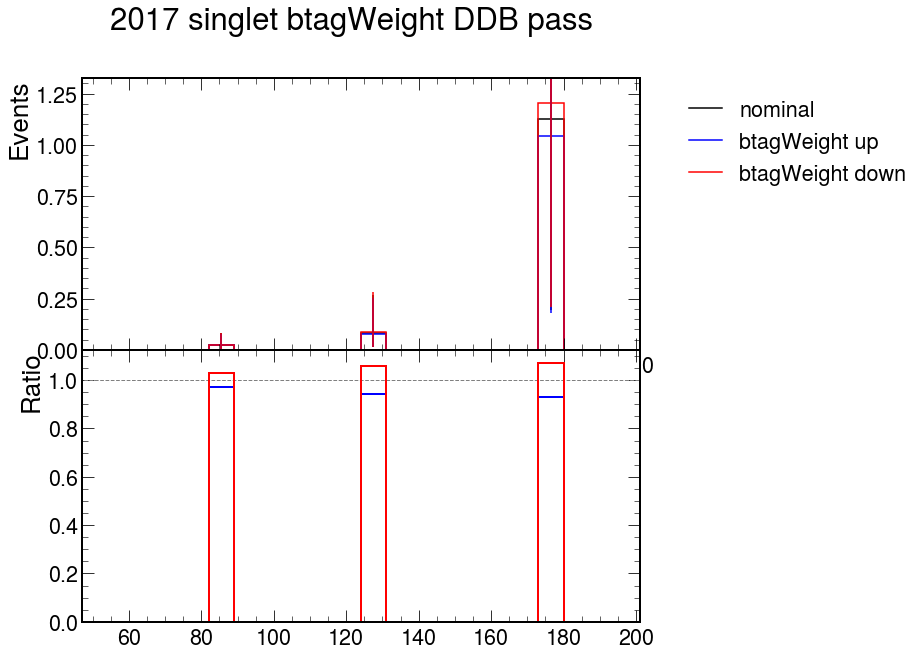

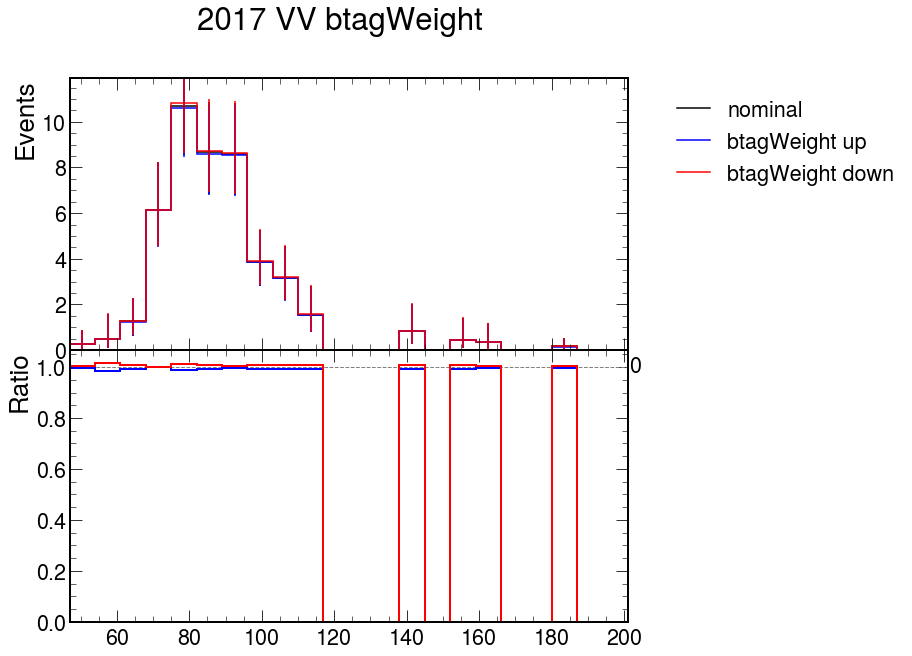

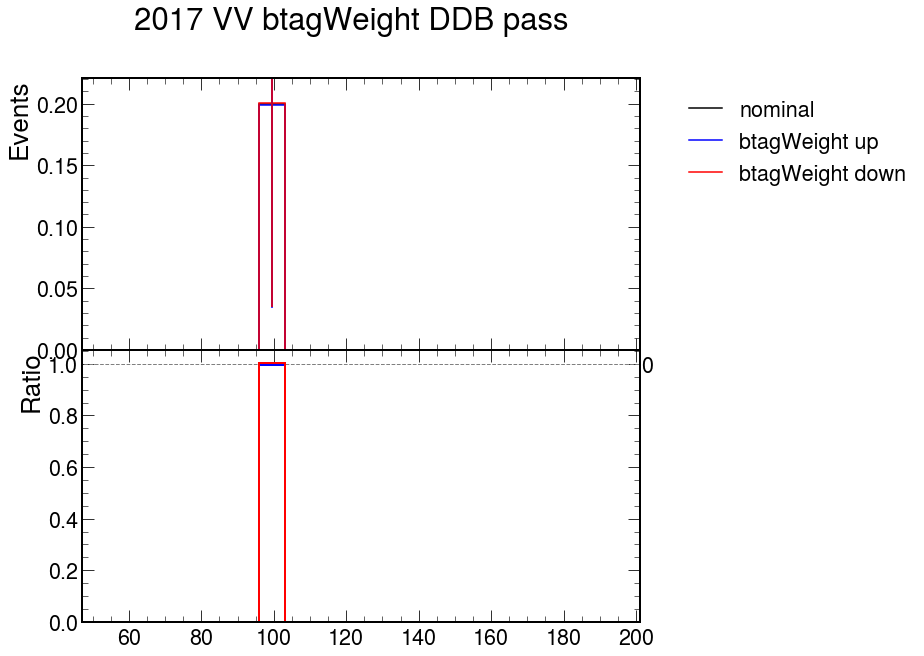

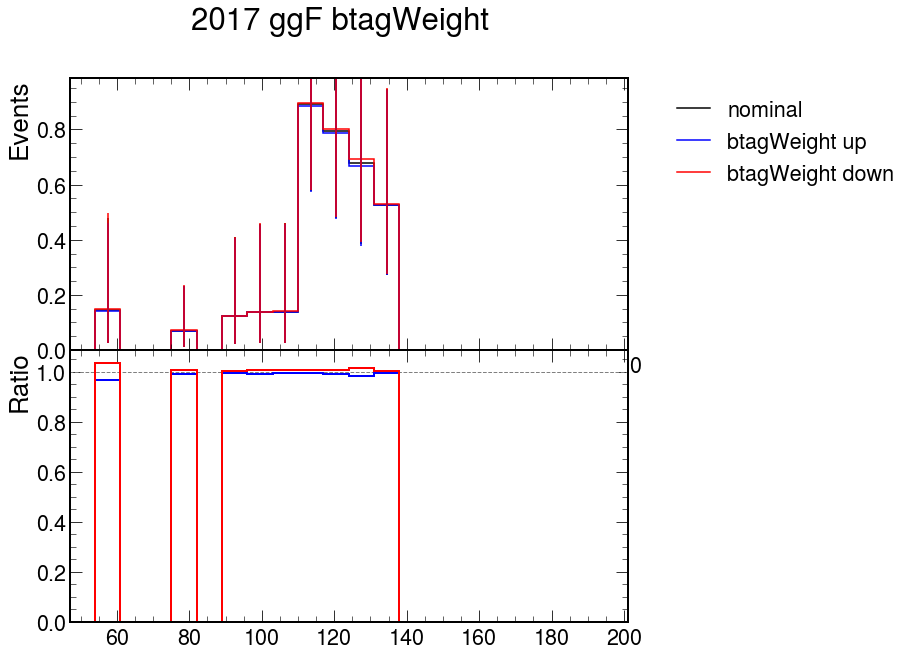

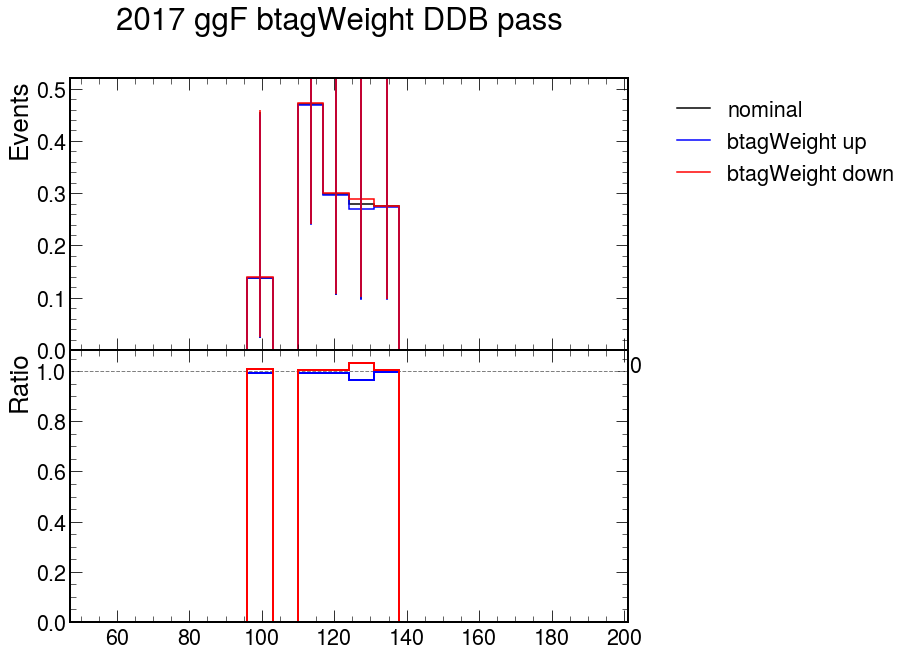

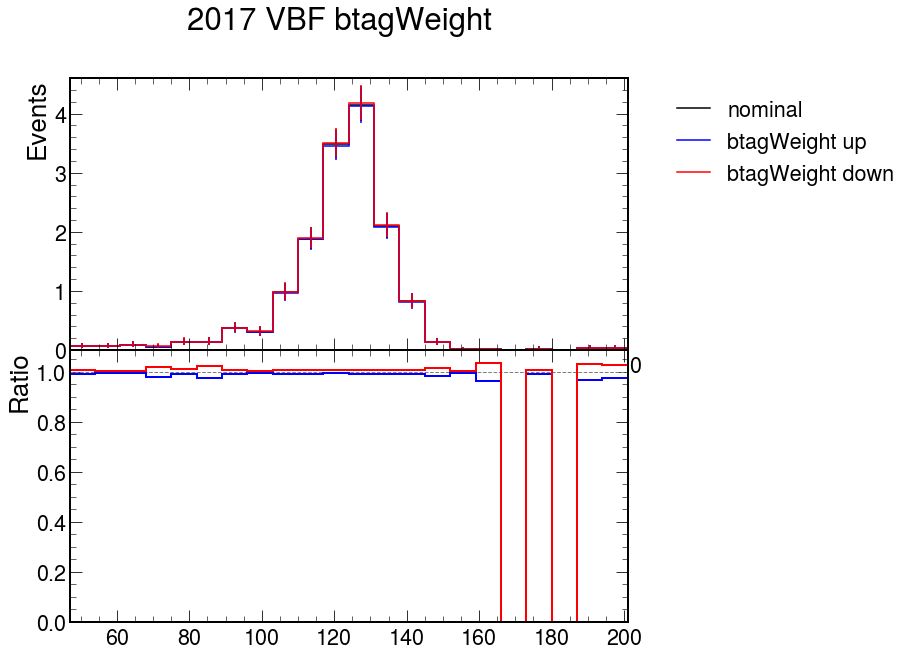

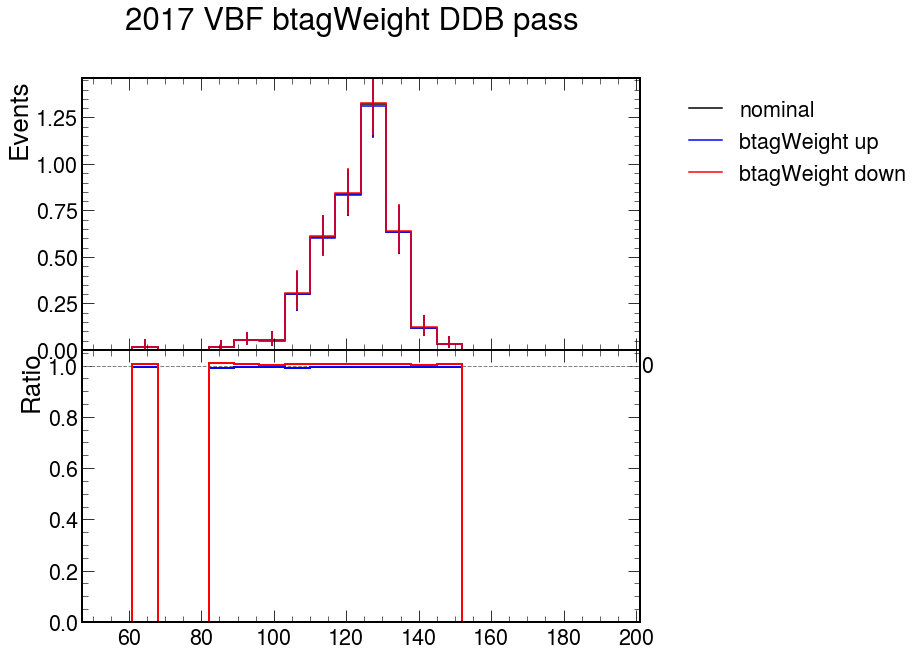

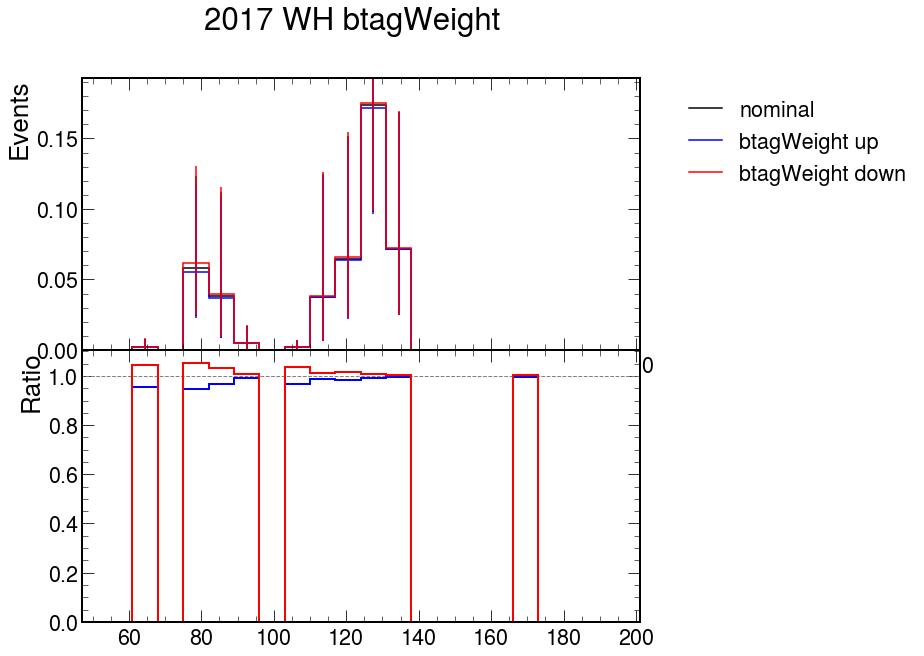

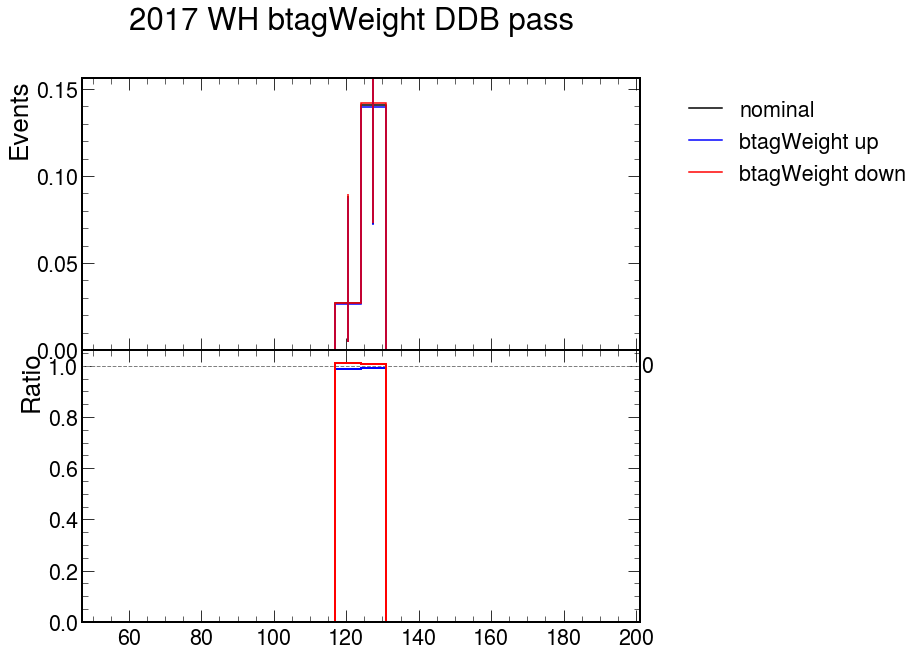

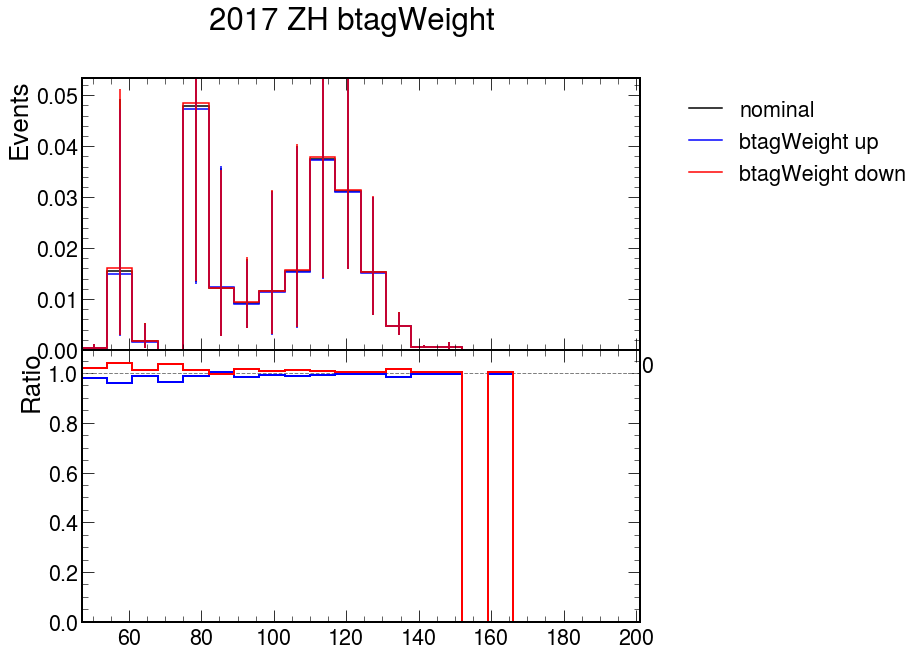

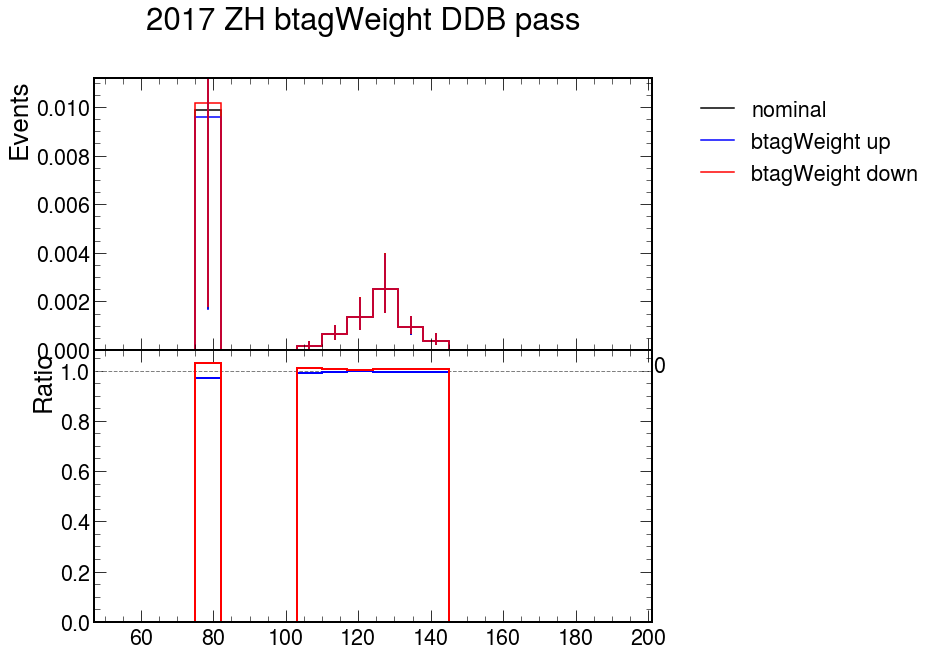

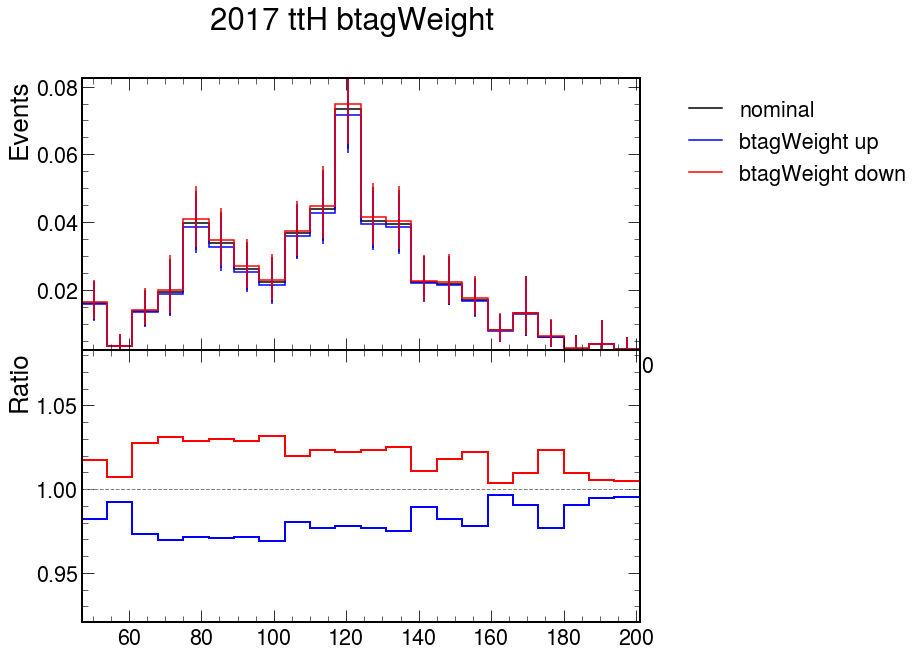

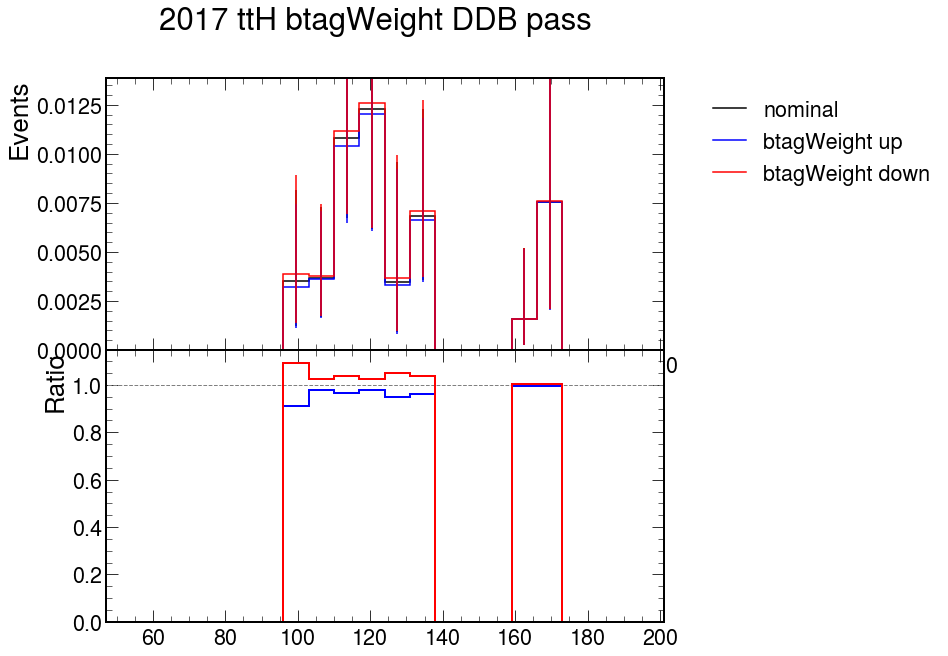

In [18]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagWeight',year+' '+p + ' btagWeight',year+'/syst_btagWeight/'+p)
    plot_syst(g.integrate('process',p),'btagWeight',year + ' ' + p + ' btagWeight DDB pass', year+'/syst_btagWeight/'+p+"_pass")

/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered i

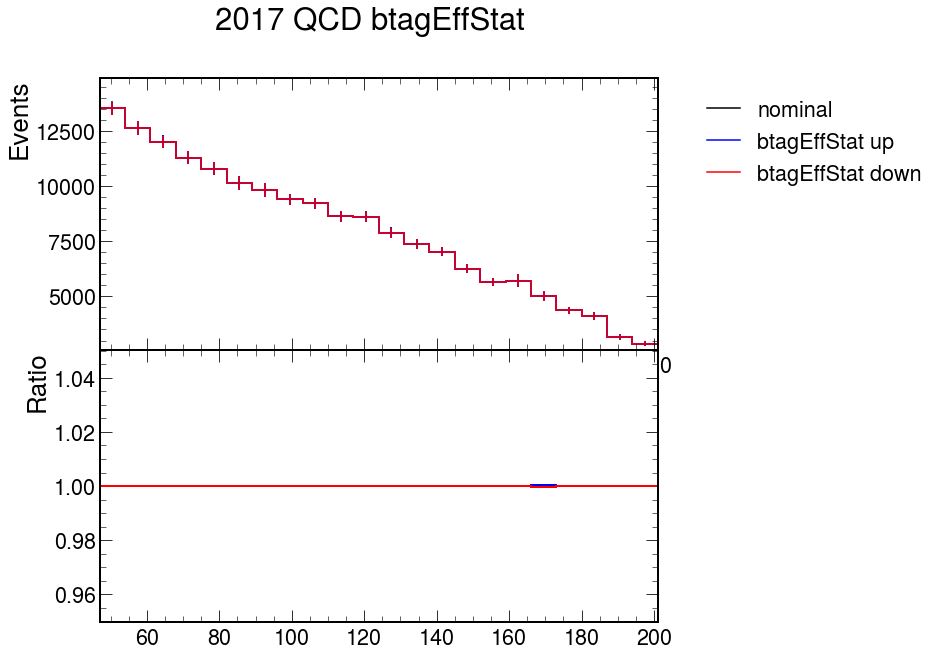

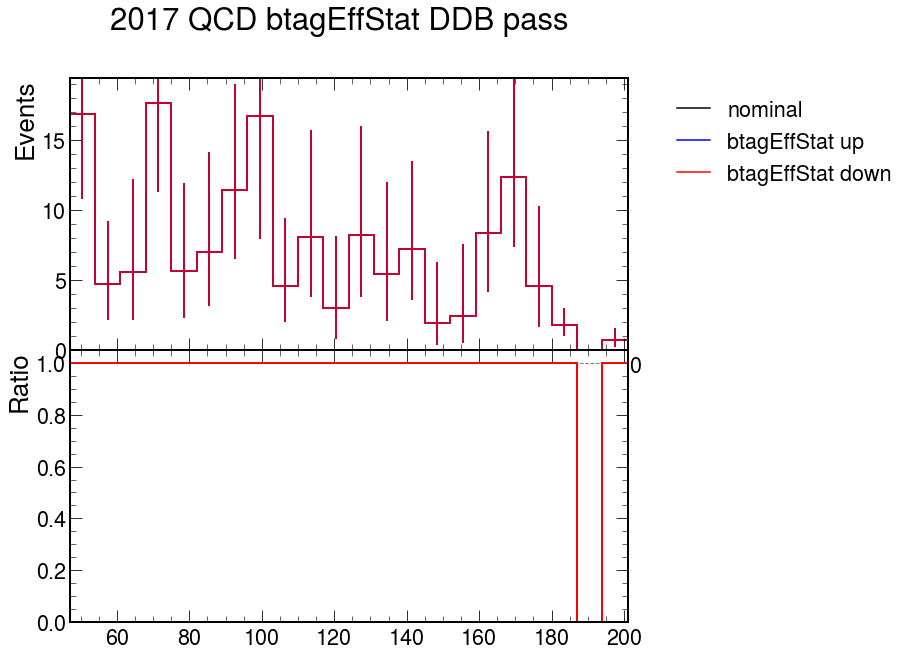

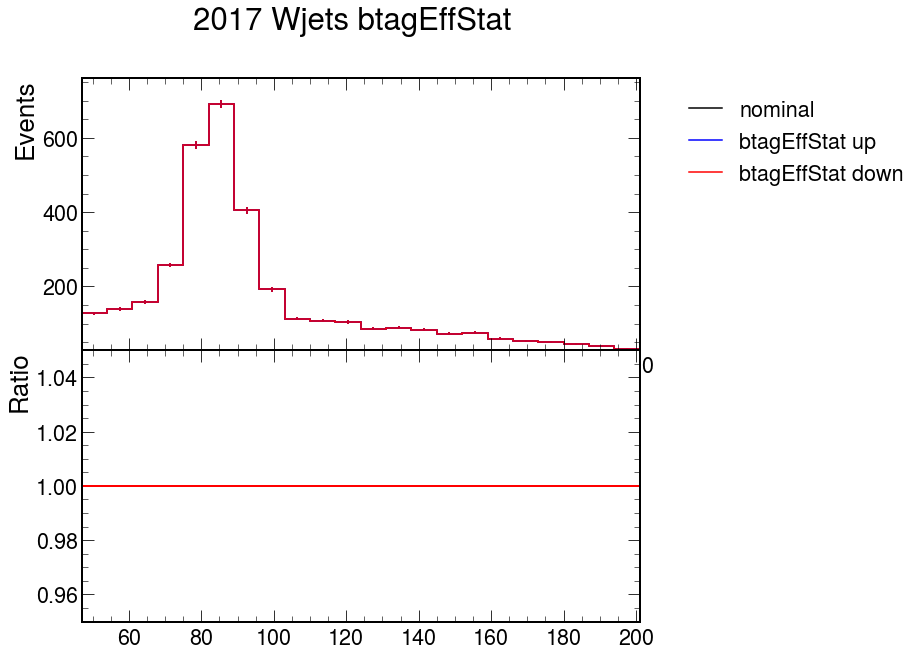

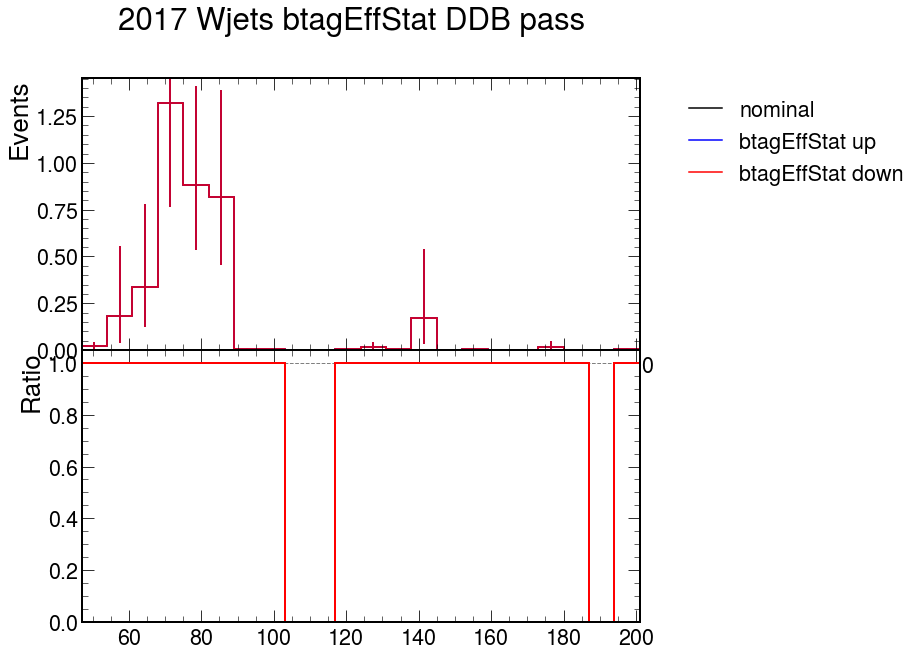

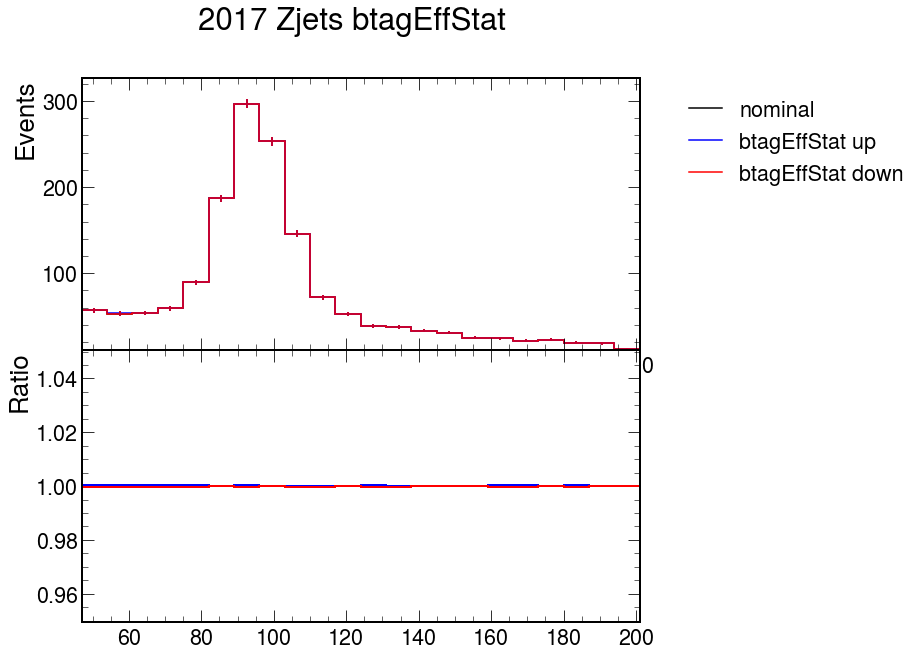

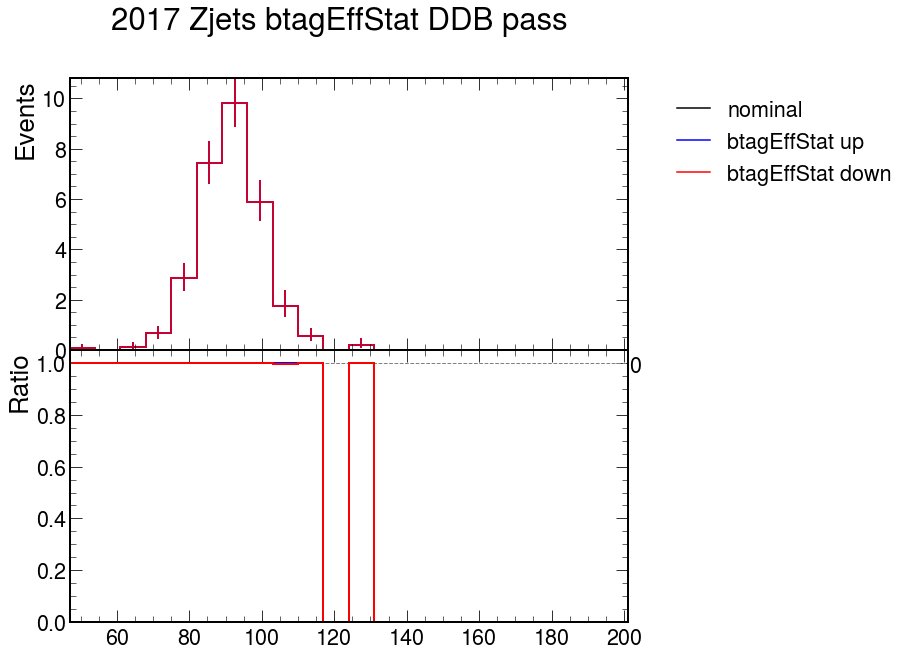

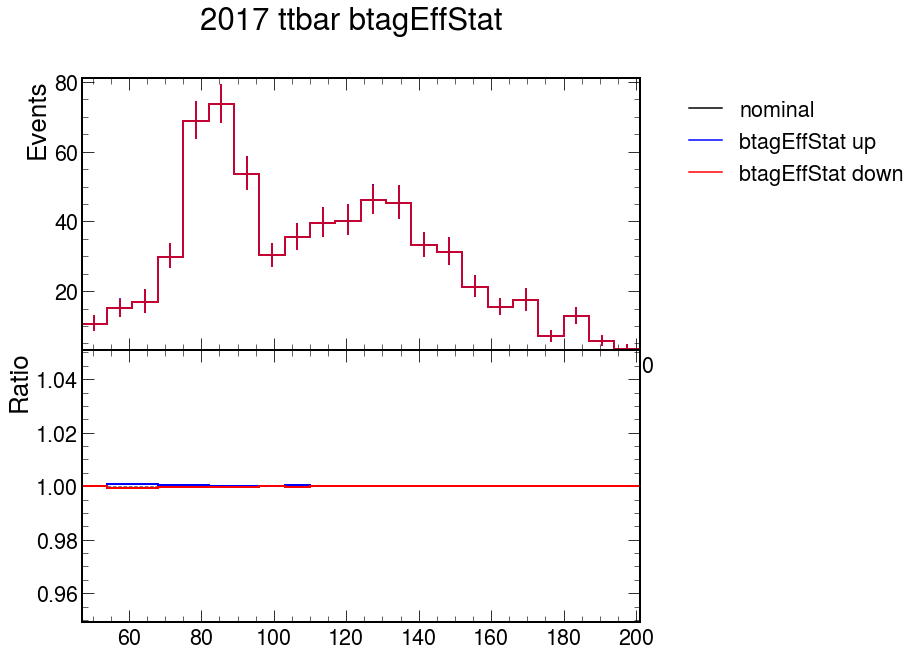

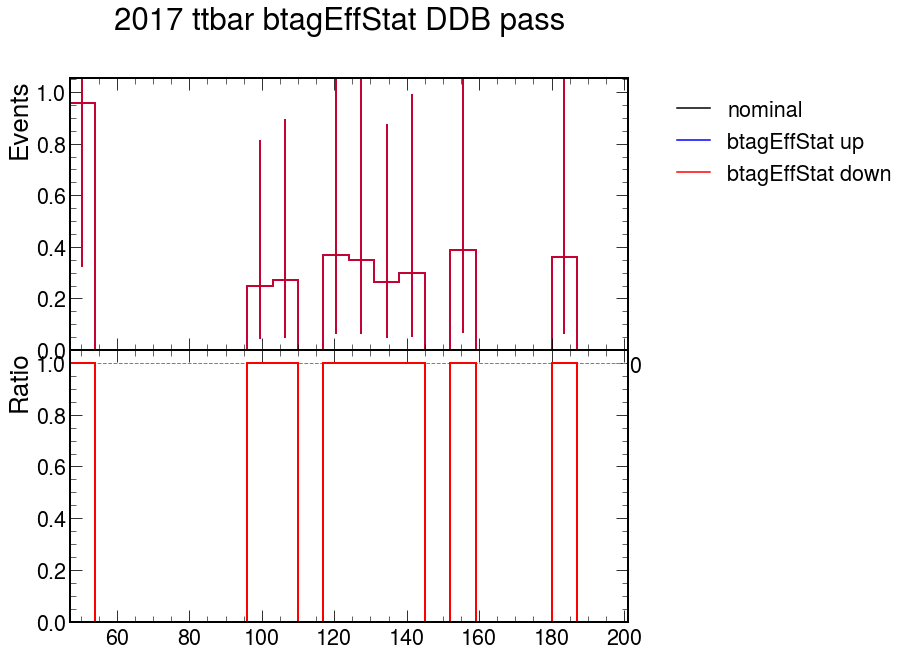

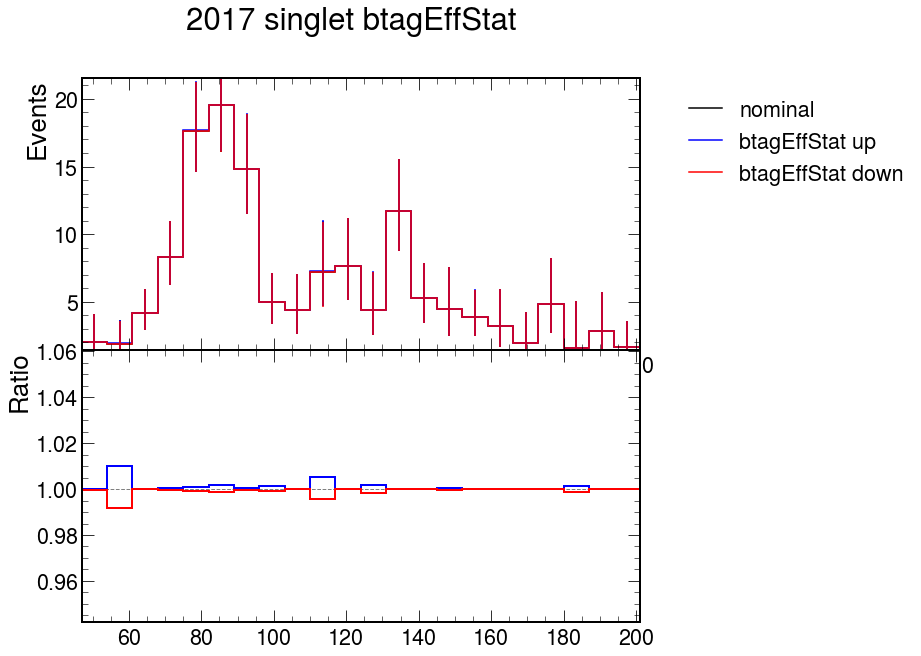

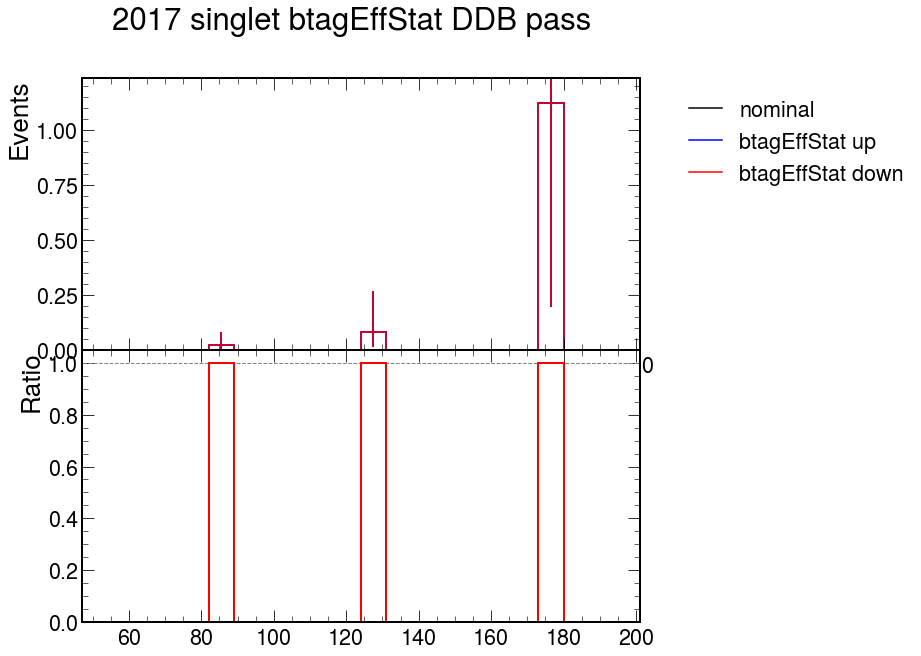

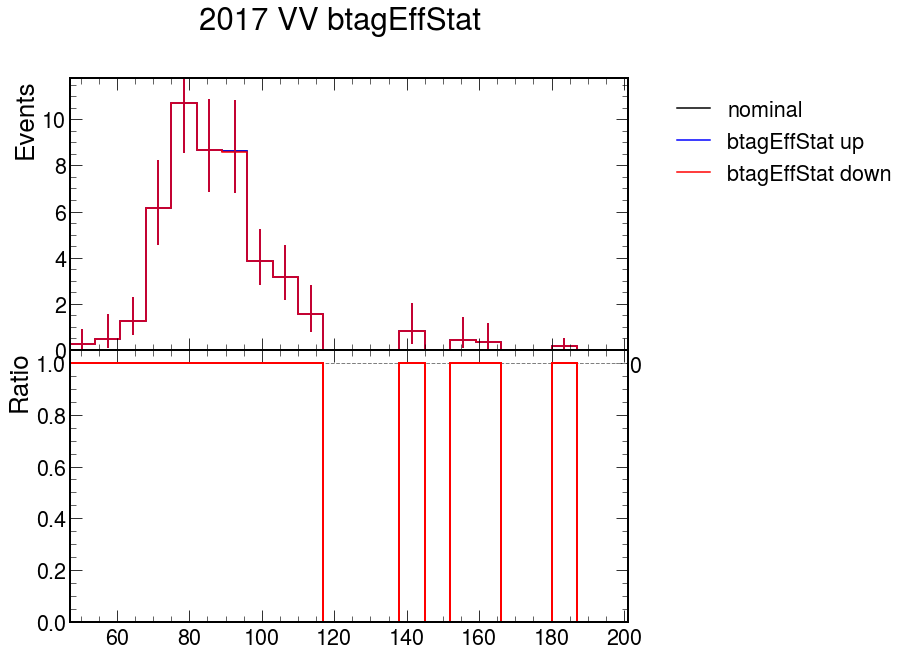

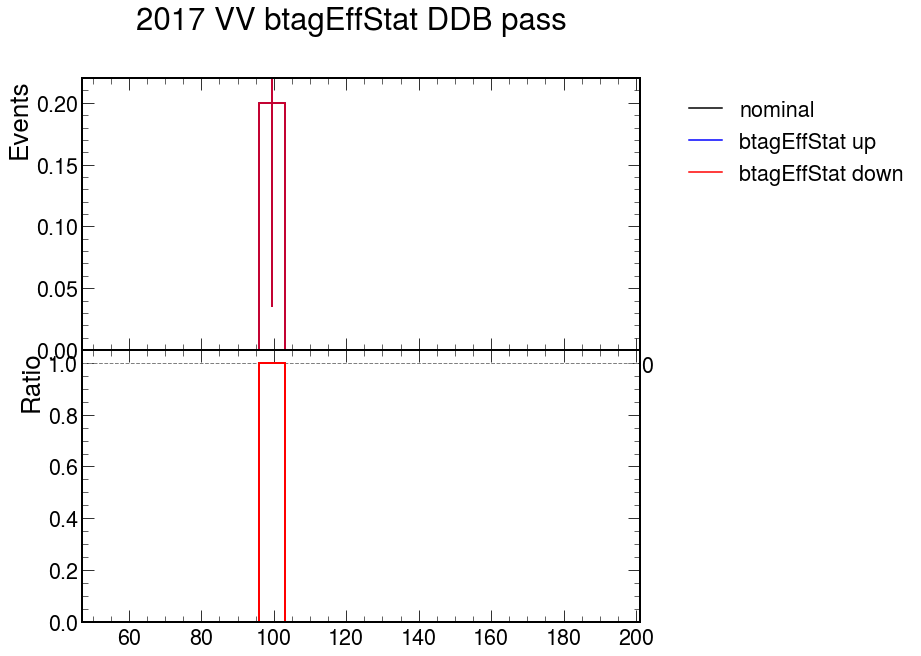

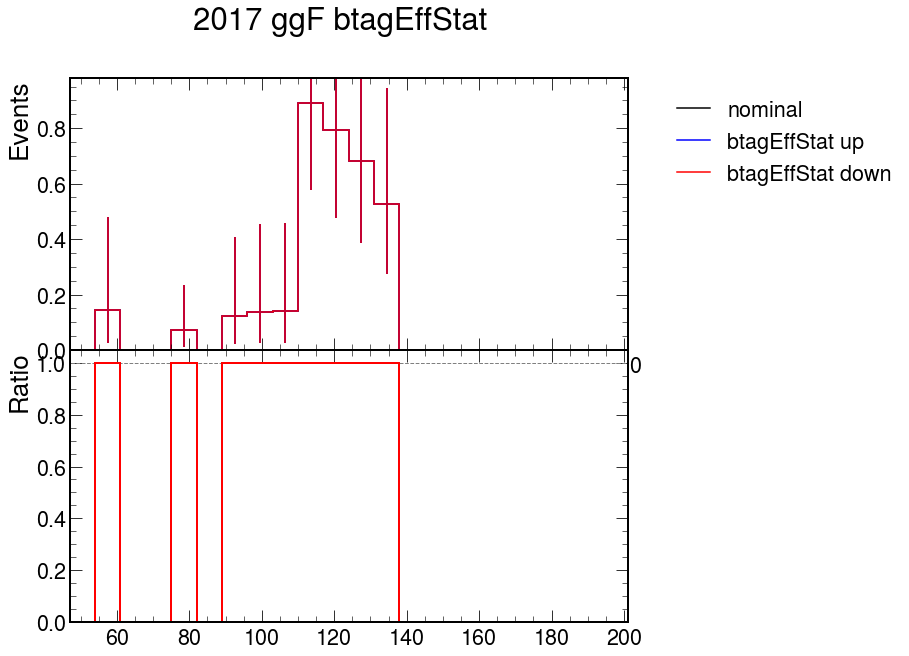

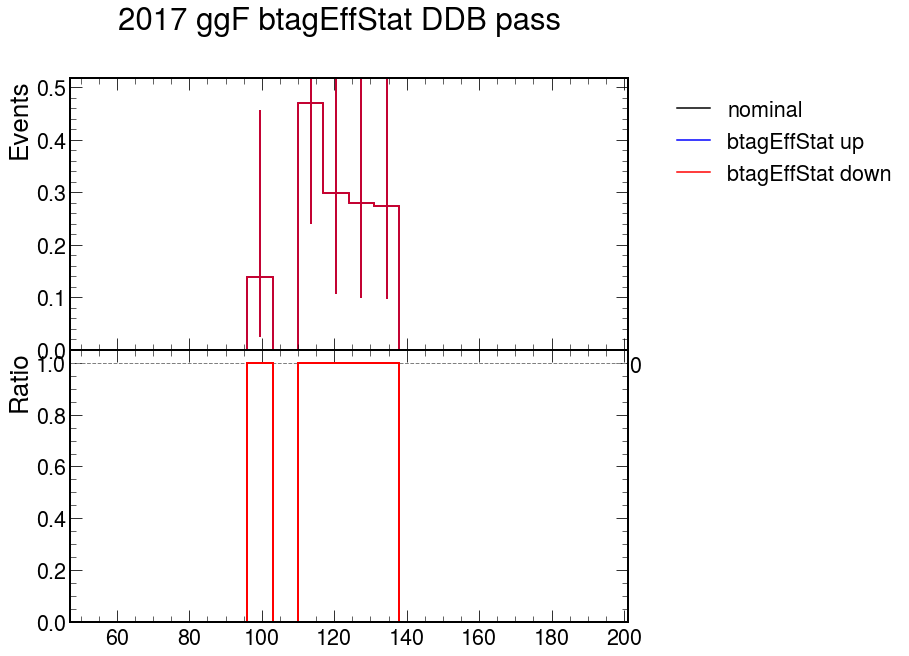

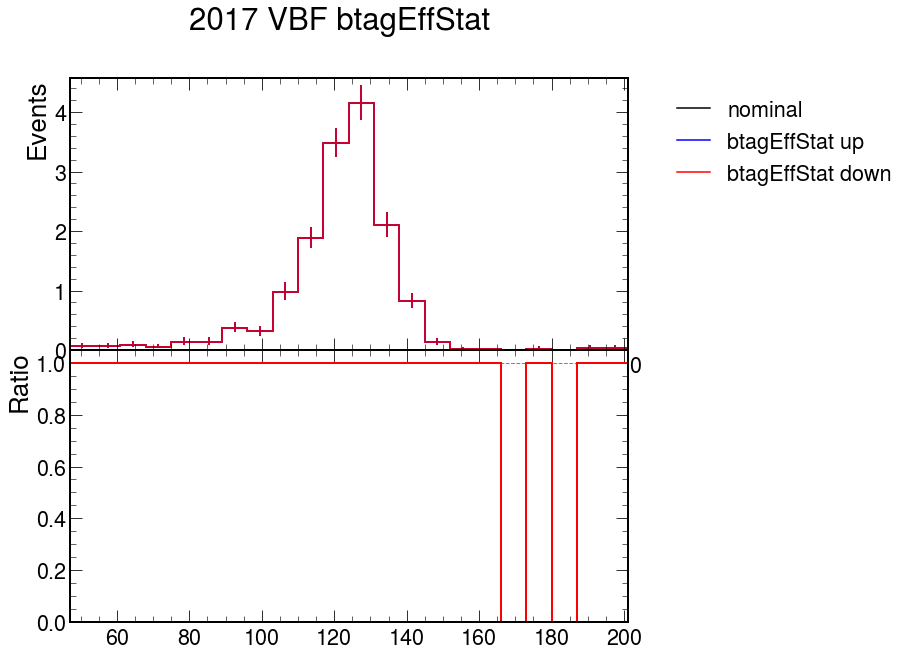

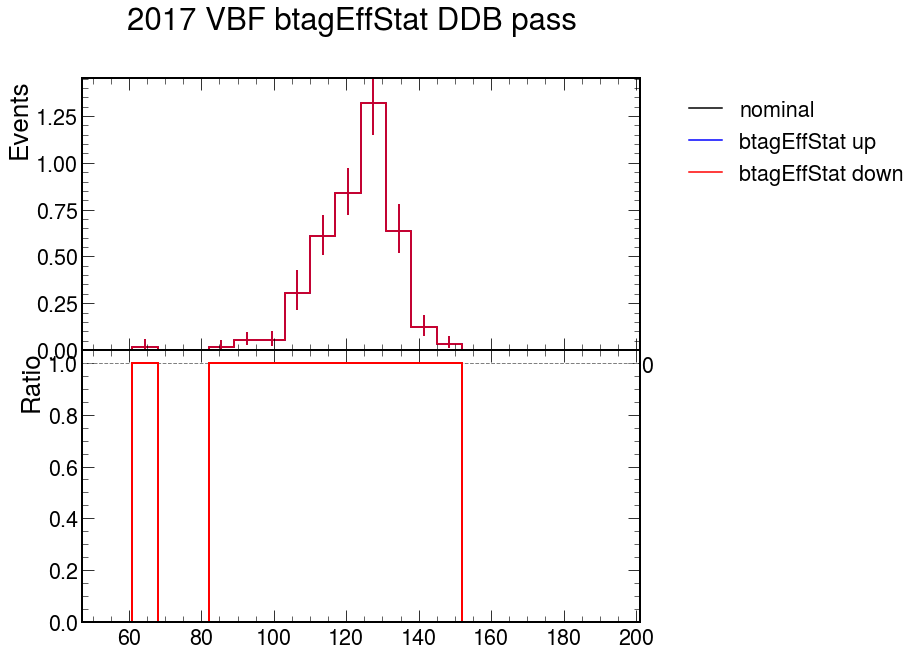

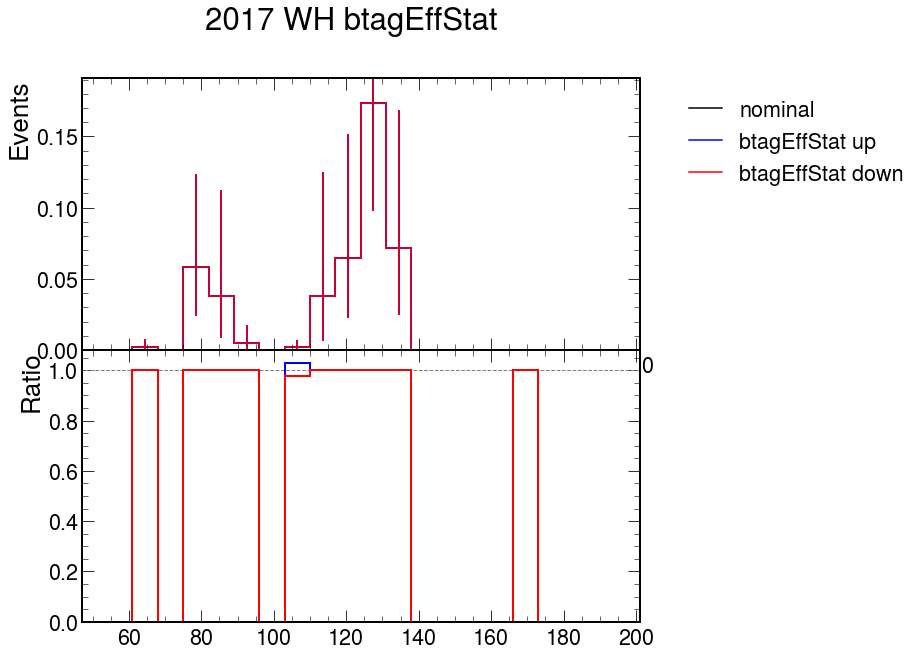

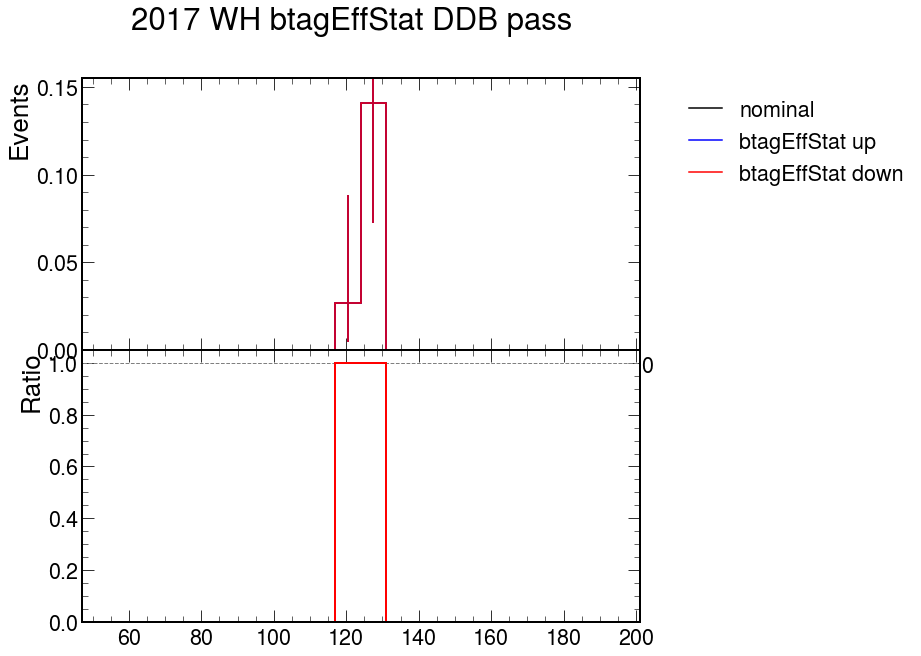

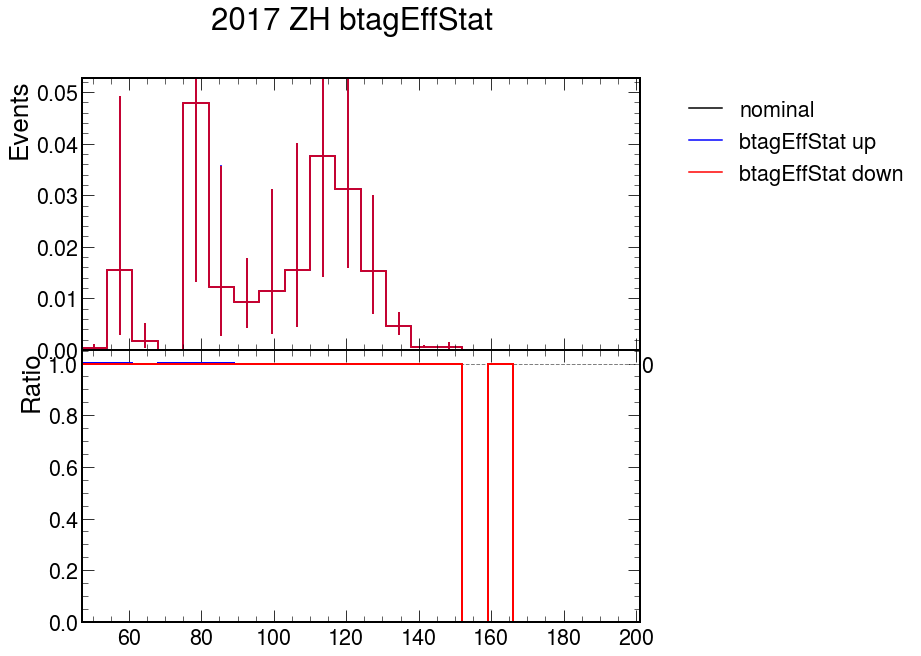

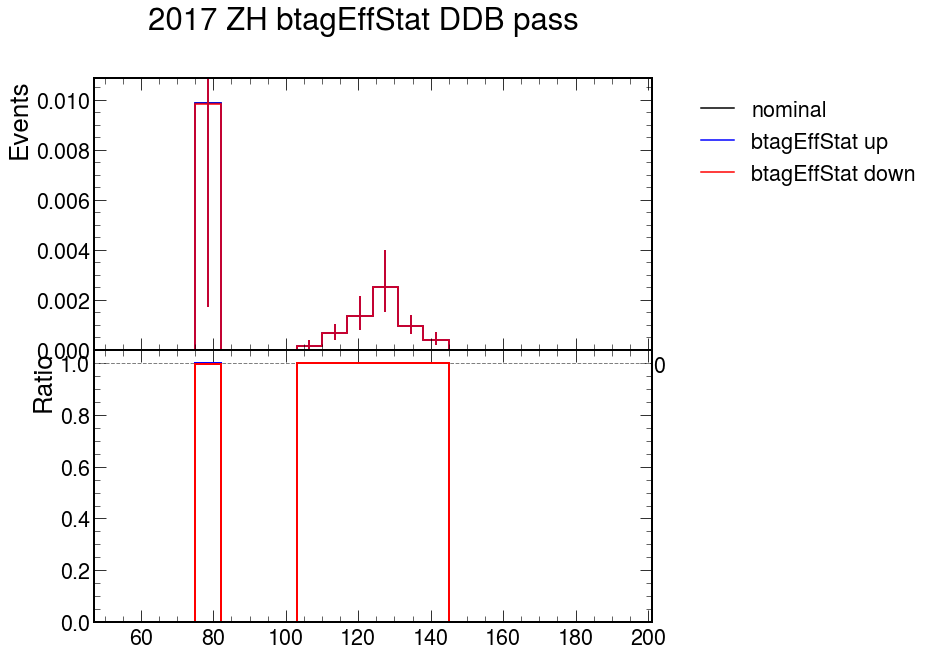

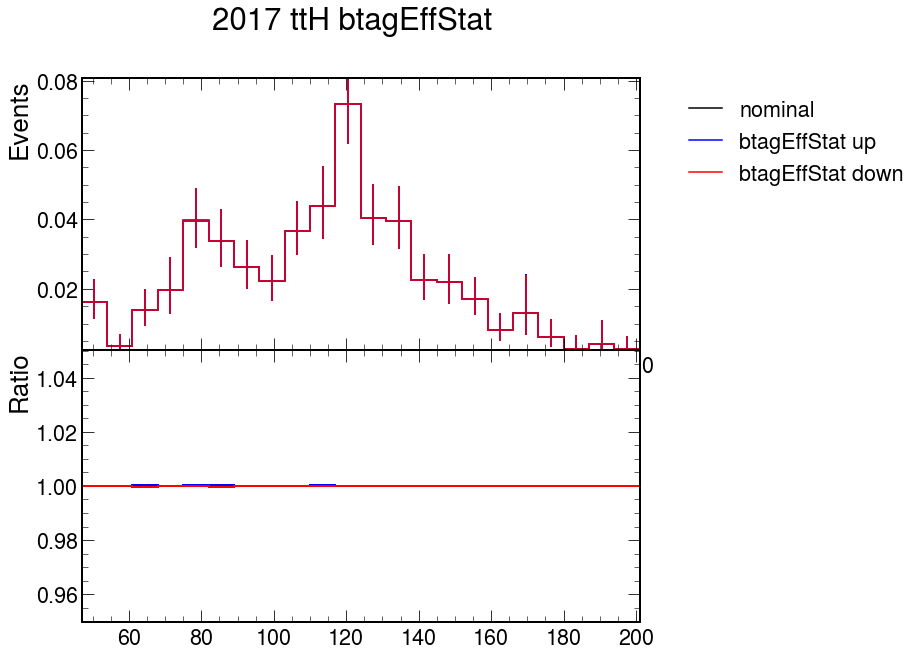

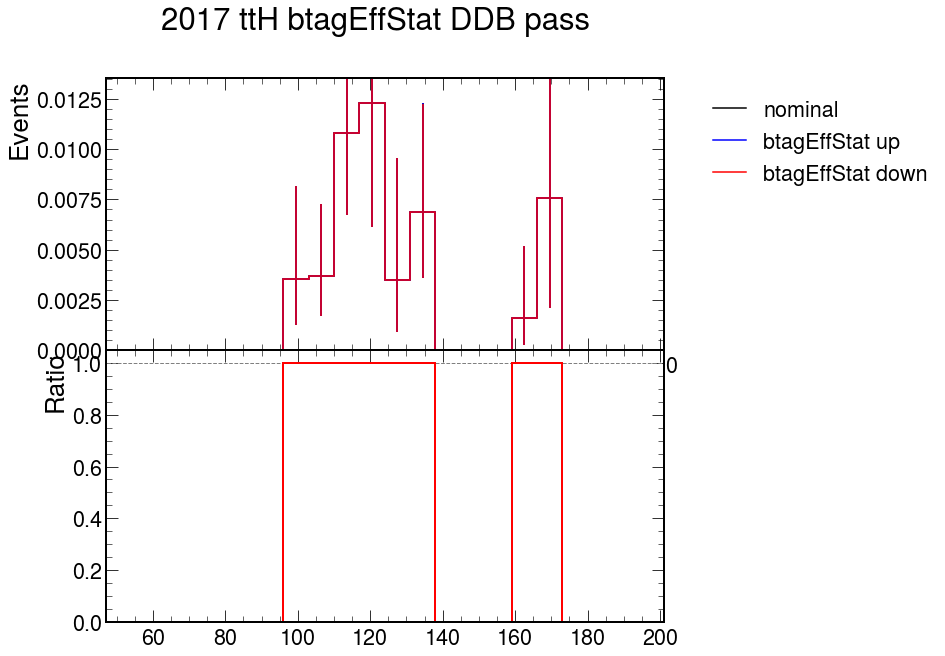

In [19]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagEffStat',year+' '+p + ' btagEffStat',year+'/syst_btagEffStat/'+p)
    plot_syst(g.integrate('process',p),'btagEffStat',year + ' ' + p + ' btagEffStat DDB pass', year+'/syst_btagEffStat/'+p+"_pass")

/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered i

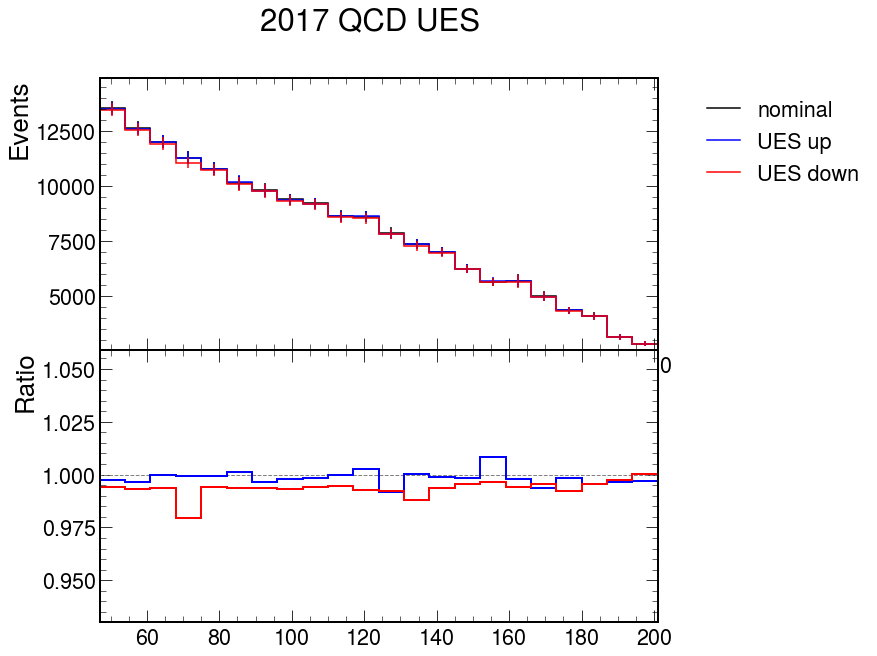

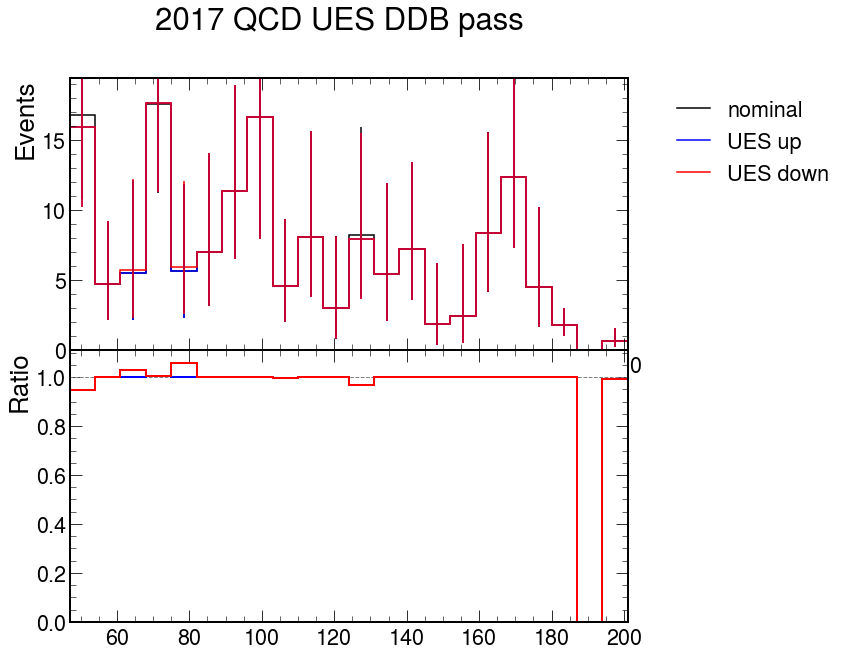

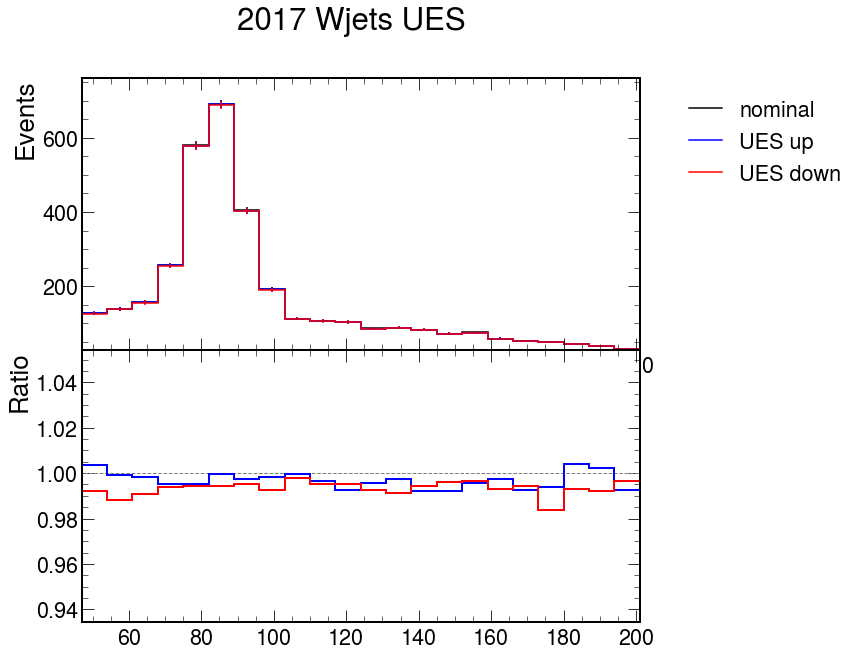

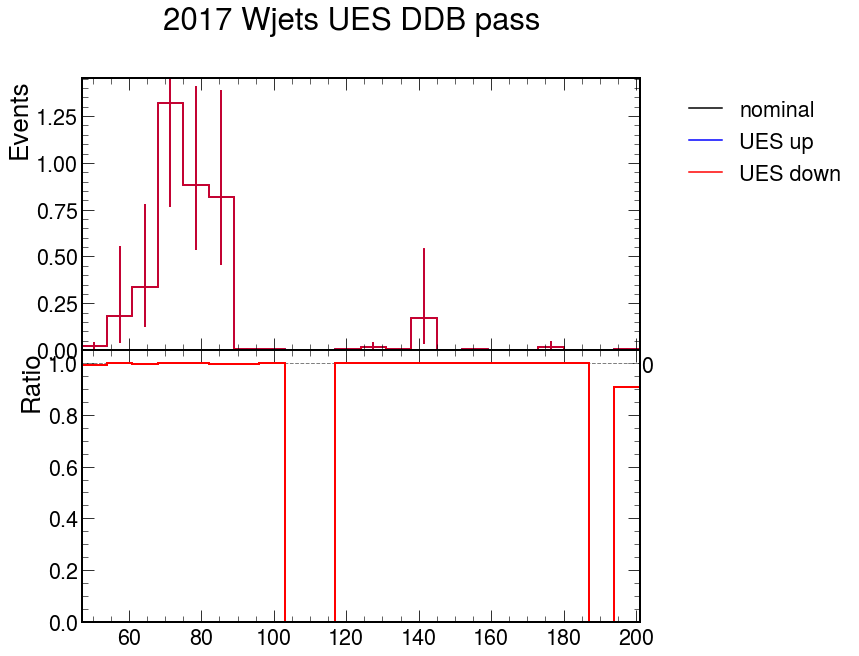

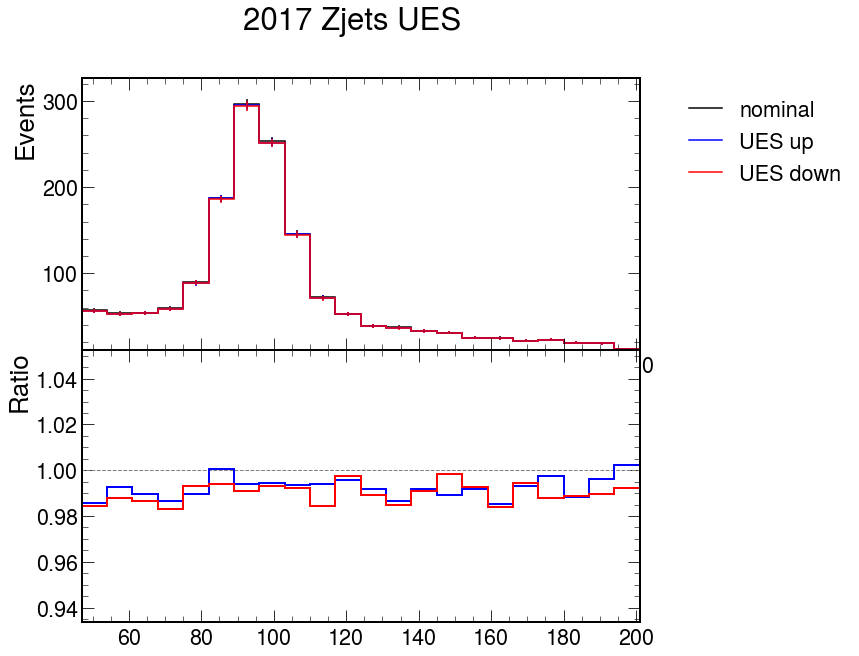

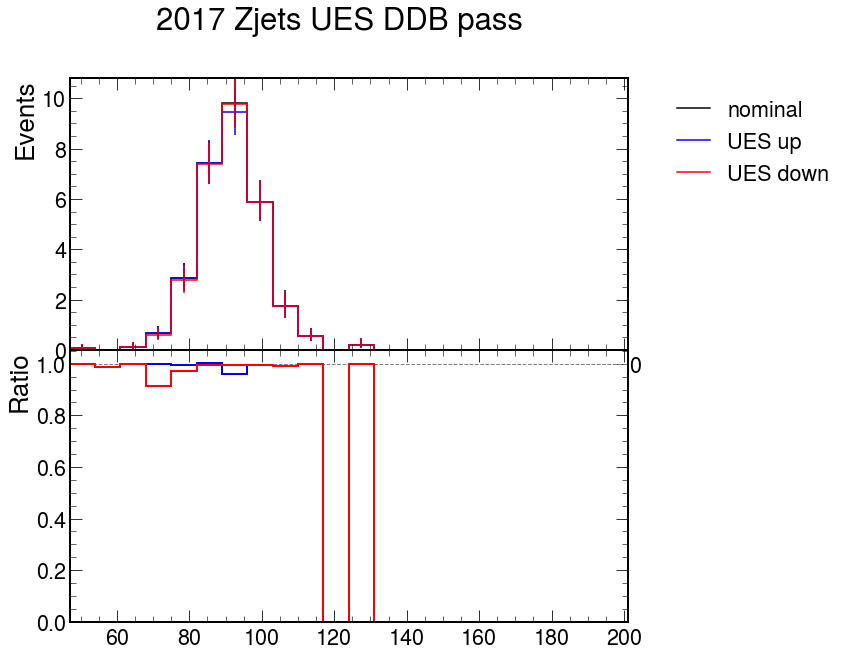

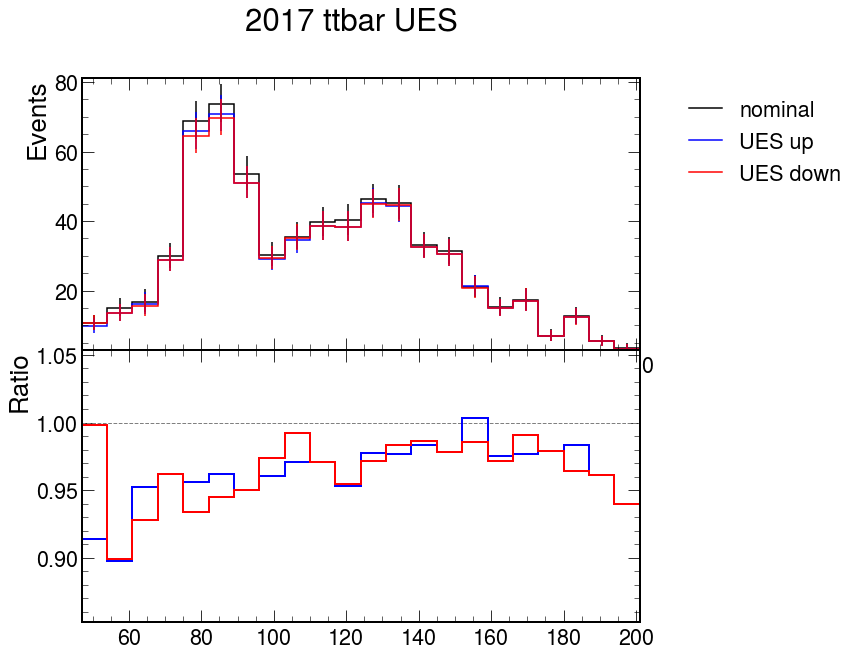

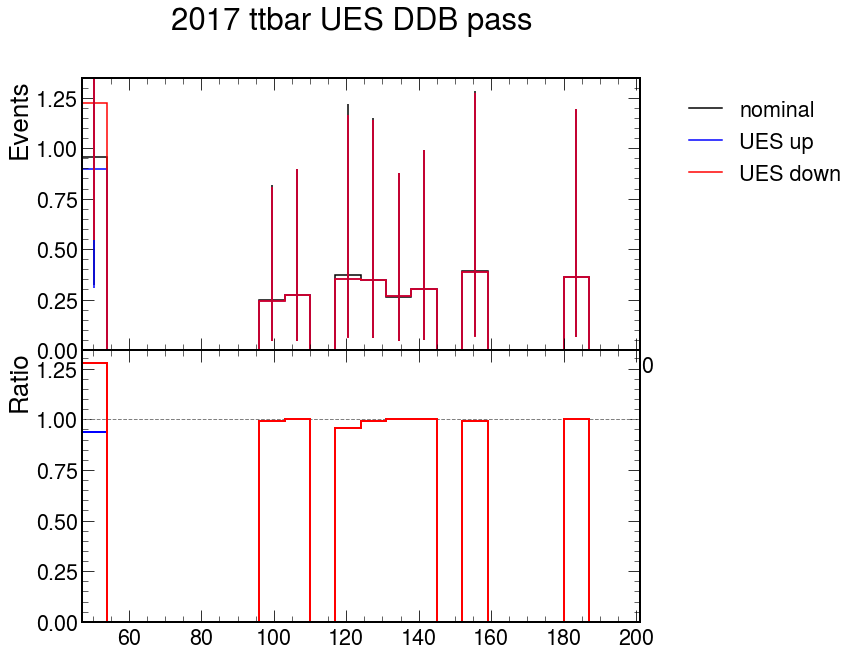

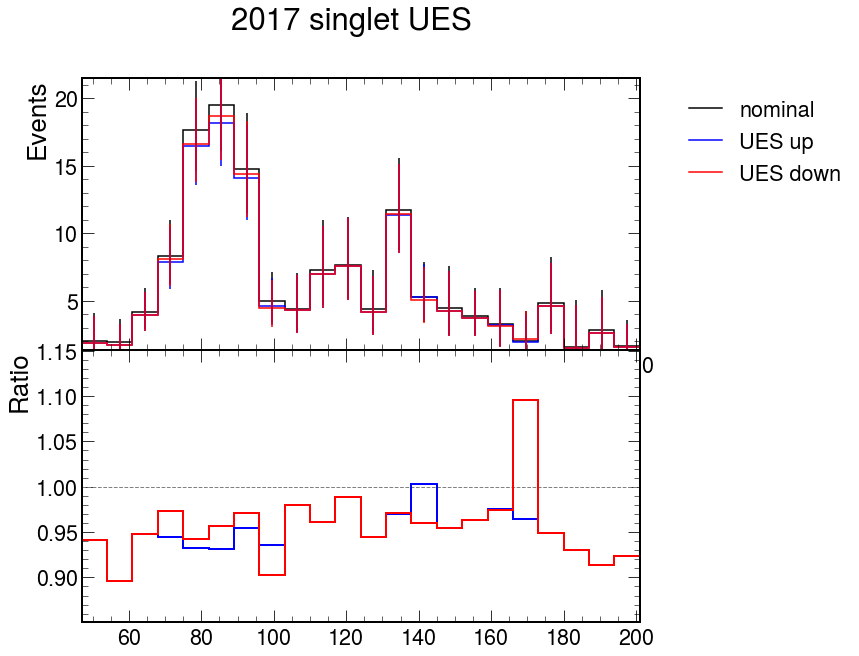

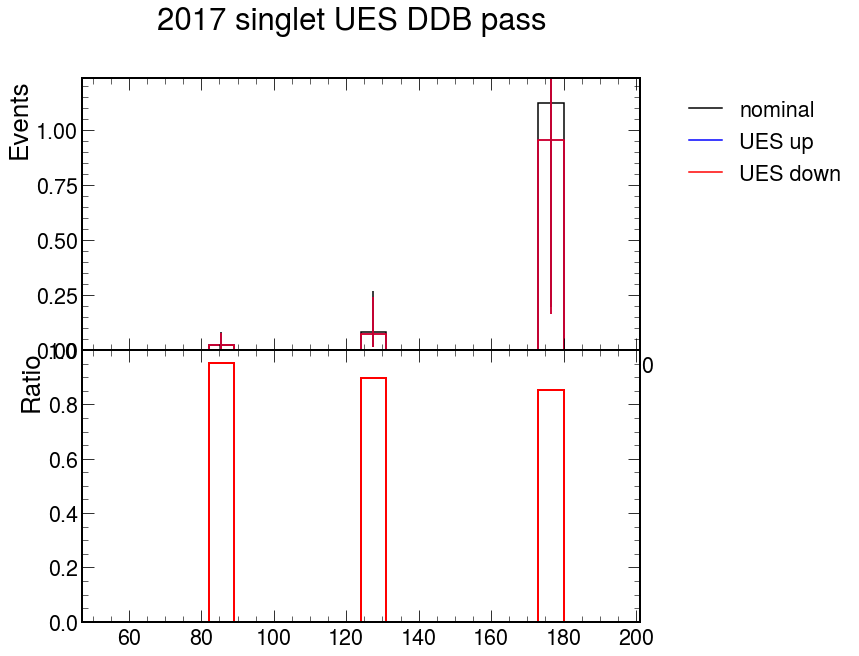

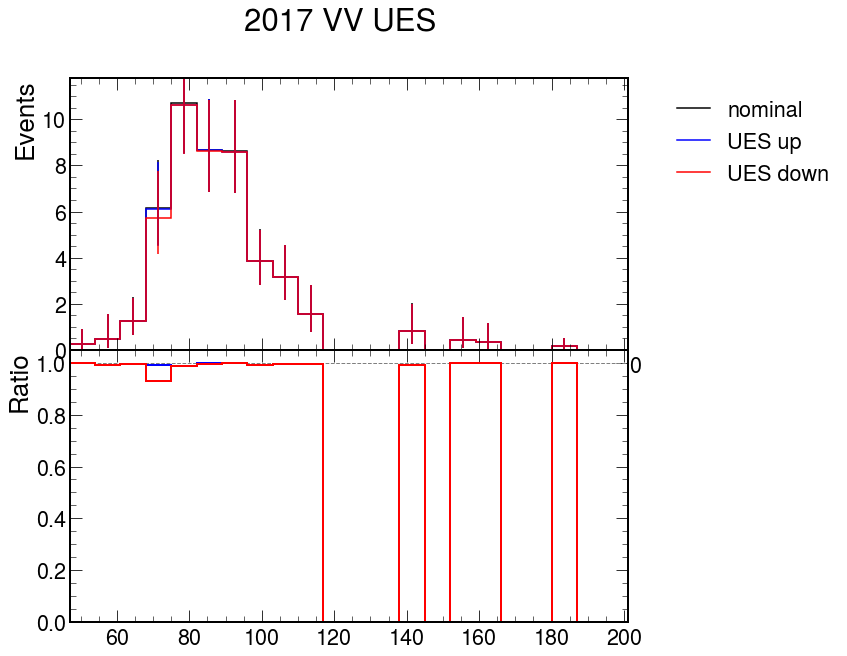

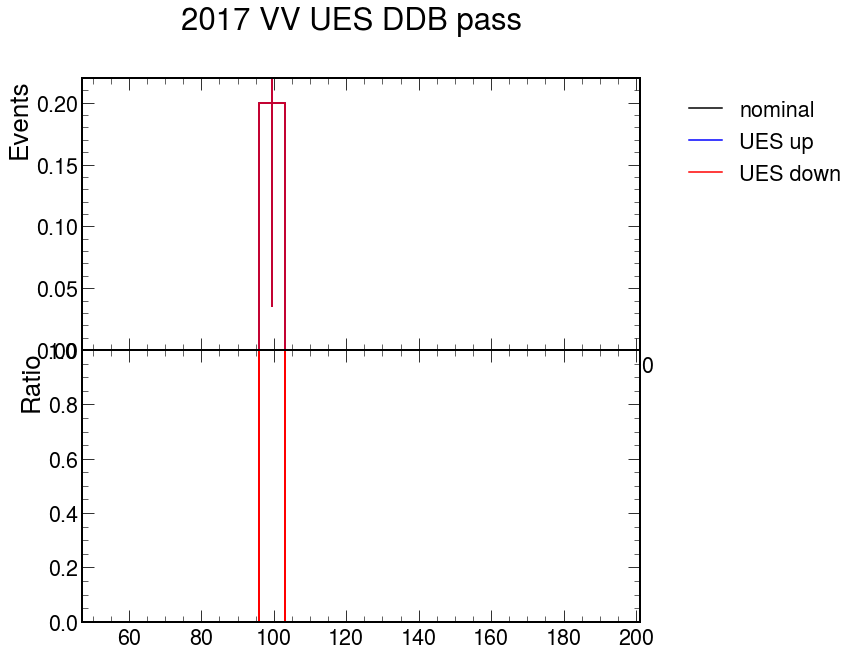

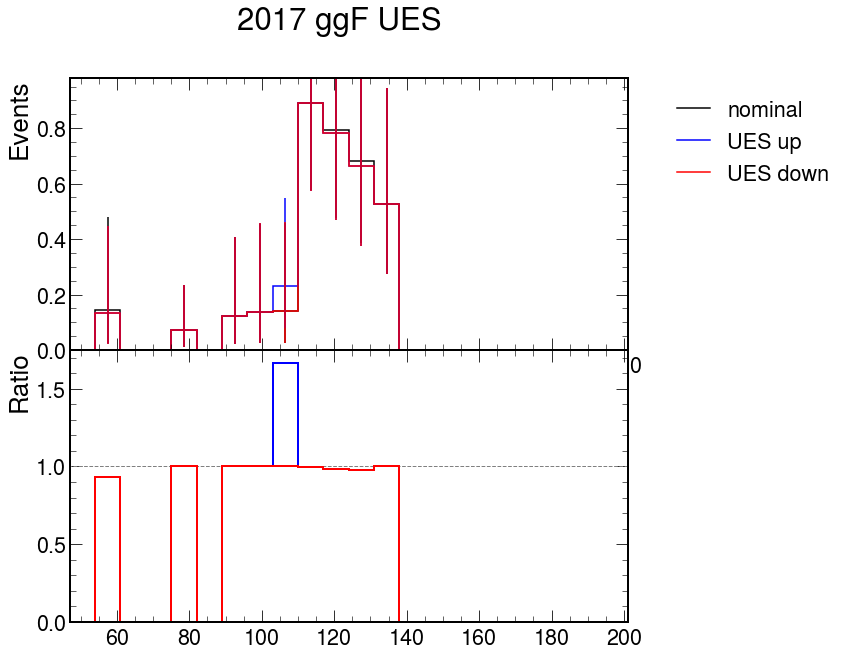

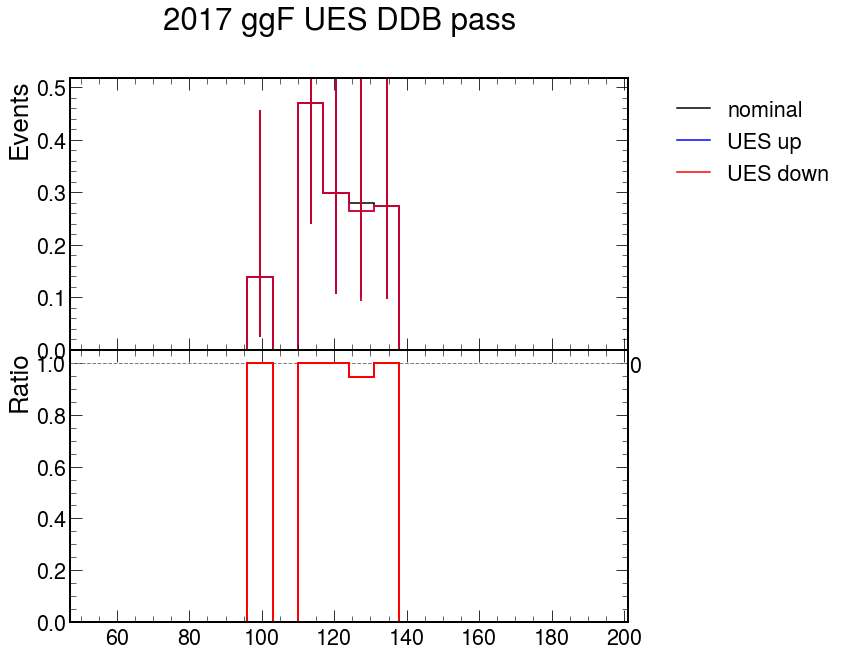

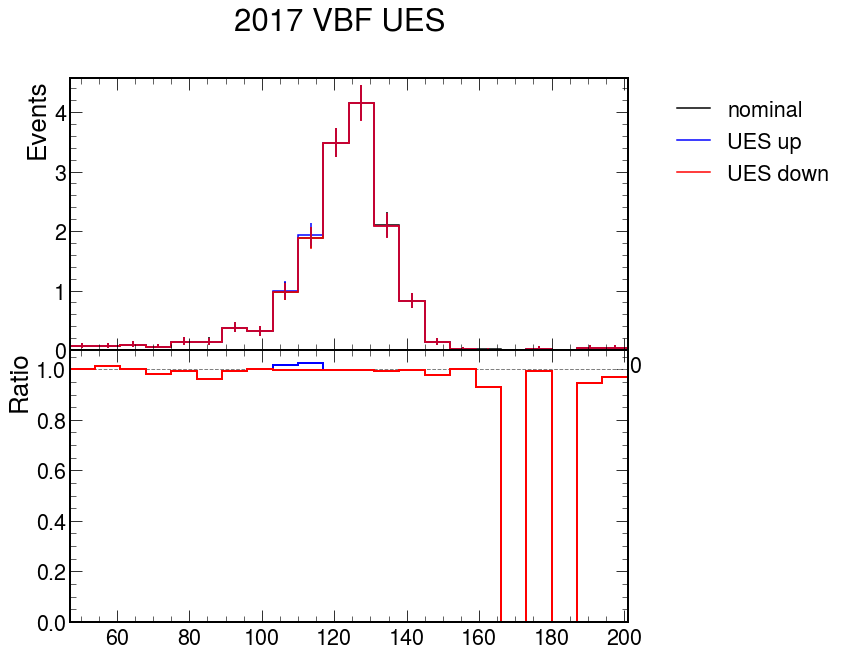

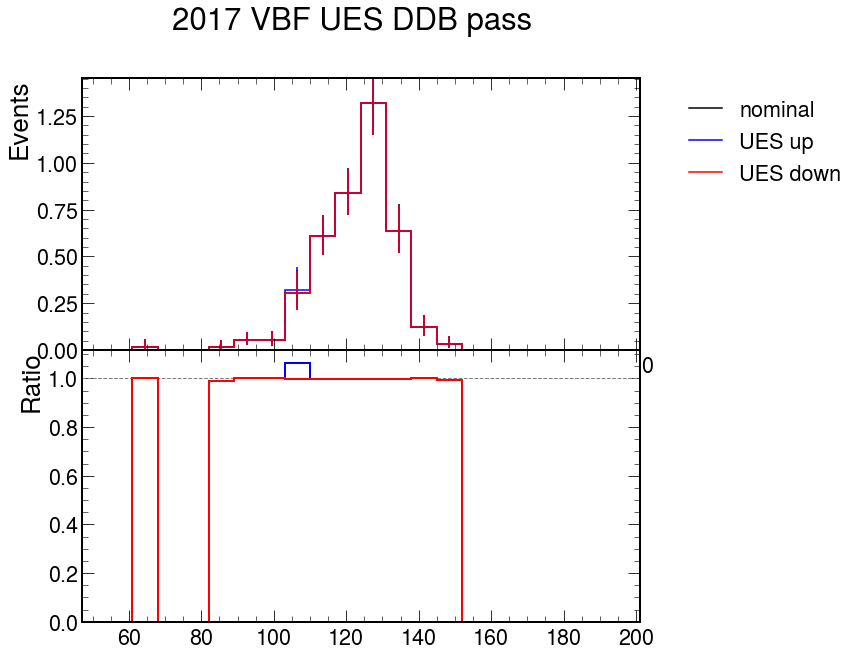

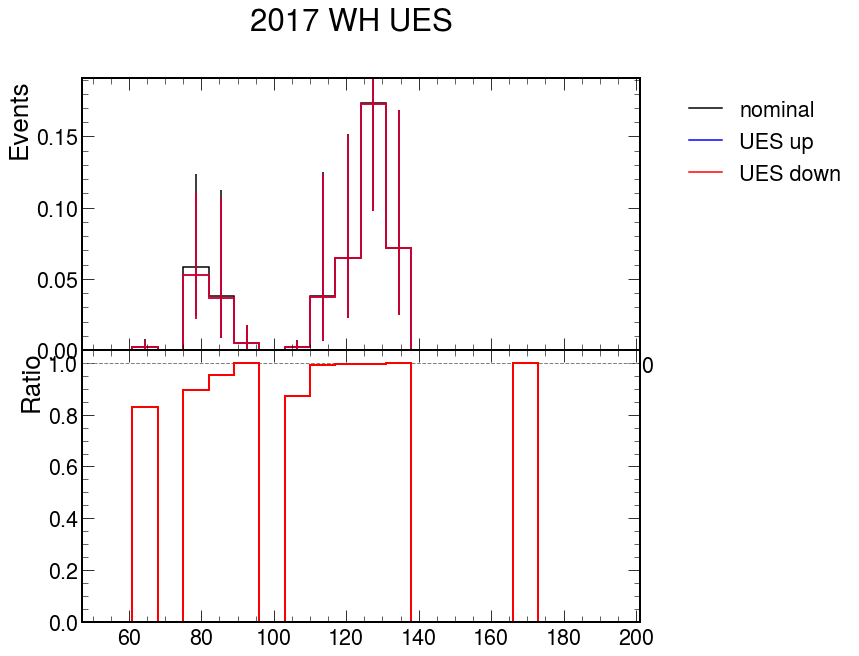

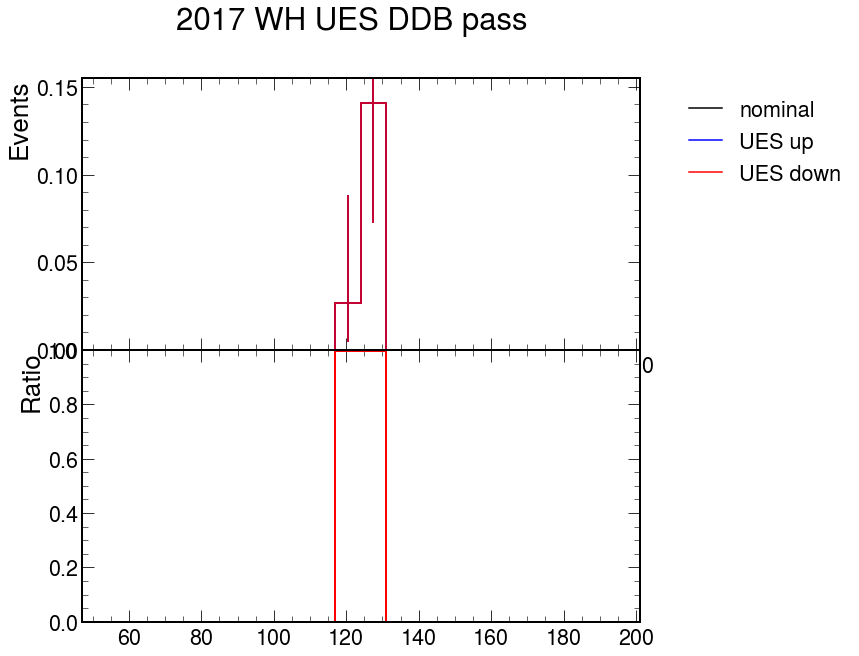

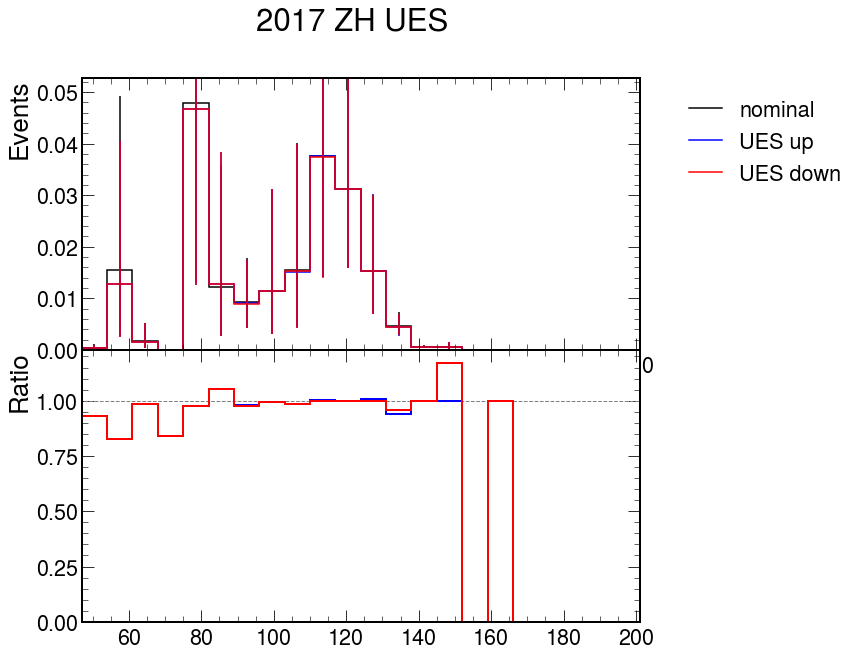

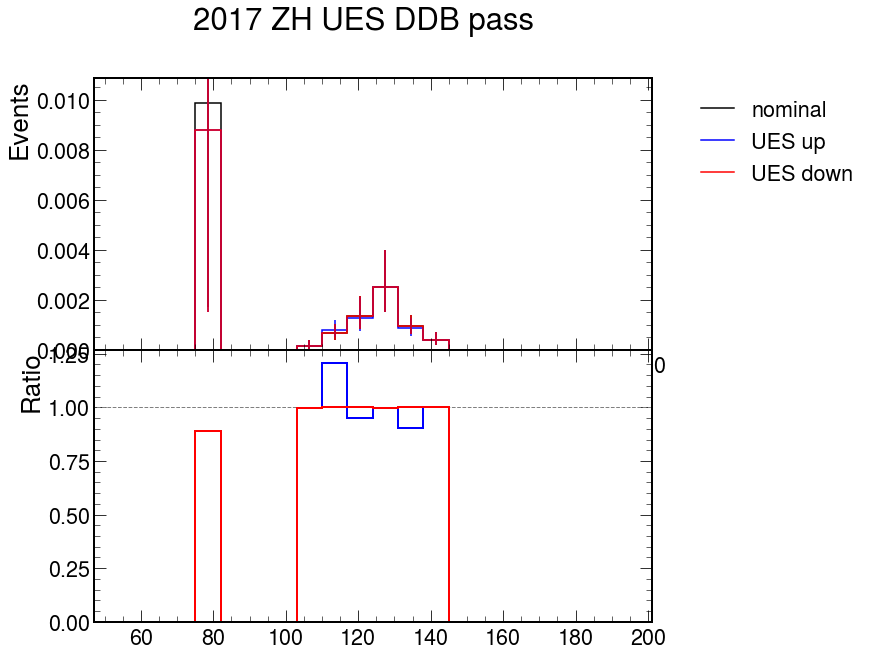

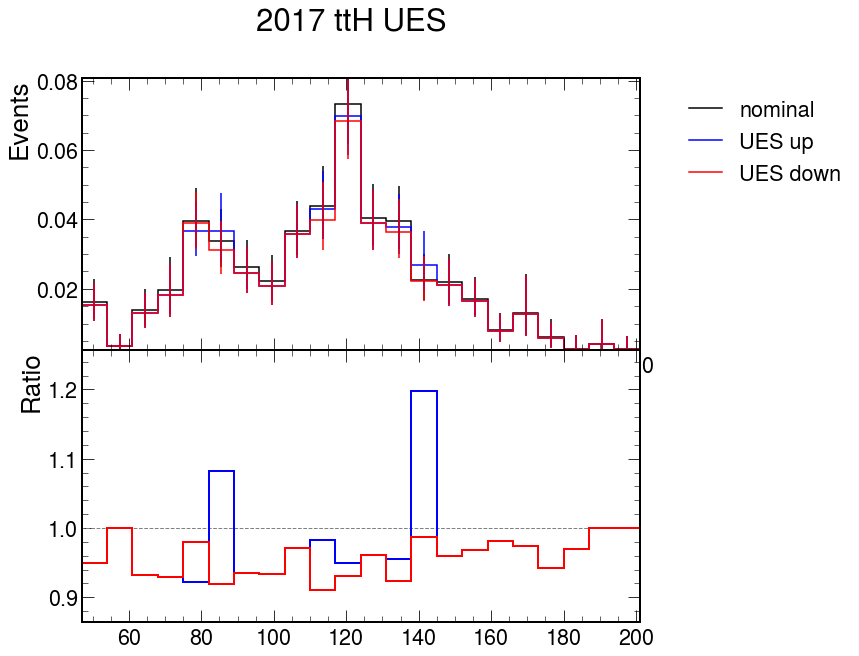

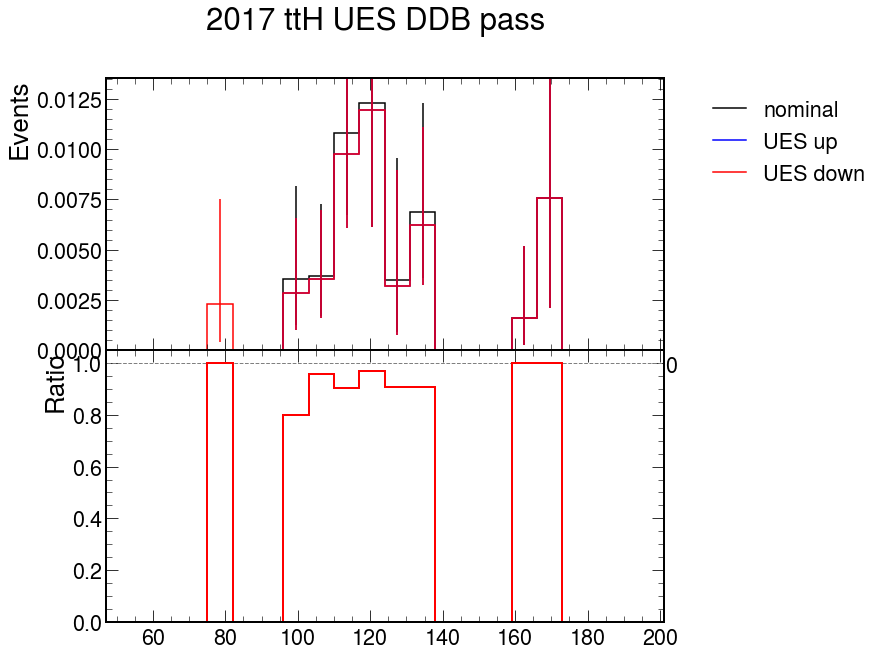

In [20]:
for p in mc:
    plot_syst(h.integrate('process',p),'UES',year+' '+p + ' UES',year+'/syst_UES/'+p)
    plot_syst(g.integrate('process',p),'UES',year + ' ' + p + ' UES DDB pass', year+'/syst_UES/'+p+"_pass")

/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:82: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vbf-category/vbf-ddb2/plotter.py:83: RuntimeWarning: invalid value encountered i

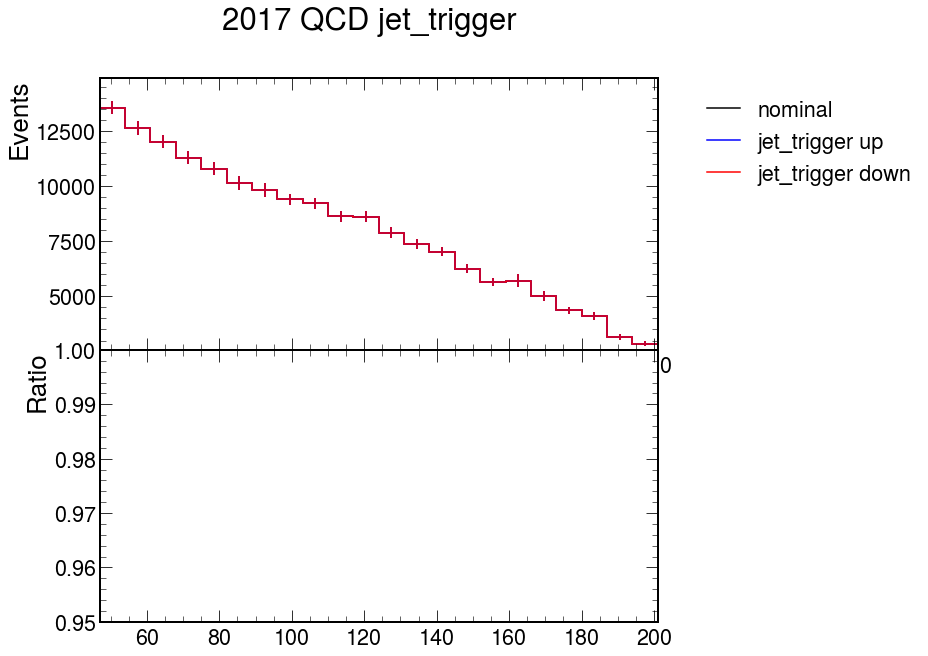

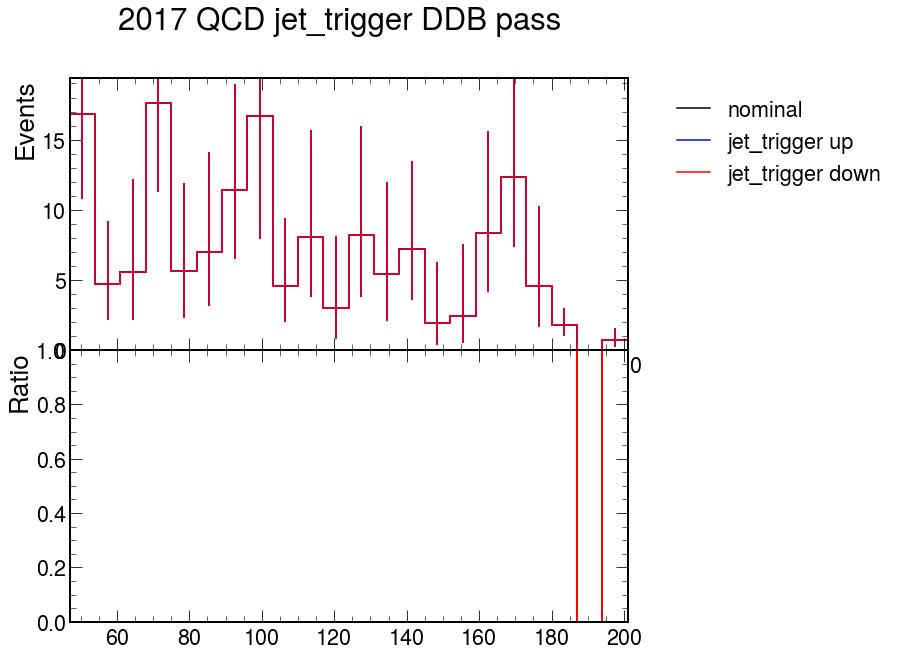

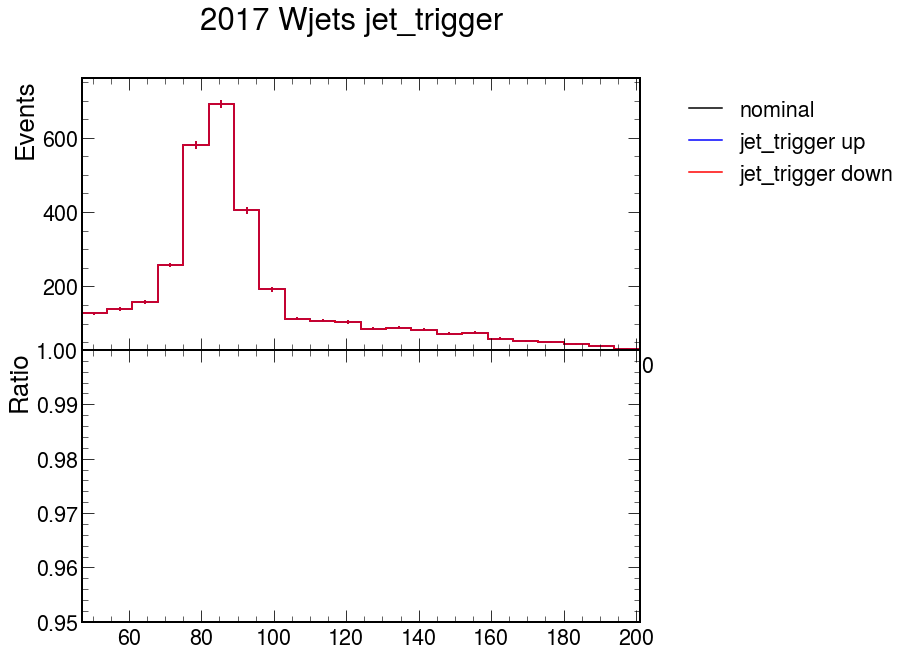

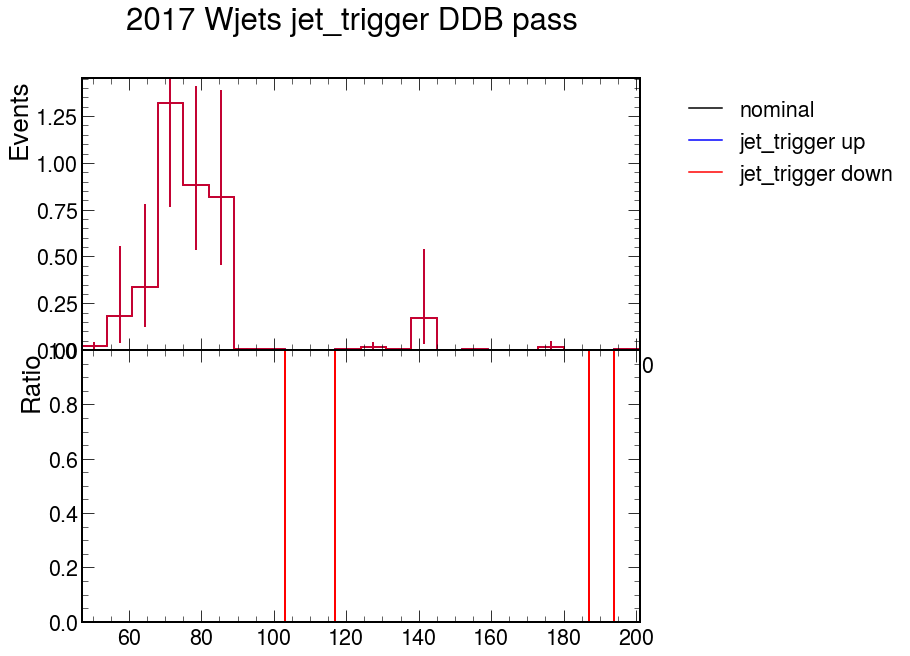

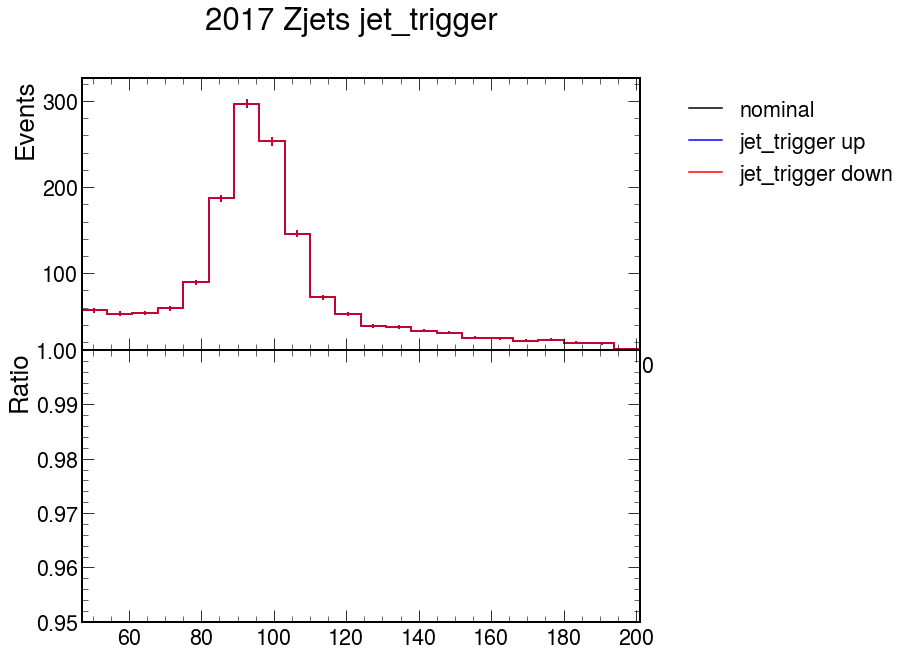

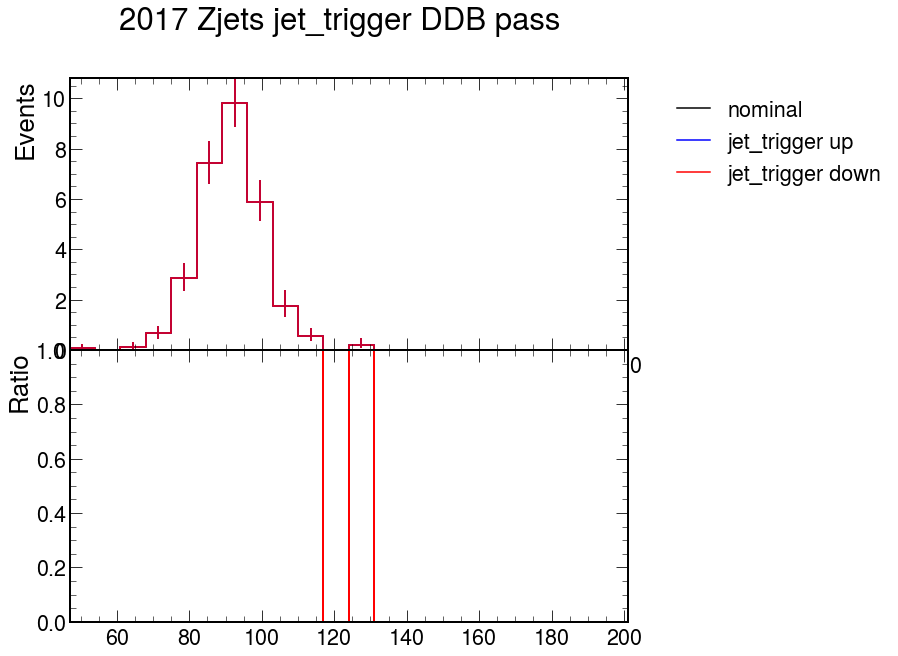

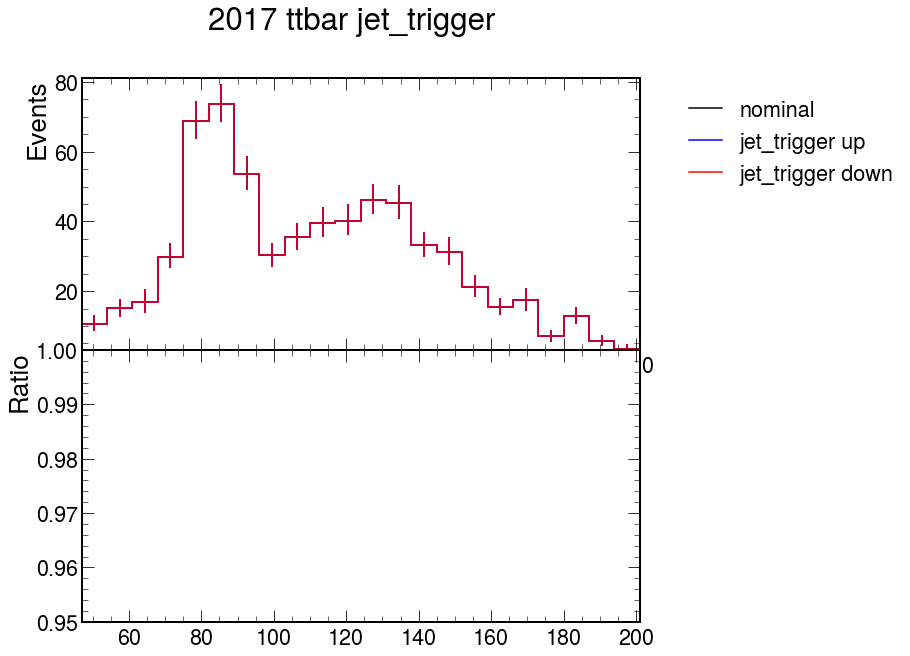

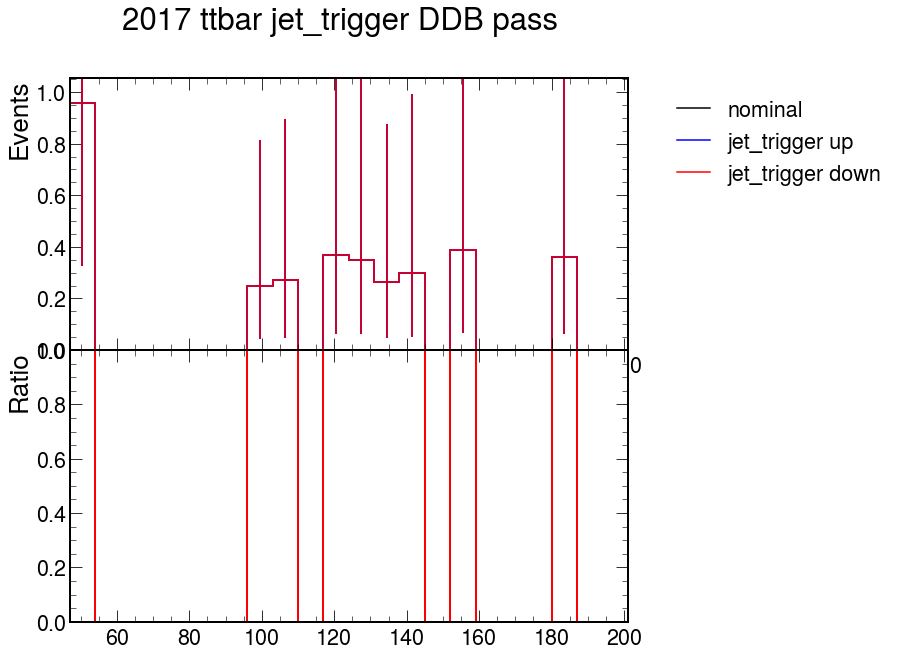

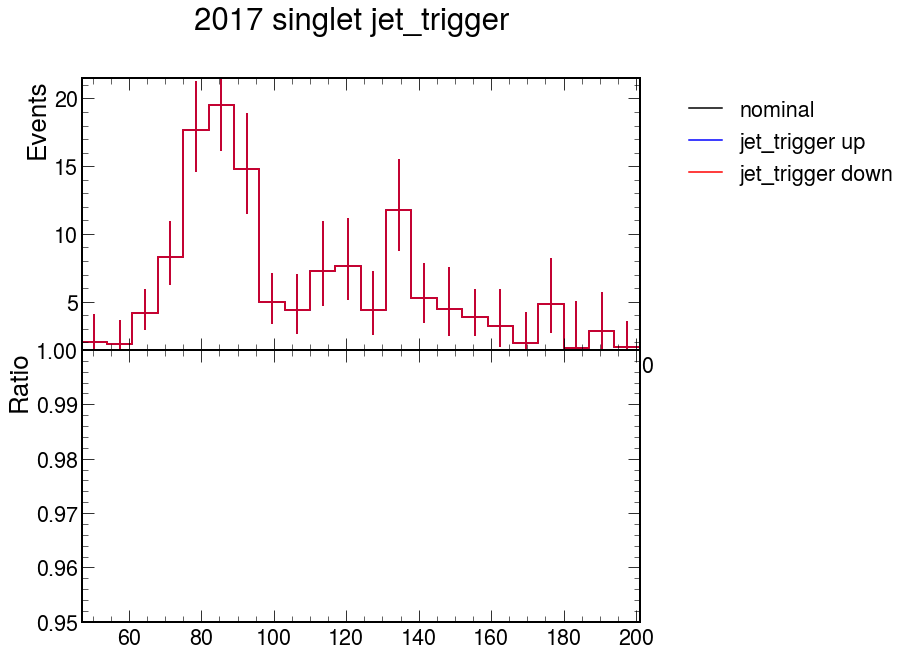

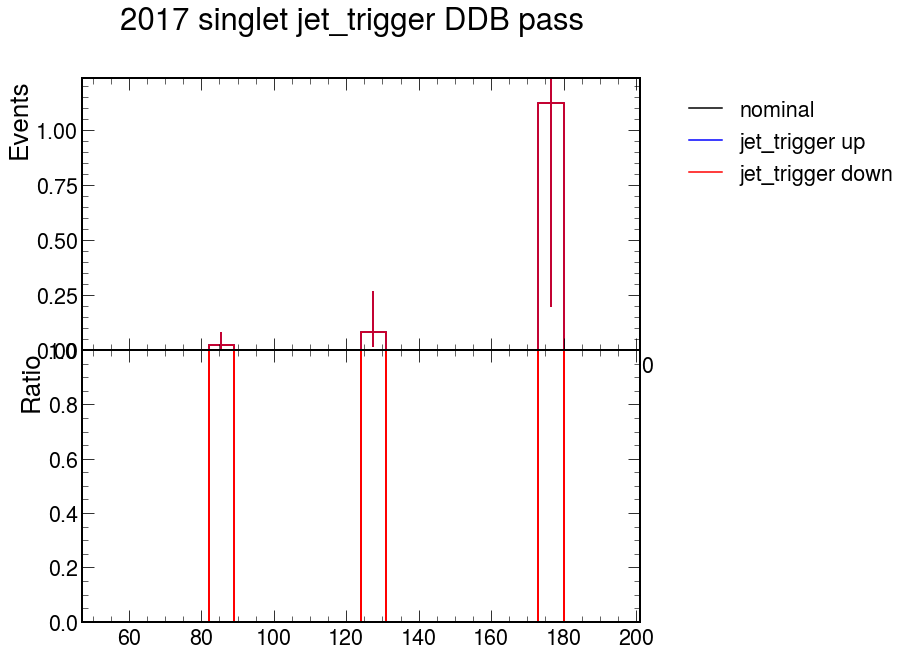

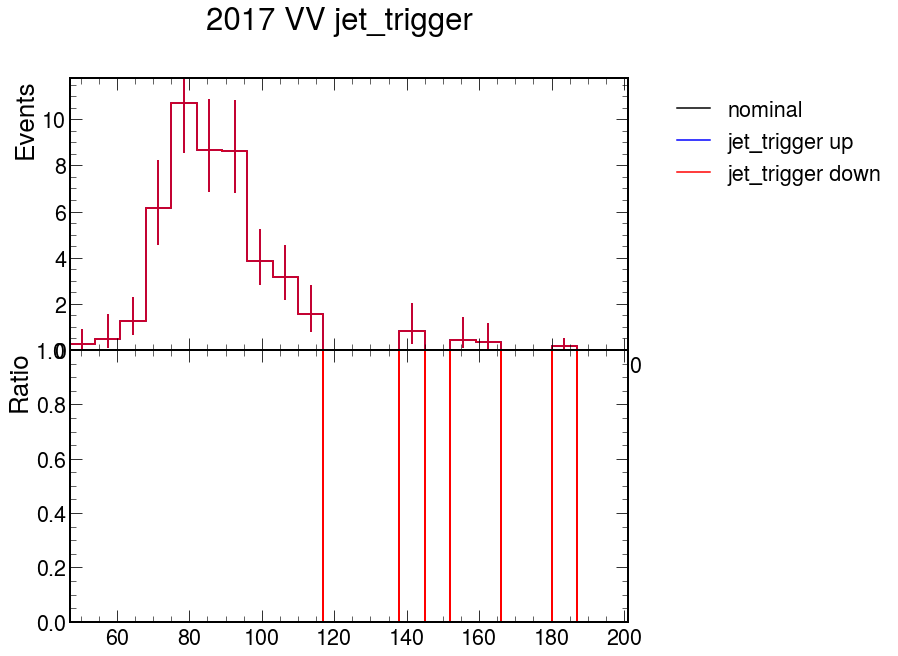

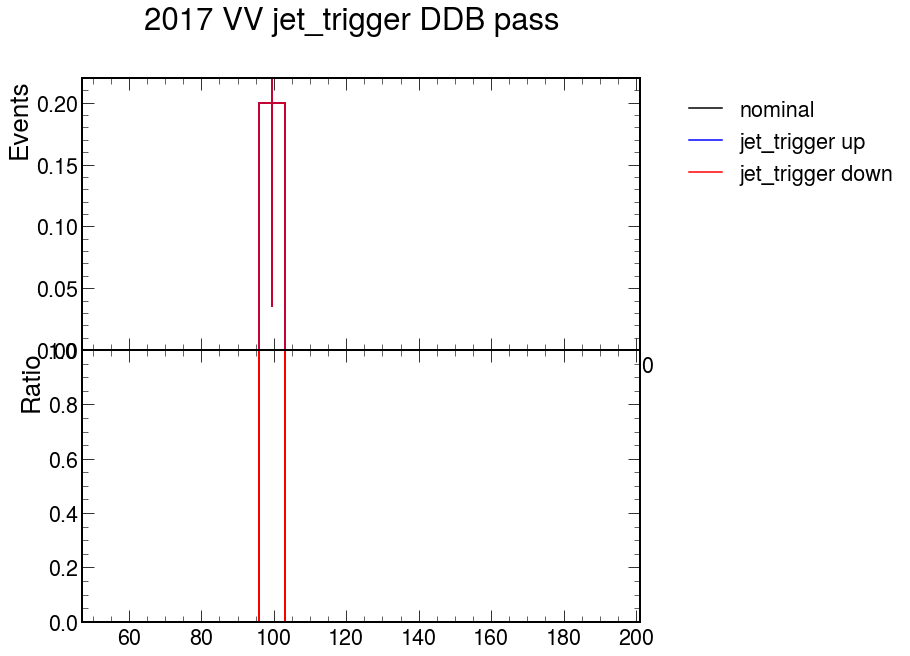

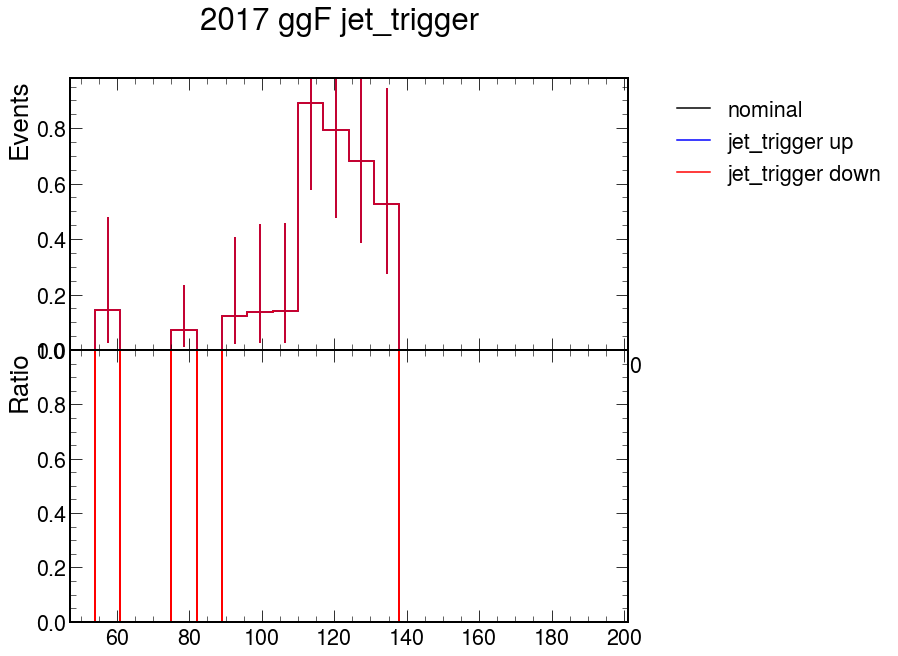

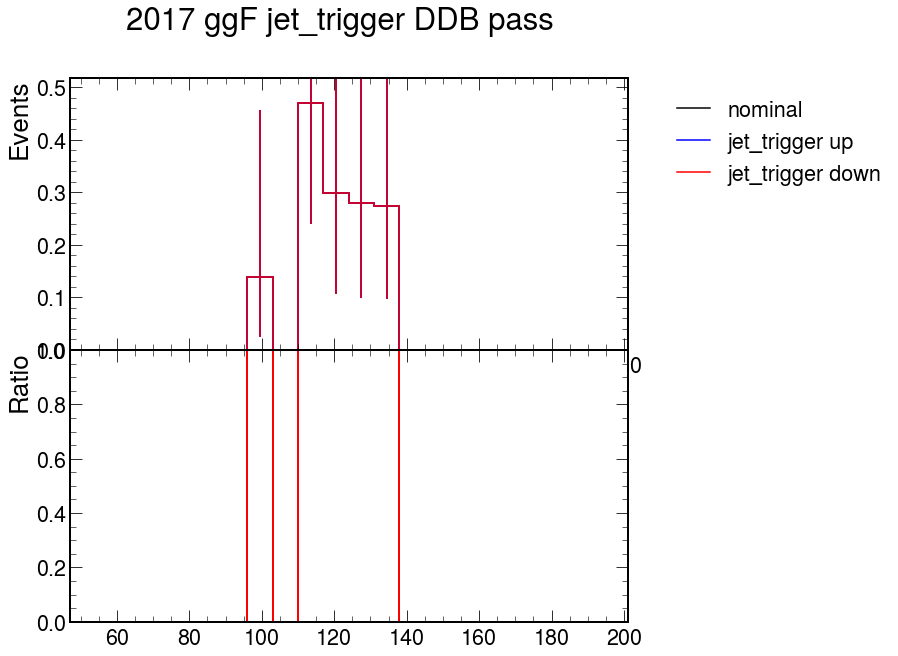

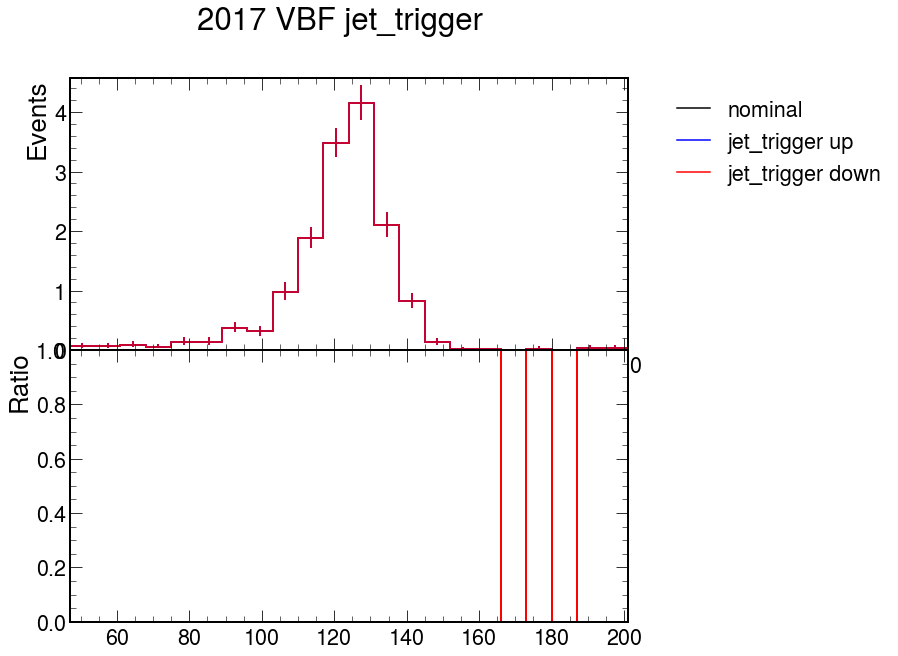

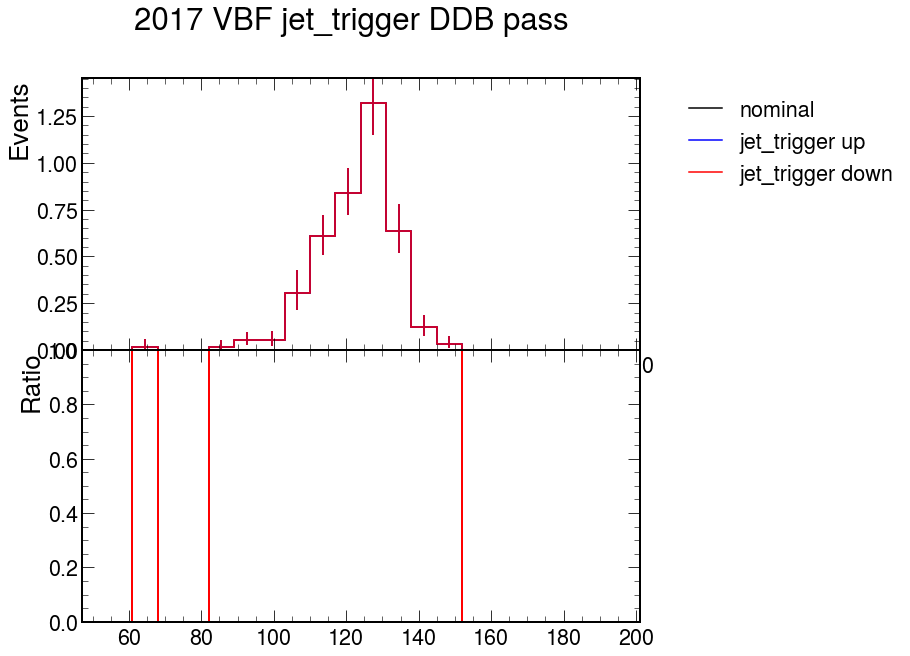

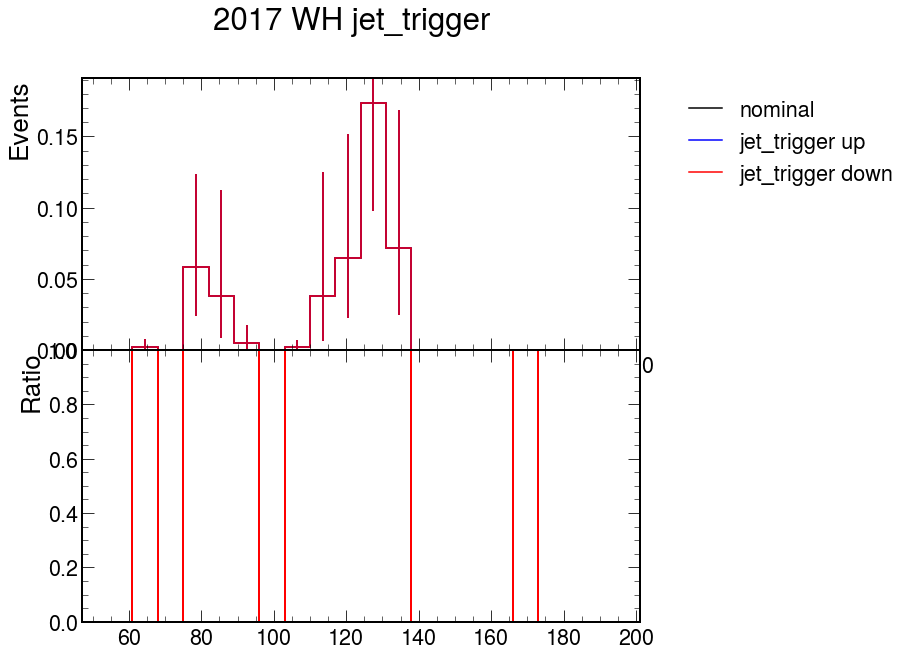

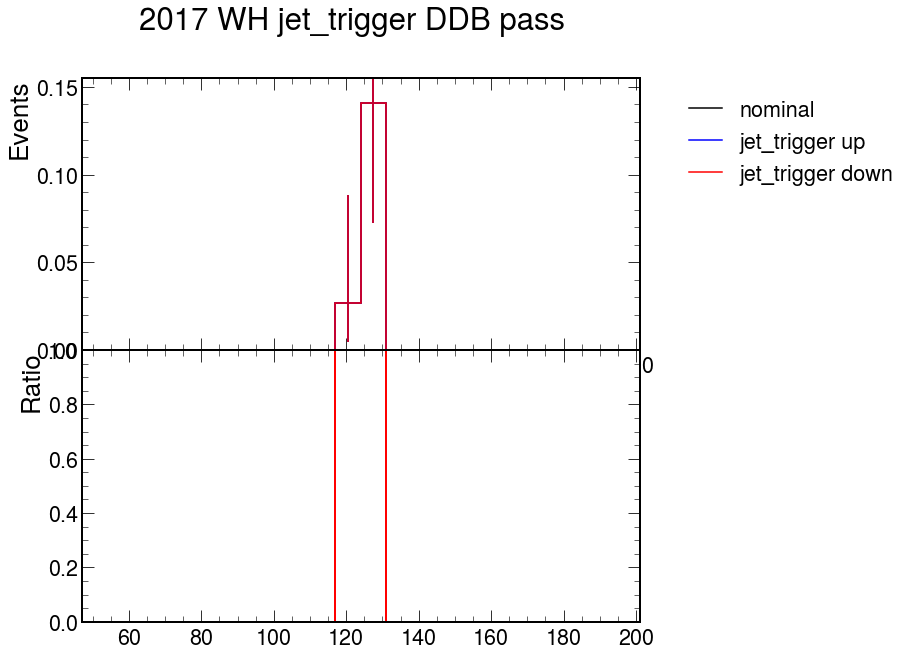

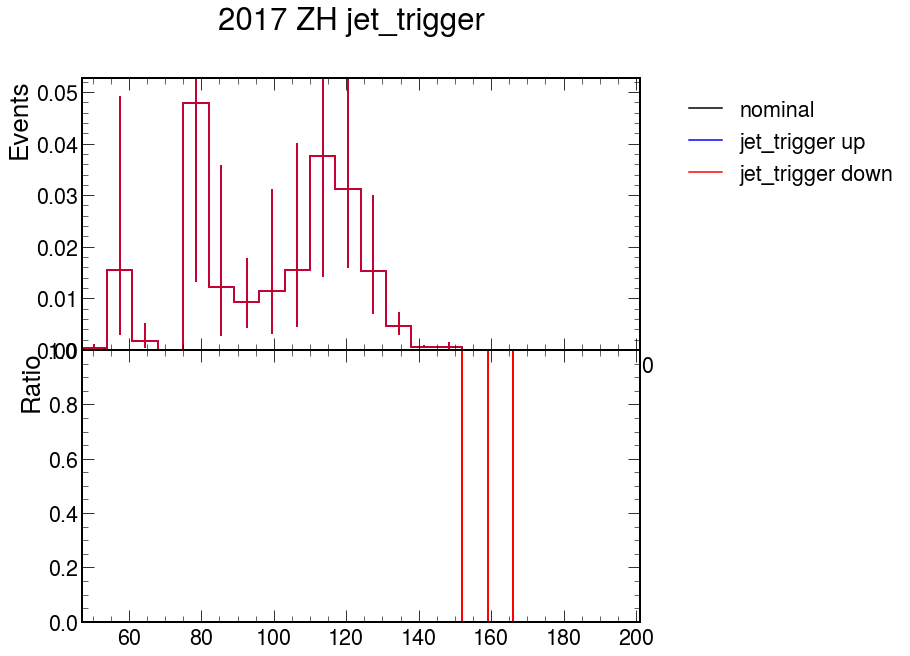

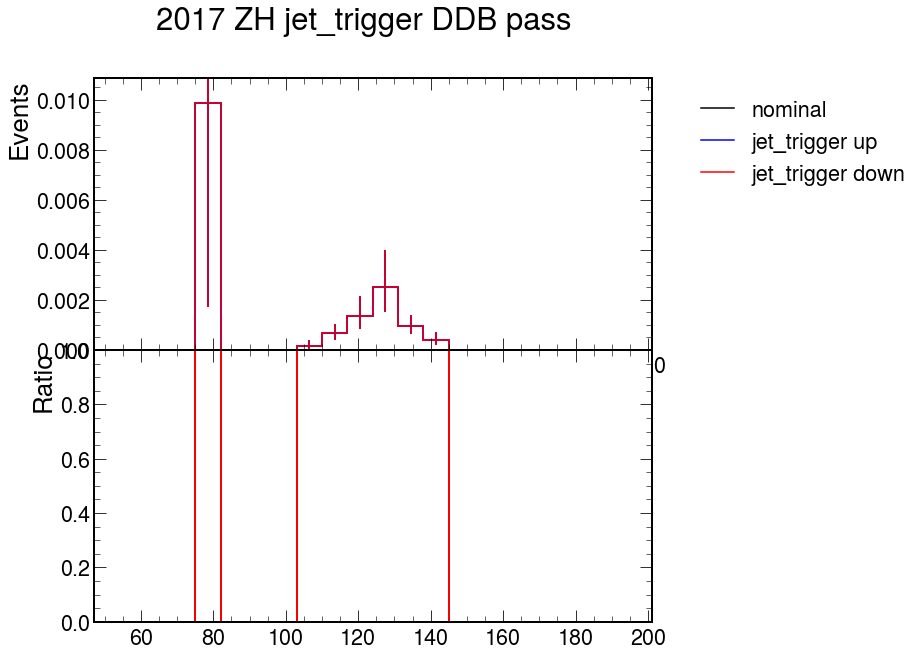

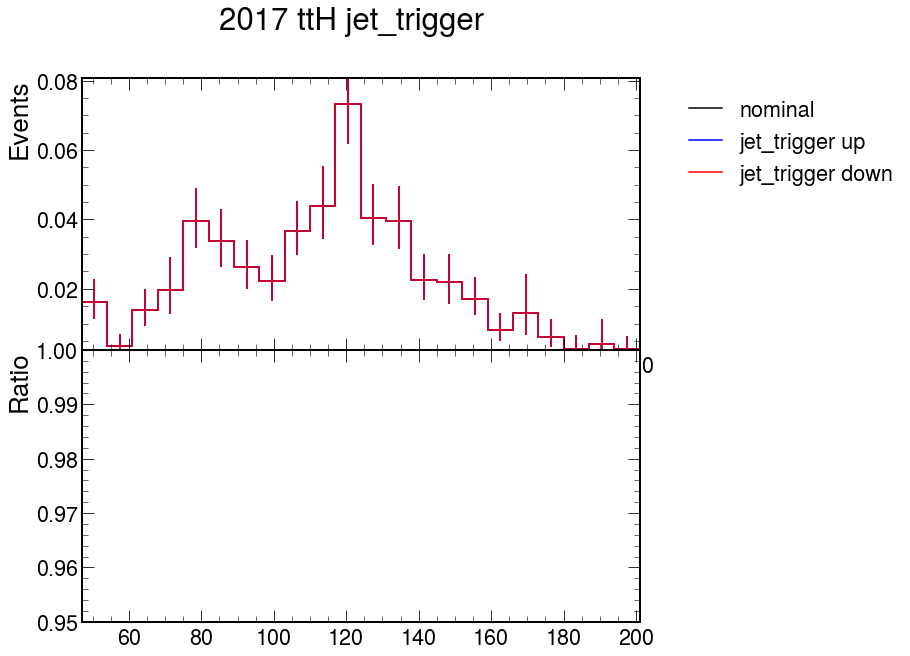

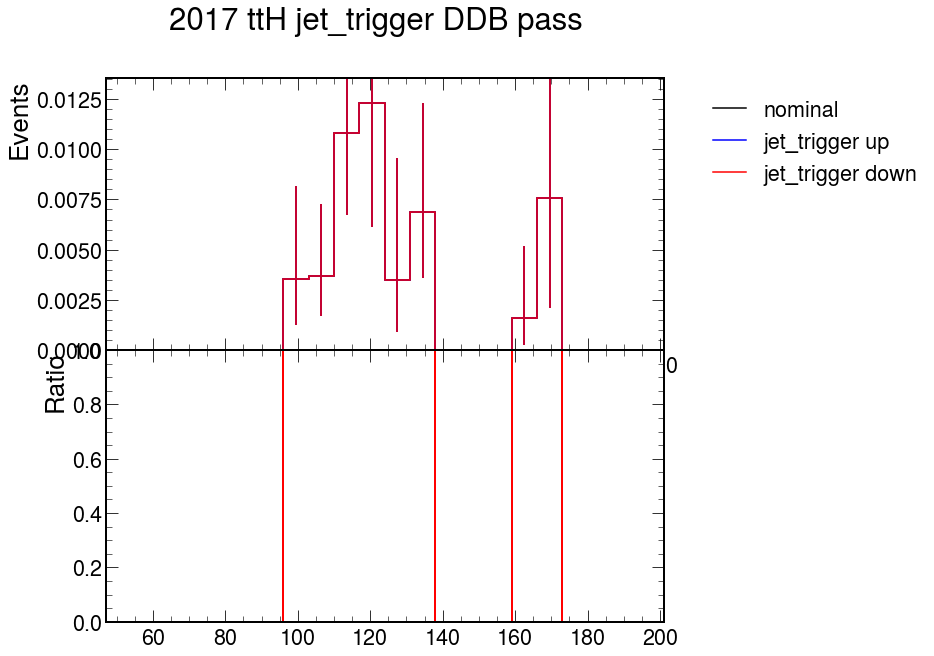

In [21]:
for p in mc:
    plot_syst(h.integrate('process',p),'jet_trigger',year+' '+p +' jet_trigger',year+'/syst_jet_trigger/'+p)
    plot_syst(g.integrate('process',p),'jet_trigger',year + ' ' + p + ' jet_trigger DDB pass', year+'/syst_jet_trigger/'+p+"_pass")